<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
csv_sat_scores = './sat_scores.csv'
data_set = []
with open(csv_sat_scores, 'rb') as csv_handle:
    data_handle = csv.reader(csv_handle, delimiter=',')
    for row in data_handle:
        data_set.append(row)
csv_handle.close()
dict_data = {data_set[0][col]:[data_row[col] for data_row in data_set[1:]] for col in range(len(data_set[0]))}
print(dict_data)

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
df_sat_scores_from_dict = pd.DataFrame(dict_data)
df_sat_scores_from_dict.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [5]:
df_sat_scores = pd.read_csv(csv_sat_scores)
df_sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

---
_In inputting the dictionary, the numbers read from the csv file are in string and have to be converted to either integer or float before inputting the dictionary into the data frame; otherwise it will be represented as an object type._

_In loading from file in pandas, the pandas library will do the conversation from numbers to integer or float._

---

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
# Separate the entry where the state is 'All' from the data_set since they will affect the overall statistics
all_entry = df_sat_scores[df_sat_scores['State'] == 'All']
df_sat_scores = df_sat_scores[df_sat_scores['State'] != 'All']
df_sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
all_entry.head()

,State,Rate,Verbal,Math
51,All,45,506,514


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
dict_metadata = {
    'Types': df_sat_scores.dtypes.to_dict(),
    'Description':{
        'Rate':'Rate',
        'State': 'State',
        'Verbal': 'Average score of the Verbal section for the state',
        'Math': 'Average score of the Math section for the state'
    },
    'Shape': df_sat_scores.shape
}
dict_metadata

{'Description': {'Math': 'Average score of the Math section for the state',
  'Rate': 'Rate',
  'State': 'State',
  'Verbal': 'Average score of the Verbal section for the state'},
 'Shape': (51, 4),
 'Types': {'Math': dtype('int64'),
  'Rate': dtype('int64'),
  'State': dtype('O'),
  'Verbal': dtype('int64')}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

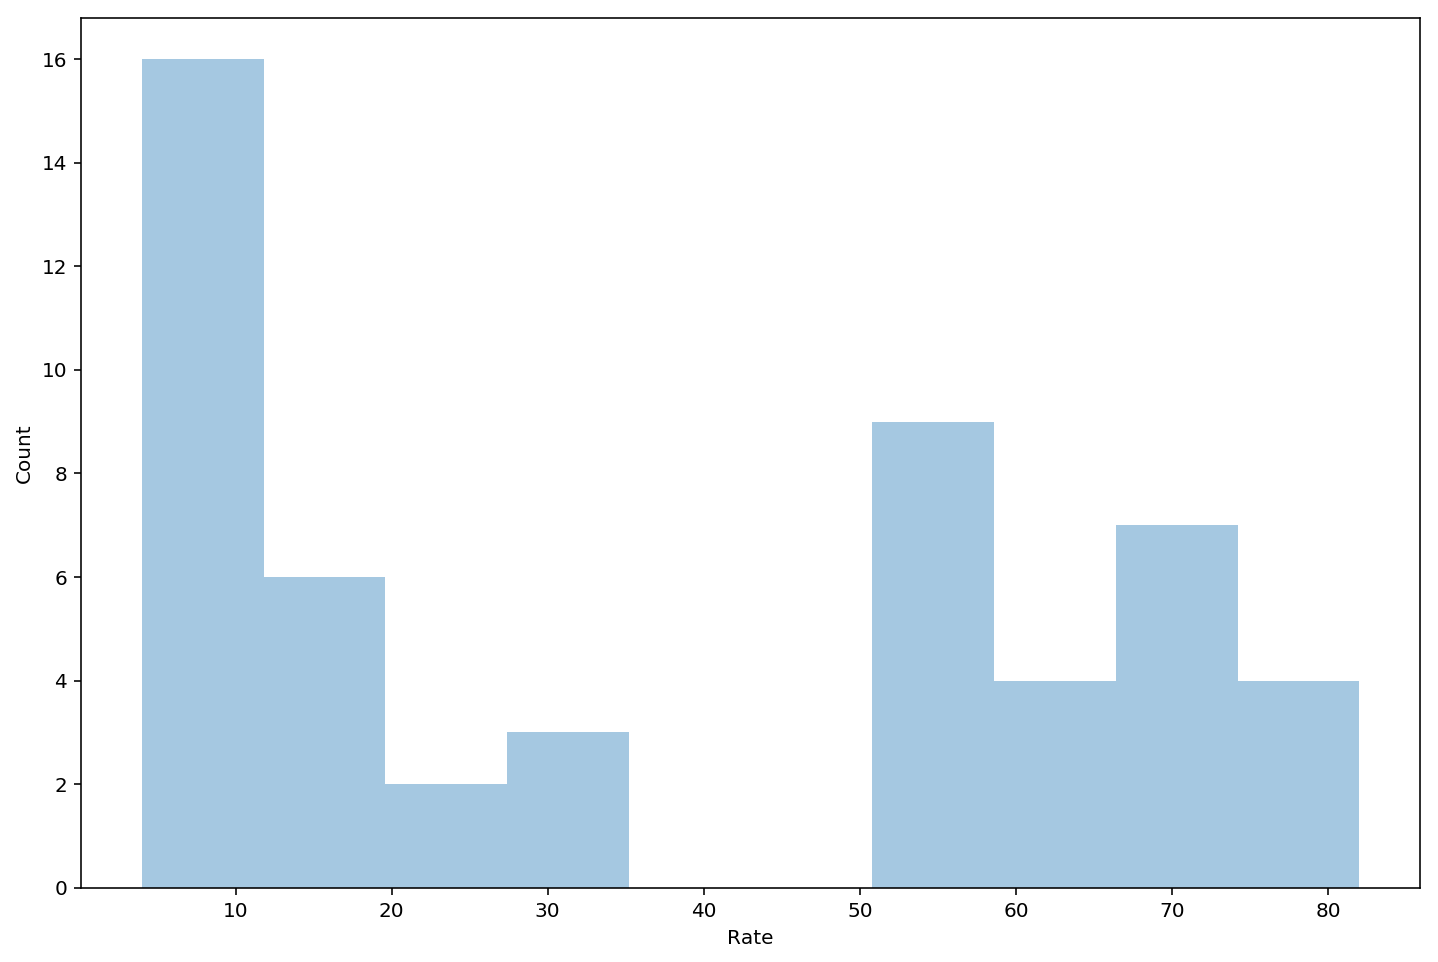

In [9]:
plt.figure(figsize=(12, 8))
ax_rate = sns.distplot(df_sat_scores[['Rate']], kde=False, bins=10)
ax_rate.set_xlabel('Rate')
ax_rate.set_ylabel('Count')
plt.show()

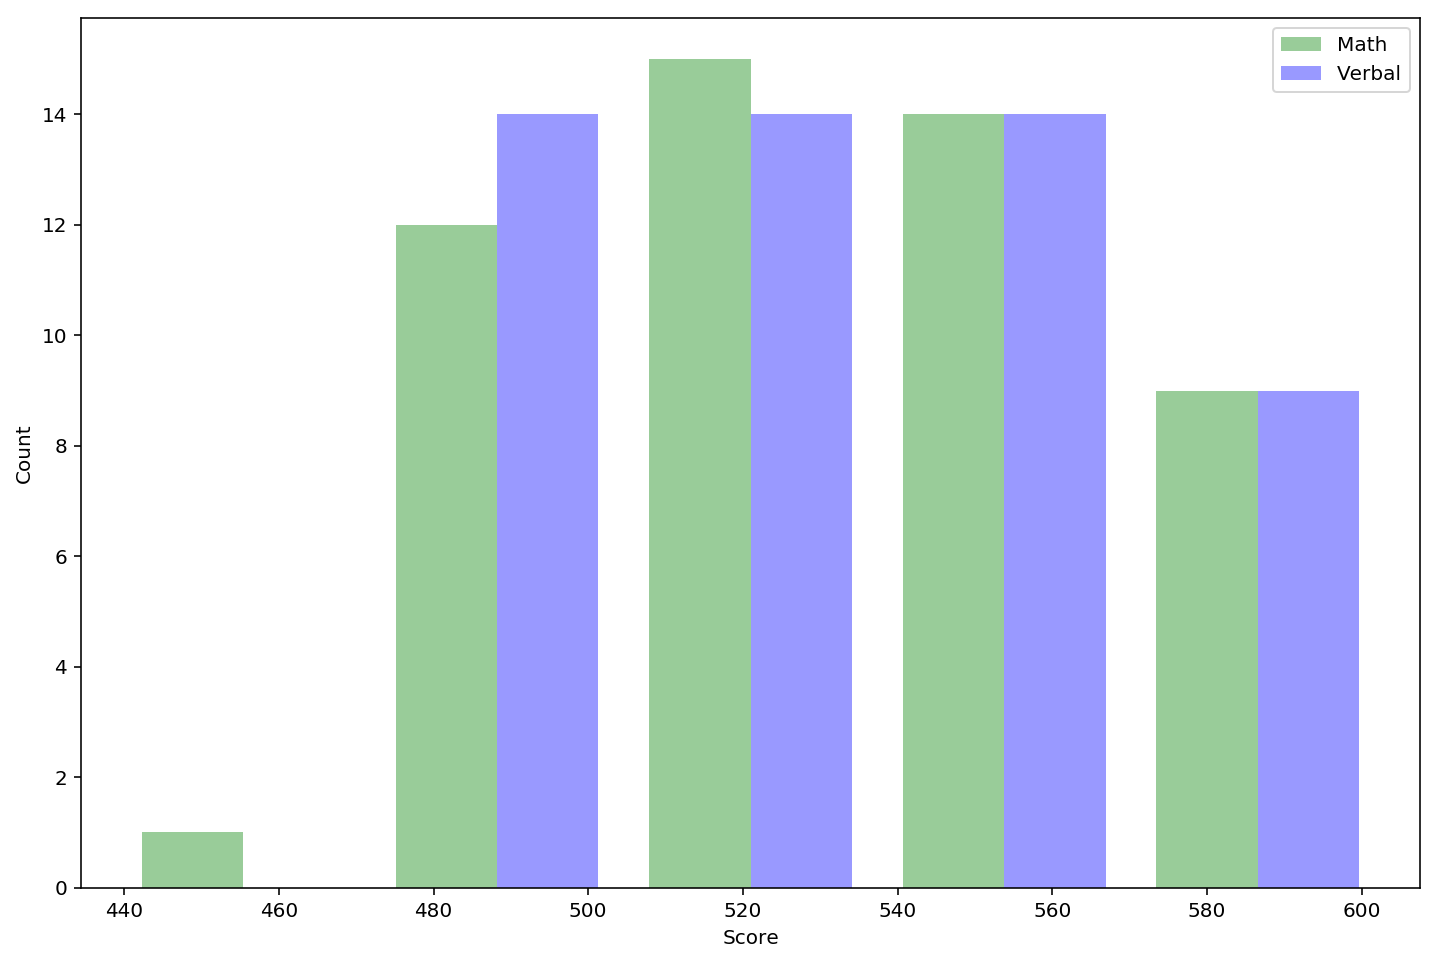

In [10]:
df_plot_data_set = df_sat_scores[['Math', 'Verbal']]
plt.figure(figsize=(12, 8))
ax_rate = sns.distplot(df_plot_data_set, color=['green', 'blue'], kde=False)
ax_rate.set_xlabel('Score')
ax_rate.set_ylabel('Count')
ax_rate.legend(df_plot_data_set.columns)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

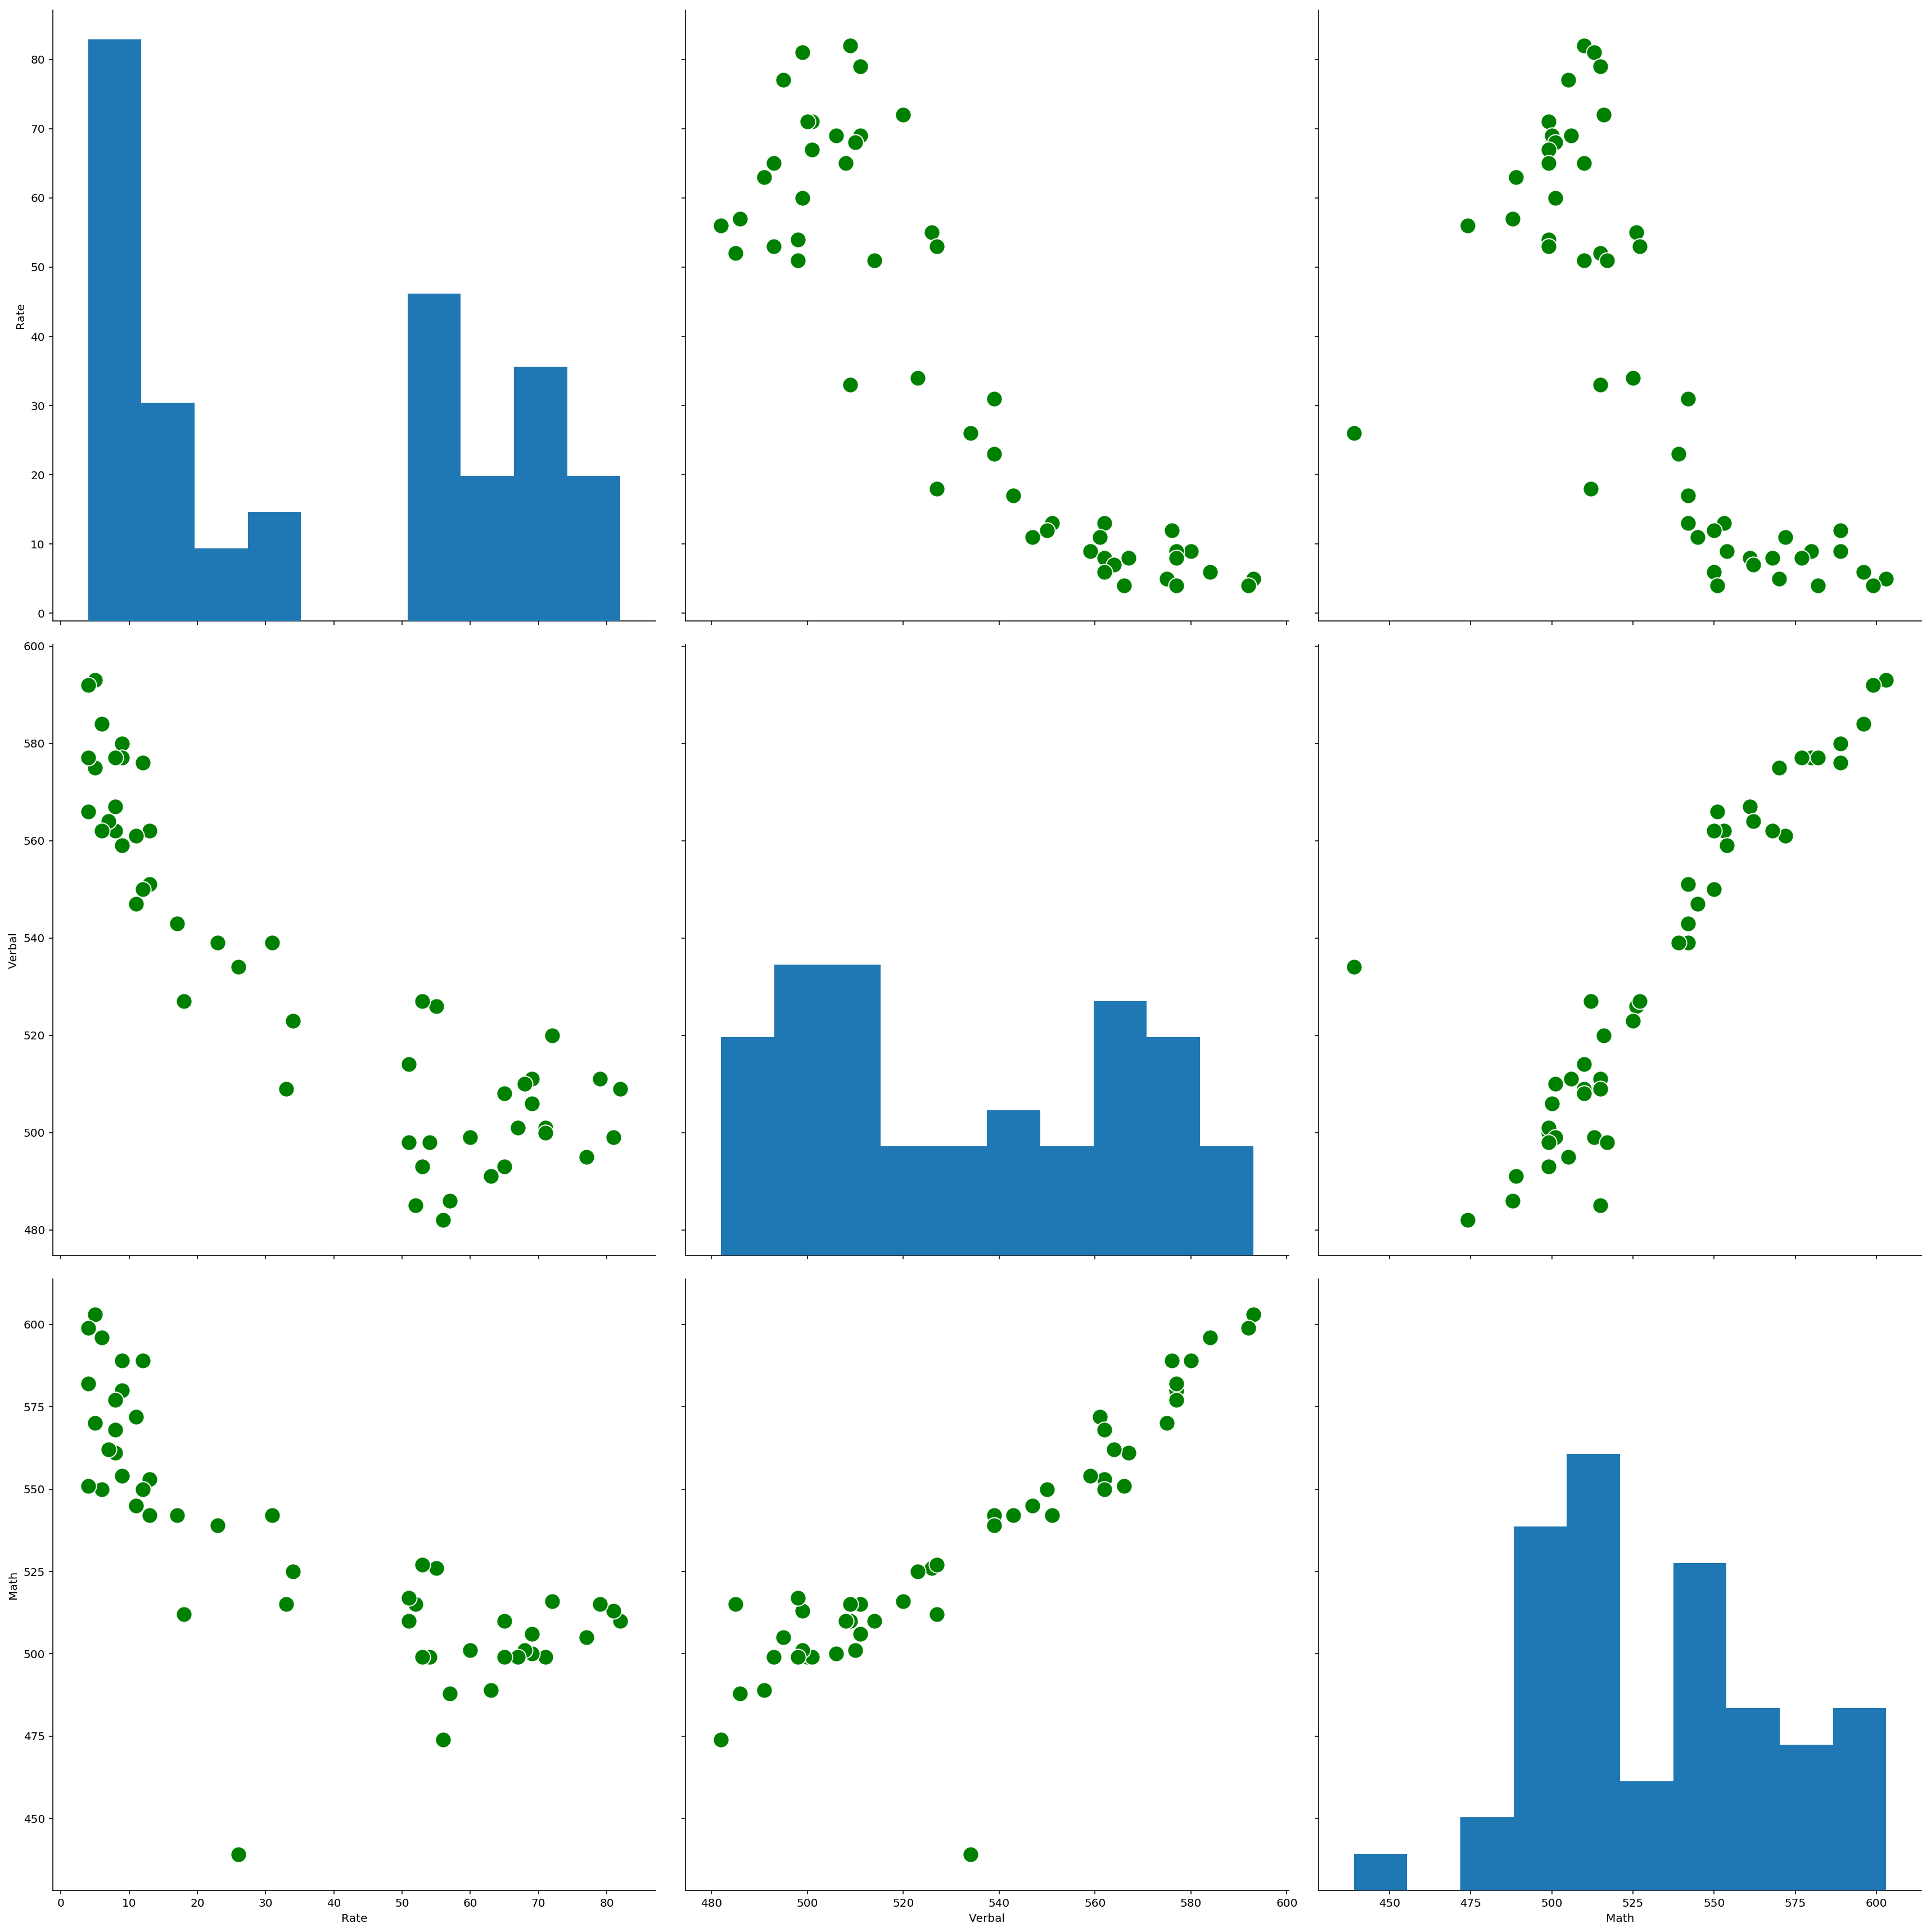

In [11]:
sns.pairplot(df_sat_scores, size=8, diag_kind="hist", plot_kws={'s':200, 'color':'green'}, diag_kws={'linewidth':5})
plt.show()

---
_The distribution shows a high relationship between `Verbal`, `Math` and `Rate` values and that the distribution of `Rate`, `Math` and `Verbal` are similar to each other._

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

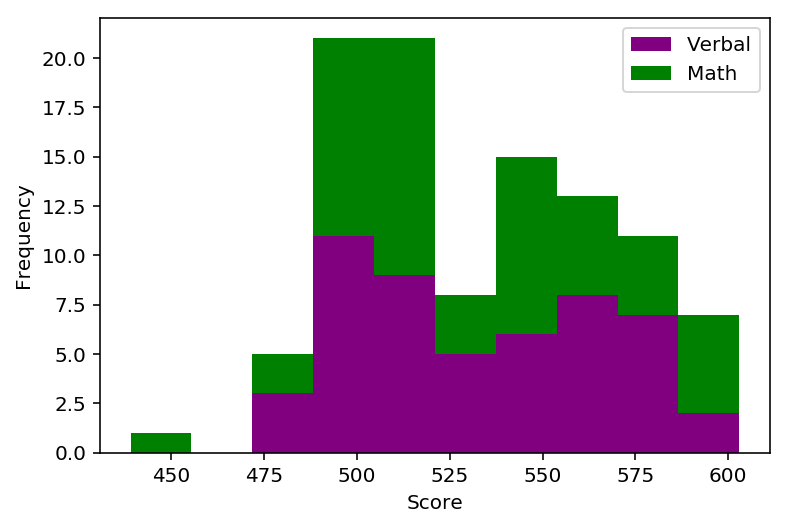

In [12]:
ax_stacked_score = df_sat_scores[['Verbal', 'Math']].plot.hist(stacked=True, color=['purple', 'green'])
ax_stacked_score.set_xlabel('Score')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

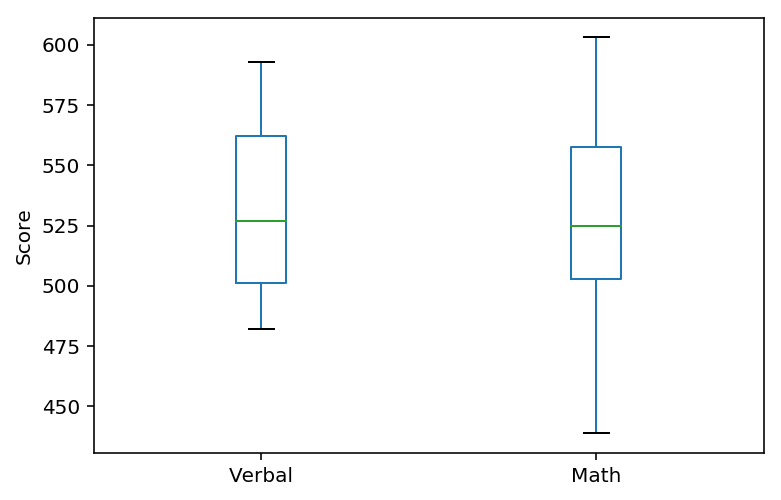

In [13]:
ax_score_boxplot = df_sat_scores[['Verbal', 'Math']].plot.box()
ax_score_boxplot.set_ylabel('Score')
plt.show()

***
_A box plot can be used to compare the distribution of `Verbal` and `Math` more quickly than using a scatterplot or a histogram. Box ploe take up less space than a histogram when comparing distributions and scatterplot are used for determining the relationship between two variables instead of comparing distributions._

_The range of `Rate` is relatively lower as compared to the range in `Verbal` and `Math`. Hence distribution of `Rate` cannot be compared to that of `Verbal` and `Math`.
***

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


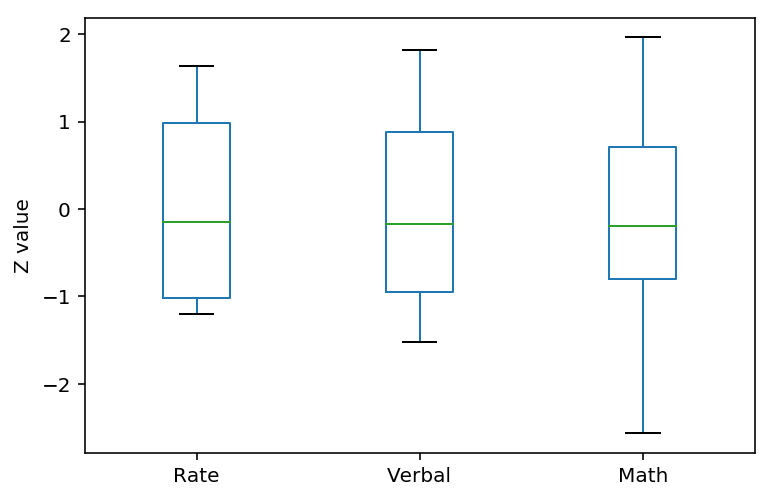

In [14]:
# To enable plotting of "Verbal", "Math" and "Rate" appropriately on the same boxplot chart, we need the standard values
# of "Verbal", "Math" and "Rate"

df_sat_score_values = df_sat_scores[['Rate','Verbal','Math']]

# Formula for calculating the standard values.
df_z_sat_score_values = (df_sat_score_values - df_sat_score_values.mean())/(df_sat_score_values.std())

# Do a box plot
ax_normalized_box_plot = df_z_sat_score_values.plot.box()
ax_normalized_box_plot.set_ylabel("Z value")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
list_states_above_mean = df_sat_scores.loc[df_sat_scores['Verbal'] > df_sat_scores['Verbal'].mean(), 'State'].tolist()
print(list_states_above_mean)
print('{} states are above the average score across states.'.format(len(list_states_above_mean)))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24 states are above the average score across states.


In [16]:
# Determine the total number of states.
df_sat_scores['State'].count()

51

***
_As there are less than half of all the states that have `Verbal` scores greater than the average `Verbal` scores across states, the distribution is likely to be positively skewed._
***

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
list_states_above_mean = df_sat_scores.loc[df_sat_scores['Verbal'] > df_sat_scores['Verbal'].median(), 'State'].tolist()
print(list_states_above_mean)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [18]:
df_sat_scores[['Verbal']].describe()

,Verbal
count,51.000000
mean,532.529412
std,33.360667
min,482.000000
25%,501.000000
50%,527.000000
75%,562.000000
max,593.000000


***
_There are more states that are greater than the median than that that are greater than the mean. This is because the median is lower than the mean._
***

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
df_sat_scores['Verbal - Math'] = (df_sat_scores['Verbal'] - df_sat_scores['Math'])
df_sat_scores.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
df_sat_scores_with_greatest_verbal_difference = df_sat_scores.sort_values(by='Verbal - Math', ascending=False).head(10)
df_sat_scores_with_greatest_verbal_difference = df_sat_scores_with_greatest_verbal_difference.reset_index(drop=True)

In [21]:
df_sat_scores_with_greatest_math_difference = df_sat_scores.sort_values(by='Verbal - Math').head(10)
df_sat_scores_with_greatest_math_difference = df_sat_scores_with_greatest_math_difference.reset_index(drop=True)

In [22]:
df_sat_scores_with_greatest_verbal_difference.head(3)

,State,Rate,Verbal,Math,Verbal - Math
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15


In [23]:
df_sat_scores_with_greatest_math_difference.head(3)

,State,Rate,Verbal,Math,Verbal - Math
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
df_sat_scores[['Rate', 'Math', 'Verbal']].corr()

,Rate,Math,Verbal
Rate,1.000000,-0.773419,-0.888121
Math,-0.773419,1.000000,0.899909
Verbal,-0.888121,0.899909,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
df_sat_scores[['Rate', 'Math', 'Verbal']].describe()

,Rate,Math,Verbal
count,51.000000,51.000000,51.000000
mean,37.000000,531.843137,532.529412
std,27.550681,36.287393,33.360667
min,4.000000,439.000000,482.000000
25%,9.000000,503.000000,501.000000
50%,33.000000,525.000000,527.000000
75%,64.000000,557.500000,562.000000
max,82.000000,603.000000,593.000000


***
_`count`: Number of rows in the dataset._

_`mean`: The average value of the column in the dataset._

_`std`: The standard deviation of the column in the dataset._

_`min`: The minimum value of the column in the dataset._

_`25%`: The value at the 25th-percentile of the column in the dataset._

_`50%`: The median value of the column in the dataset._

_`75%`: The value at the 75th-percentile of the column in the dataset._

_`max`: The maximum value of the column in the dataset._
***

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
df_sat_scores_values = df_sat_scores[['Rate', 'Math', 'Verbal']]
matrix_cov_sat_scores = df_sat_scores_values.cov()
matrix_cov_sat_scores

,Rate,Math,Verbal
Rate,759.04,-773.220000,-816.280000
Math,-773.22,1316.774902,1089.404706
Verbal,-816.28,1089.404706,1112.934118


***
_The range of the covariance matrix is not between -1 and 1 whereas the range of the correlation matrix is between -1 and 1._

_The correlation matrix is the normalized version of the covariance._

_Between two variables, $X_1$ and $X_2$, the correlation can be obtained by dividing the covariance between $X_1$ and $X_2$ by the product of standard deviation of the two variables._

_When there are more than two variables in the covariance matrix, the correlation matrix can only be obtained by using matrix multiplication._
***

In [27]:
# To apply the formula, we need to use matrix multiplication between diagonal matrices.
diag_matrix_std = np.diag([1/df_sat_scores['Rate'].std(), 1/df_sat_scores['Math'].std(), 1/df_sat_scores['Verbal'].std()])
df_matrix_std = pd.DataFrame(diag_matrix_std, 
                          index=['Rate', 'Math', 'Verbal'], 
                          columns=['Rate', 'Math', 'Verbal'])
matrix_cal_corr = df_matrix_std.dot(matrix_cov_sat_scores).dot(df_matrix_std)
matrix_expected_corr = df_sat_scores[['Rate', 'Math', 'Verbal']].corr()
assert matrix_cal_corr.round(4).equals(matrix_expected_corr.round(4))

***
_The correlation matrix have been normalized and hence they are independent from from the magnitudes of the variables. As such it is much quicker to understand the relationship between the two variables with correlation matrix than with covariance matrix._
***

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [28]:
csv_drug_use = './drug-use-by-age.csv'

drugs = ['alcohol', 'marijuana', 'cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant', 'pain-releiver',
         'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']

new_names = ['age', 'sample_size']

for drug in drugs:
    new_names += [drug + '_%', 'med_freq_' + drug]

df_drug_use = pd.read_csv(csv_drug_use, names=new_names, skiprows=1)

In [29]:
df_drug_use.dtypes

age                        object
sample_size                 int64
alcohol_%                 float64
med_freq_alcohol          float64
marijuana_%               float64
med_freq_marijuana        float64
cocaine_%                 float64
med_freq_cocaine           object
crack_%                   float64
med_freq_crack             object
heroin_%                  float64
med_freq_heroin            object
hallucinogen_%            float64
med_freq_hallucinogen     float64
inhalant_%                float64
med_freq_inhalant          object
pain-releiver_%           float64
med_freq_pain-releiver    float64
oxycontin_%               float64
med_freq_oxycontin         object
tranquilizer_%            float64
med_freq_tranquilizer     float64
stimulant_%               float64
med_freq_stimulant        float64
meth_%                    float64
med_freq_meth              object
sedative_%                float64
med_freq_sedative         float64
dtype: object

In [30]:
df_drug_use[['cocaine_%', 'med_freq_cocaine',
             'crack_%', 'med_freq_crack',
             'heroin_%', 'med_freq_heroin',
             'inhalant_%', 'med_freq_inhalant',
             'oxycontin_%', 'med_freq_oxycontin',
             'meth_%', 'med_freq_meth']]

,cocaine_%,med_freq_cocaine,crack_%,med_freq_crack,heroin_%,med_freq_heroin,inhalant_%,med_freq_inhalant,oxycontin_%,med_freq_oxycontin,meth_%,med_freq_meth
0,0.1,5.0,0.0,-,0.1,35.5,1.6,19.0,0.1,24.5,0.0,-
1,0.1,1.0,0.0,3.0,0.0,-,2.5,12.0,0.1,41.0,0.1,5.0
2,0.1,5.5,0.0,-,0.1,2.0,2.6,5.0,0.4,4.5,0.1,24.0
3,0.5,4.0,0.1,9.5,0.2,1.0,2.5,5.5,0.8,3.0,0.3,10.5
4,1.0,7.0,0.0,1.0,0.1,66.5,3.0,3.0,1.1,4.0,0.3,36.0
5,2.0,5.0,0.1,21.0,0.1,64.0,2.0,4.0,1.4,6.0,0.6,48.0
6,3.2,5.0,0.4,10.0,0.4,46.0,1.8,4.0,1.7,7.0,0.5,12.0
7,4.1,5.5,0.5,2.0,0.5,180.0,1.4,3.0,1.5,7.5,0.4,105.0
8,4.9,8.0,0.6,5.0,0.9,45.0,1.5,4.0,1.7,12.0,0.9,12.0
9,4.8,5.0,0.5,17.0,0.6,30.0,1.4,2.0,1.3,13.5,0.6,2.0


In [31]:
# There are some entries with '-'. This causes the columns to be of object (string) type when 
# it should be in integer type.
# It is found that the entries with '-' are due to zero probability of the use of the drug. Hence it's safe to
# replace it with 0.
df_drug_use.loc[df_drug_use['med_freq_cocaine'] == '-', 'med_freq_cocaine'] = 0
df_drug_use['med_freq_cocaine'] = df_drug_use['med_freq_cocaine'].apply(float)
df_drug_use.loc[df_drug_use['med_freq_crack'] == '-', 'med_freq_crack'] = 0
df_drug_use['med_freq_crack'] = df_drug_use['med_freq_crack'].apply(float)
df_drug_use.loc[df_drug_use['med_freq_heroin'] == '-', 'med_freq_heroin'] = 0
df_drug_use['med_freq_heroin'] = df_drug_use['med_freq_heroin'].apply(float)
df_drug_use.loc[df_drug_use['med_freq_inhalant'] == '-', 'med_freq_inhalant'] = 0
df_drug_use['med_freq_inhalant'] = df_drug_use['med_freq_inhalant'].apply(float)
df_drug_use.loc[df_drug_use['med_freq_oxycontin'] == '-', 'med_freq_oxycontin'] = 0
df_drug_use['med_freq_oxycontin'] = df_drug_use['med_freq_oxycontin'].apply(float)
df_drug_use.loc[df_drug_use['med_freq_meth'] == '-', 'med_freq_meth'] = 0
df_drug_use['med_freq_meth'] = df_drug_use['med_freq_meth'].apply(float)

In [32]:
# Zero out the frequency where percentage of the age-group consuming a particular drug is zero.
for drug in drugs:
    df_drug_use.loc[df_drug_use[drug+'_%'] == 0, 'med_freq_'+drug] = 0

In [33]:
df_drug_use.dtypes

age                        object
sample_size                 int64
alcohol_%                 float64
med_freq_alcohol          float64
marijuana_%               float64
med_freq_marijuana        float64
cocaine_%                 float64
med_freq_cocaine          float64
crack_%                   float64
med_freq_crack            float64
heroin_%                  float64
med_freq_heroin           float64
hallucinogen_%            float64
med_freq_hallucinogen     float64
inhalant_%                float64
med_freq_inhalant         float64
pain-releiver_%           float64
med_freq_pain-releiver    float64
oxycontin_%               float64
med_freq_oxycontin        float64
tranquilizer_%            float64
med_freq_tranquilizer     float64
stimulant_%               float64
med_freq_stimulant        float64
meth_%                    float64
med_freq_meth             float64
sedative_%                float64
med_freq_sedative         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [34]:
df_drug_use

,age,sample_size,alcohol_%,med_freq_alcohol,marijuana_%,med_freq_marijuana,cocaine_%,med_freq_cocaine,crack_%,med_freq_crack,...,oxycontin_%,med_freq_oxycontin,tranquilizer_%,med_freq_tranquilizer,stimulant_%,med_freq_stimulant,meth_%,med_freq_meth,sedative_%,med_freq_sedative
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,0.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [35]:
df_drug_use.describe().T

,count,mean,std,min,25%,50%,75%,max
sample_size,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol_%,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
med_freq_alcohol,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana_%,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
med_freq_marijuana,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine_%,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
med_freq_cocaine,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack_%,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
med_freq_crack,17.0,12.147059,17.519422,0.0,0.0,6.0,15.0,62.0
heroin_%,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


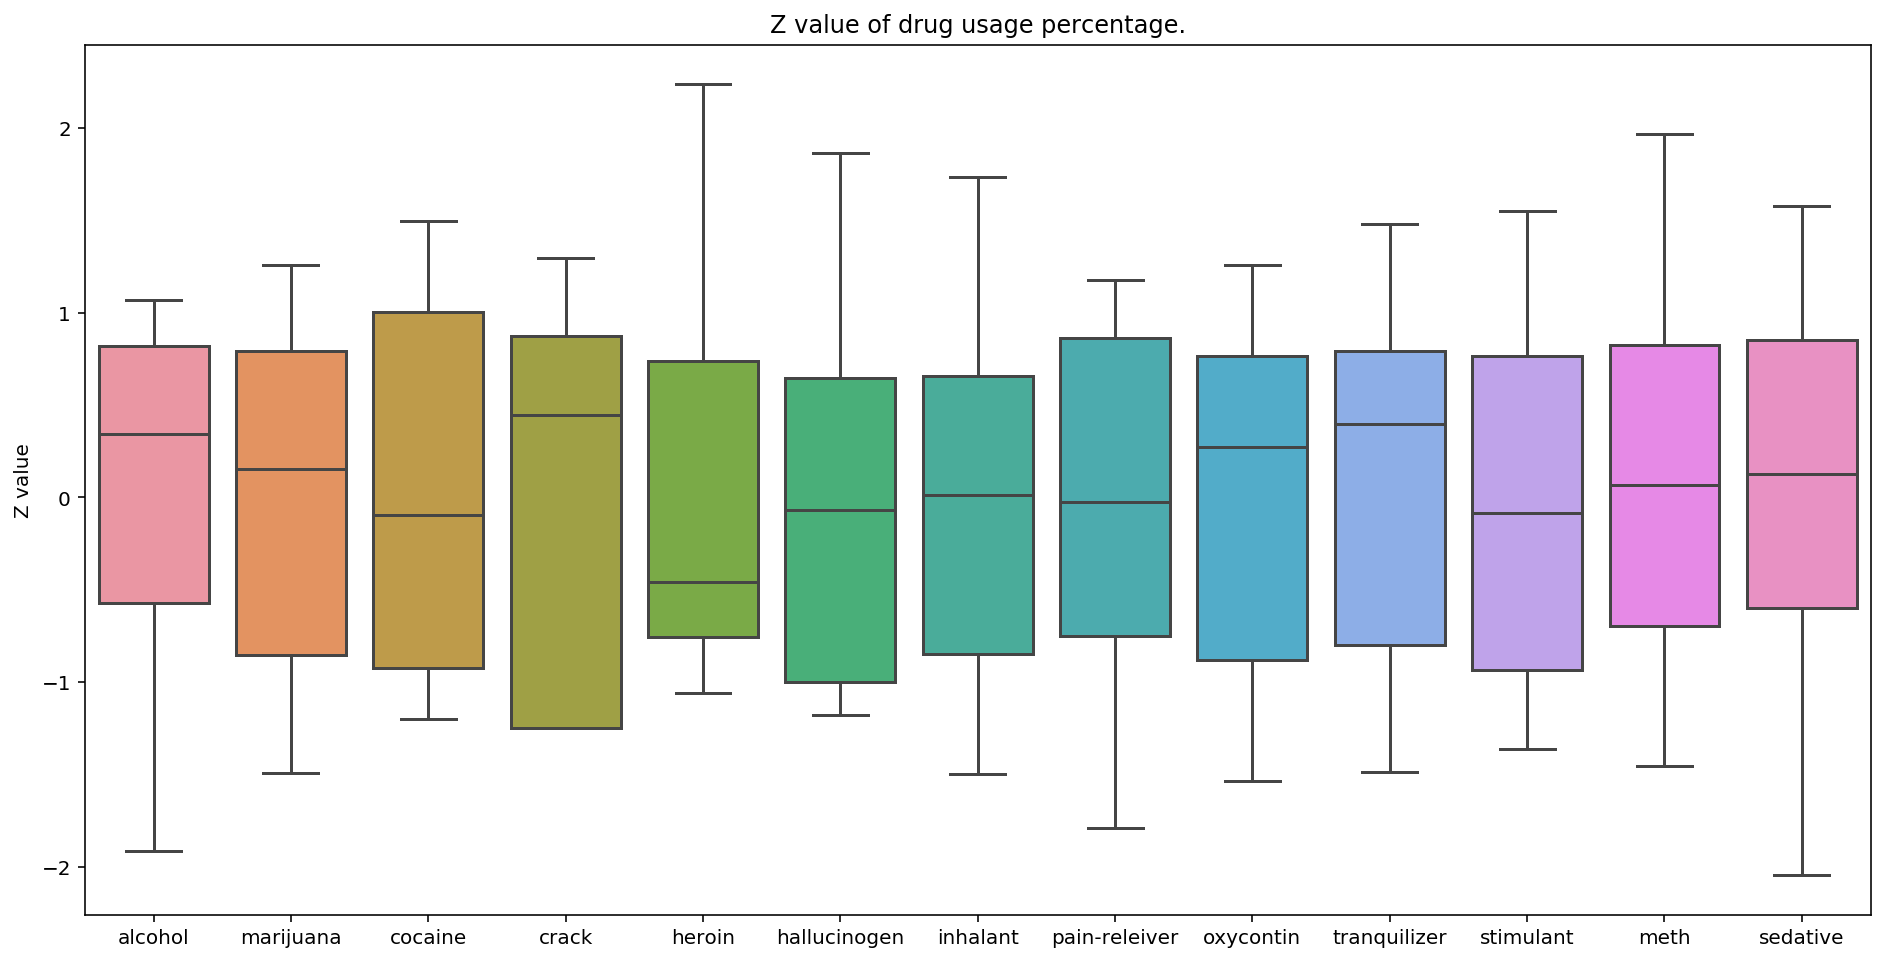

In [54]:
# Compare distributions using standard values across percentage and median frequency.
list_column_percent = [drug+'_%' for drug in drugs]
df_percent = df_drug_use[list_column_percent]
df_percent_stand = (df_percent - df_percent.mean()) / df_percent.std()
plt.figure(figsize = (16, 8))
ax_pct_boxplot = sns.boxplot(data = df_percent_stand, order = list_column_percent)
ax_pct_boxplot.set_xticklabels(drugs)
ax_pct_boxplot.set_title('Z value of drug usage percentage.')
ax_pct_boxplot.set_ylabel('Z value')
plt.show()

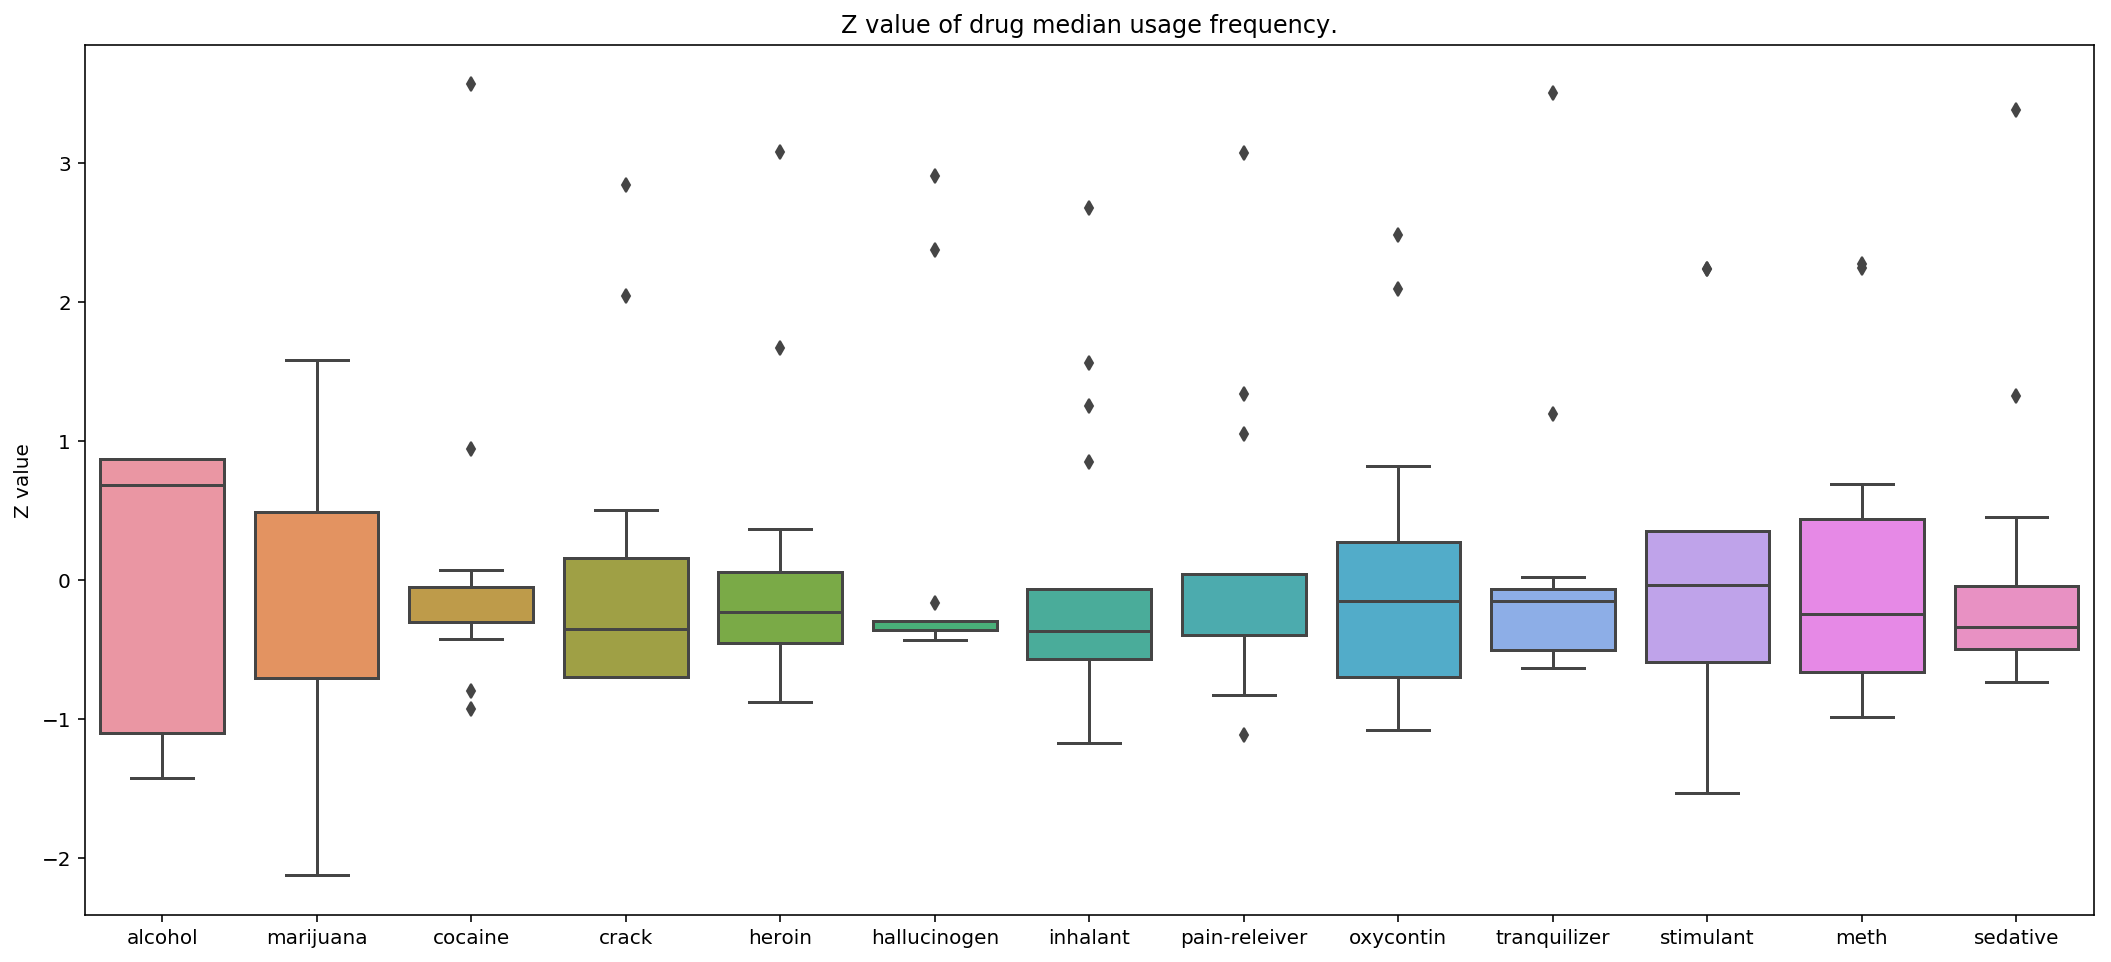

In [55]:
list_column_freq = ['med_freq_'+drug for drug in drugs]
df_freq = df_drug_use[list_column_freq]
df_freq_stand = (df_freq - df_freq.mean()) / df_freq.std()
plt.figure(figsize = (18, 8))
ax_freq_boxplot = sns.boxplot(data = df_freq_stand, order = list_column_freq)
ax_freq_boxplot.set_xticklabels(drugs)
ax_freq_boxplot.set_title('Z value of drug median usage frequency.')
ax_freq_boxplot.set_ylabel('Z value')
plt.show()

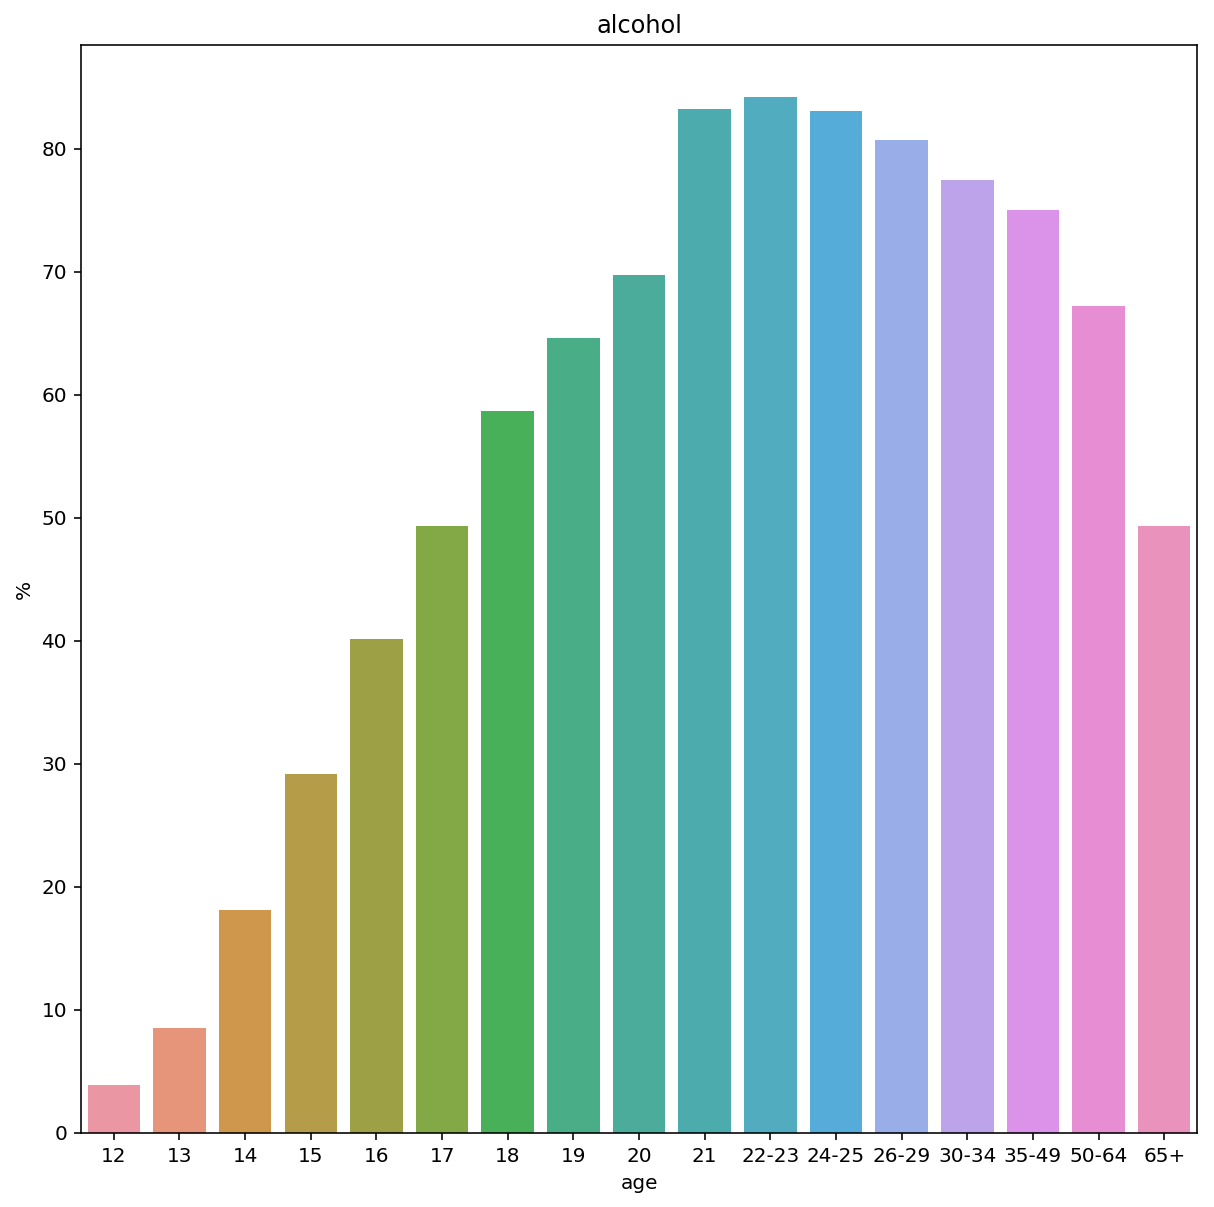

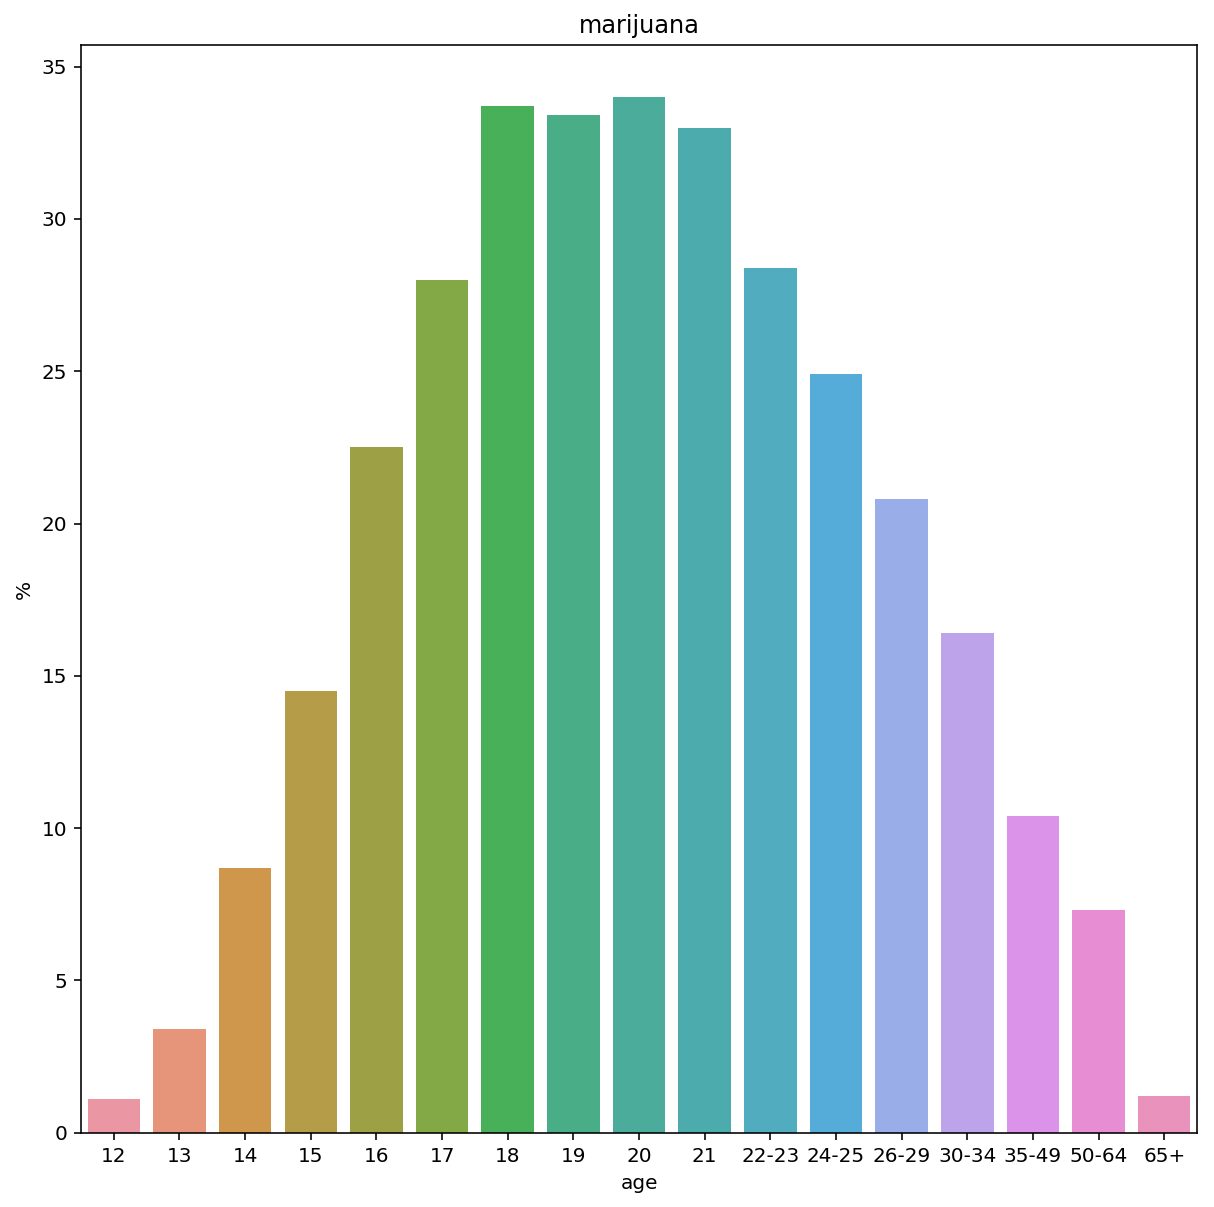

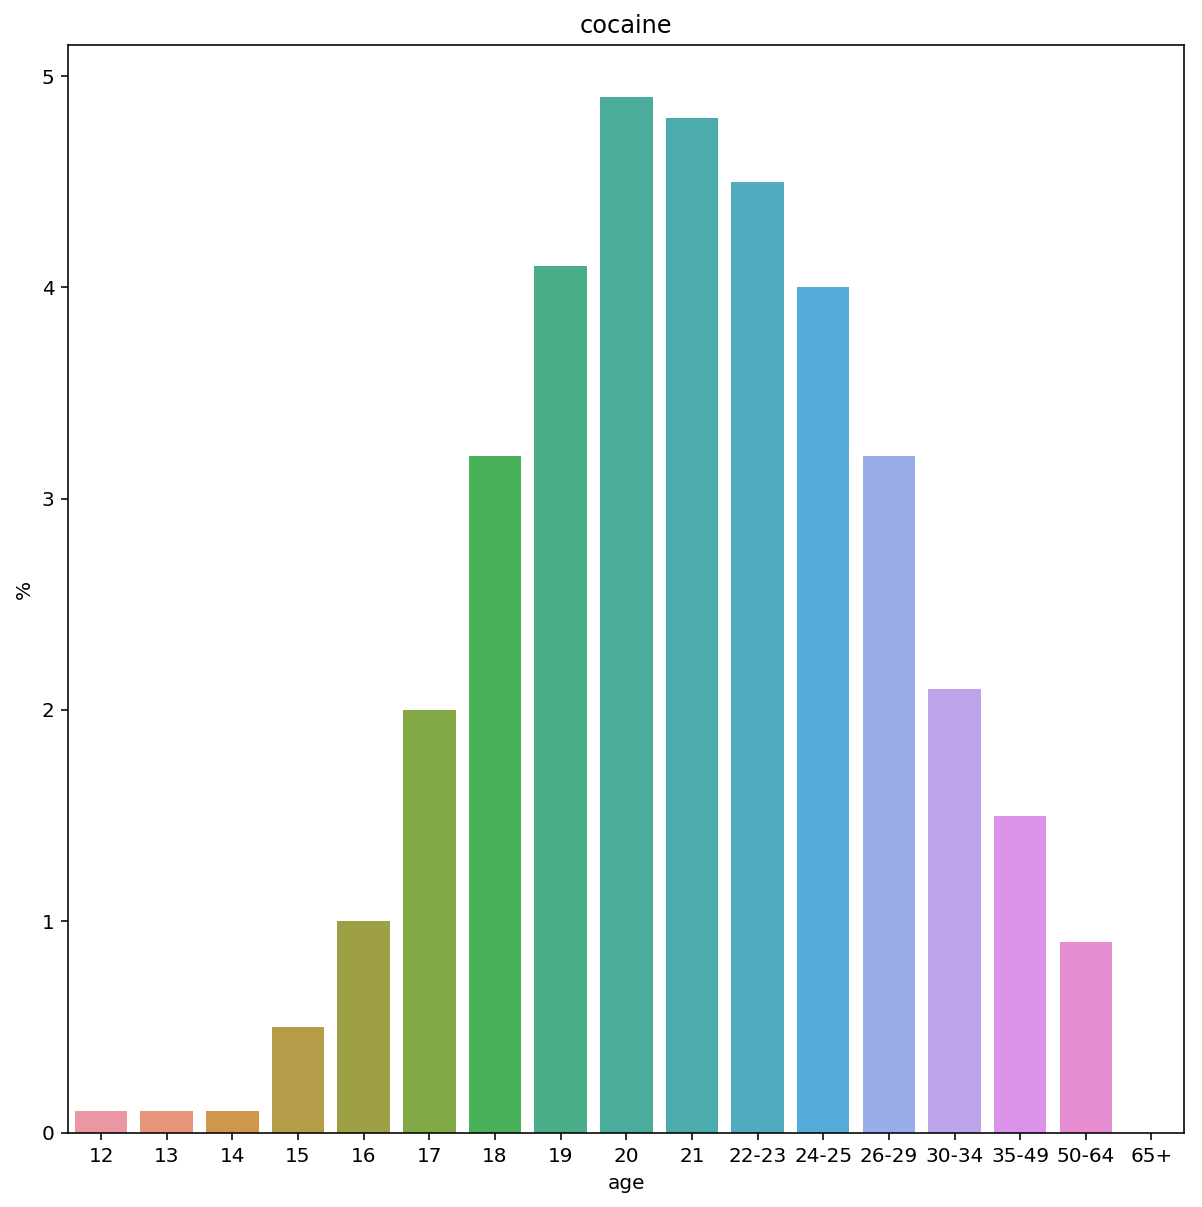

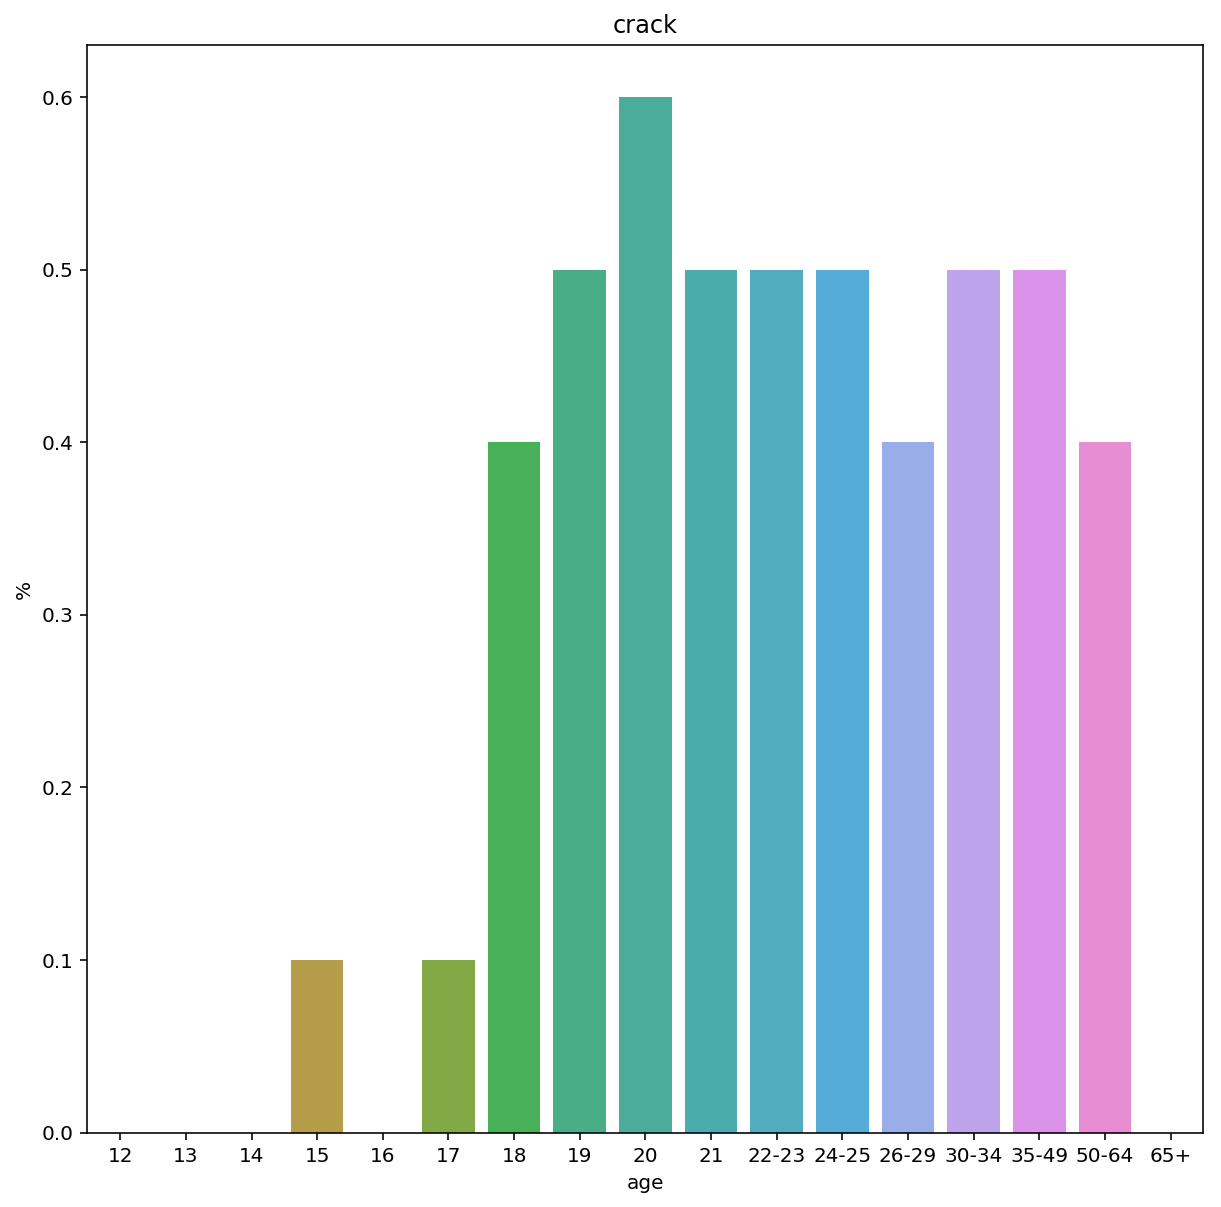

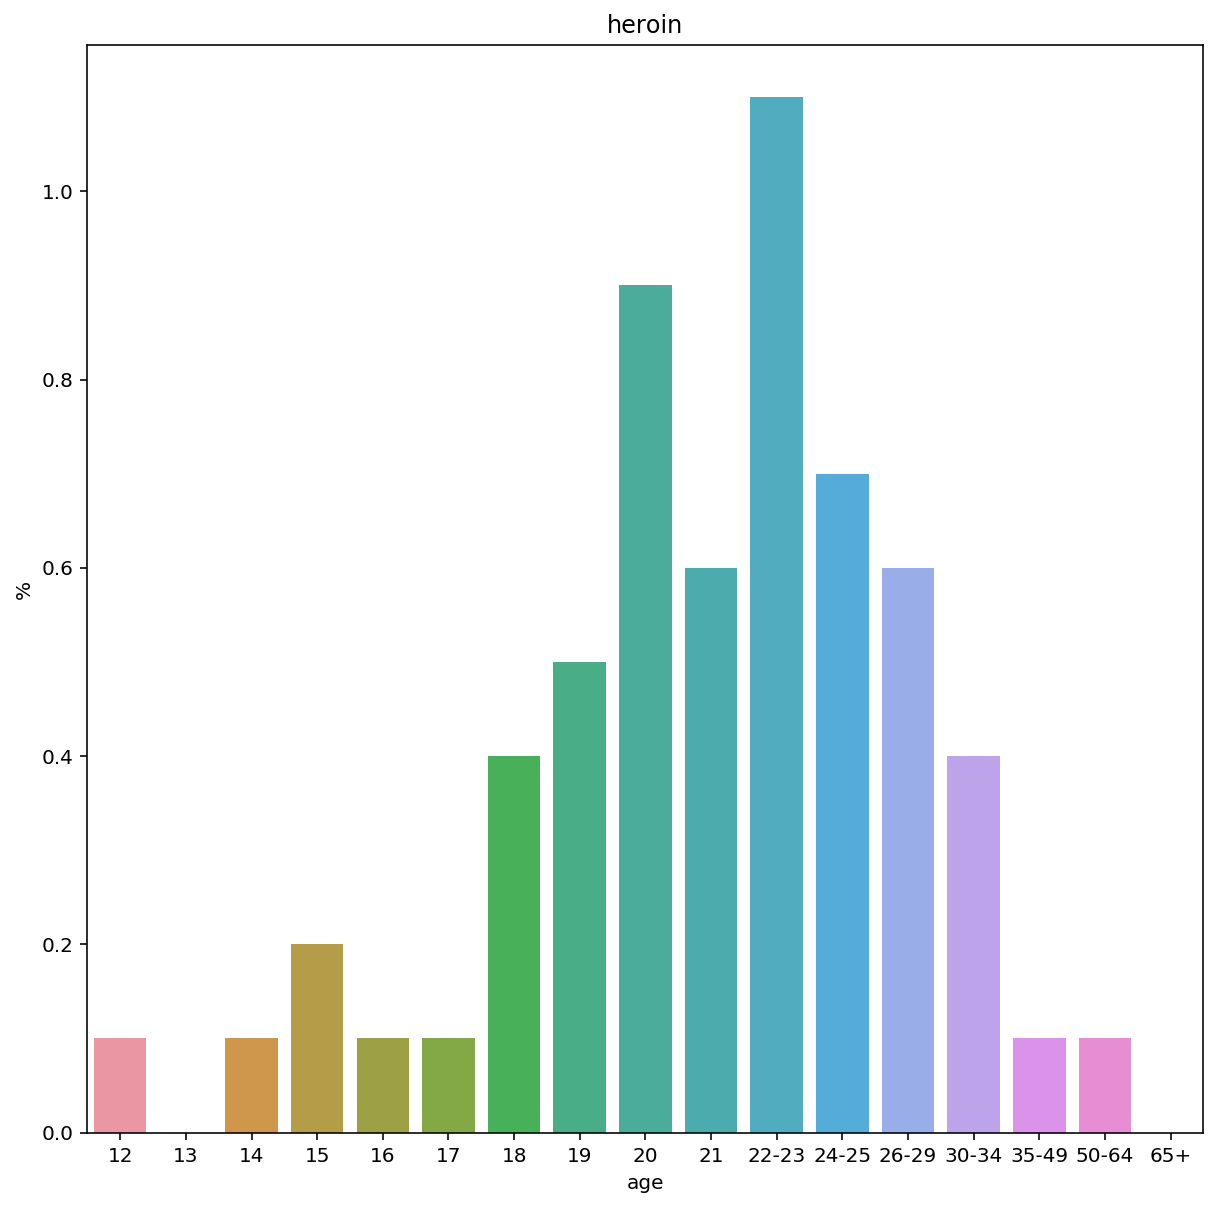

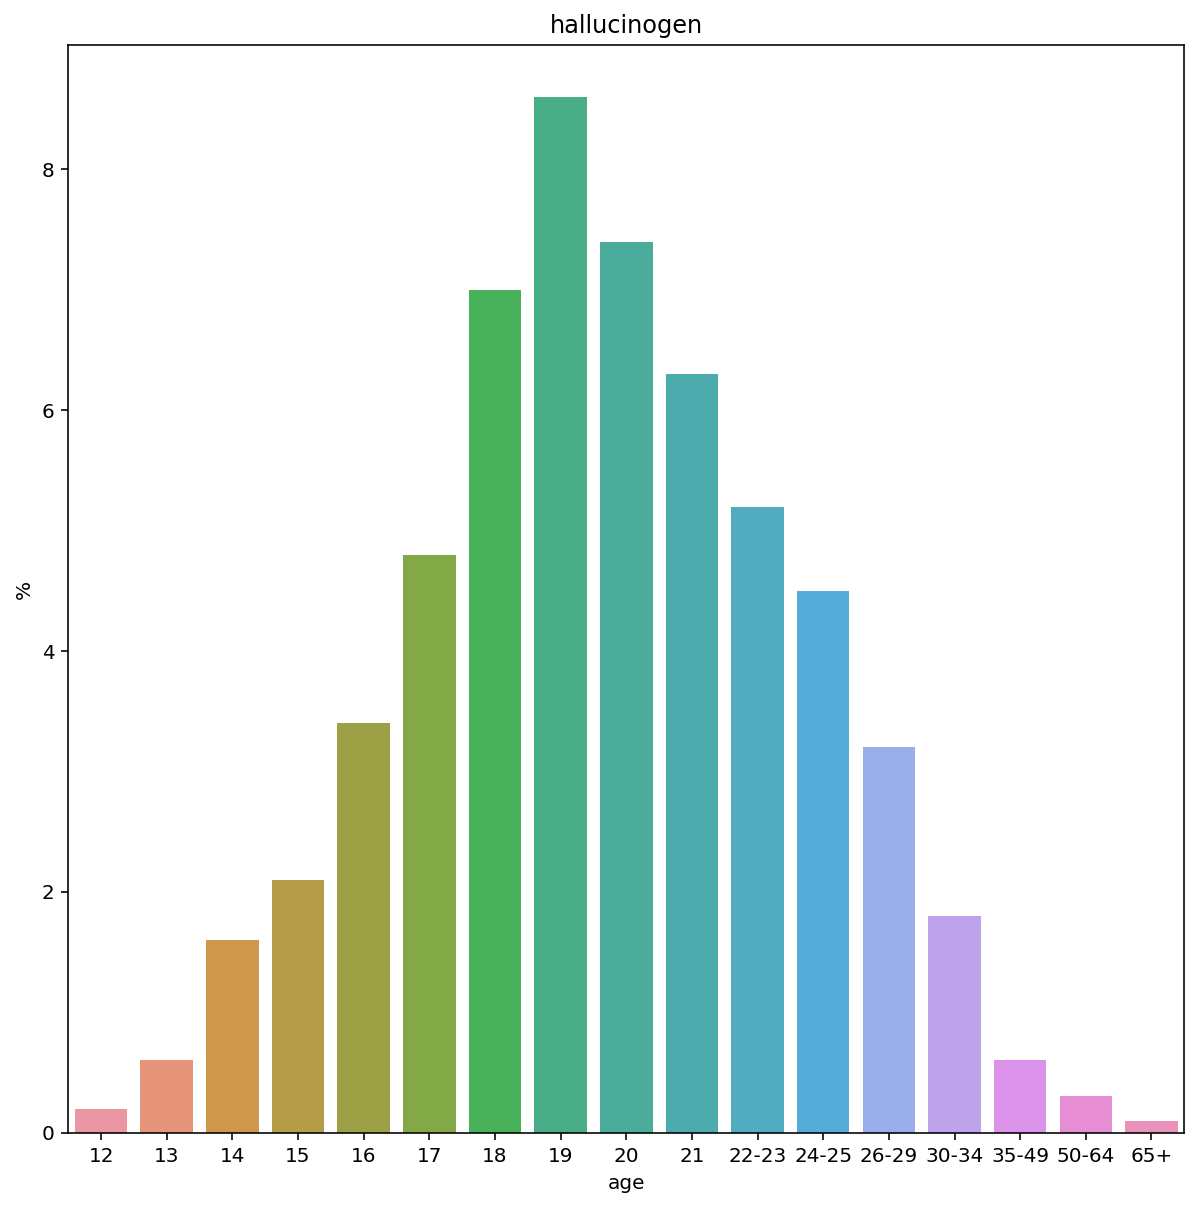

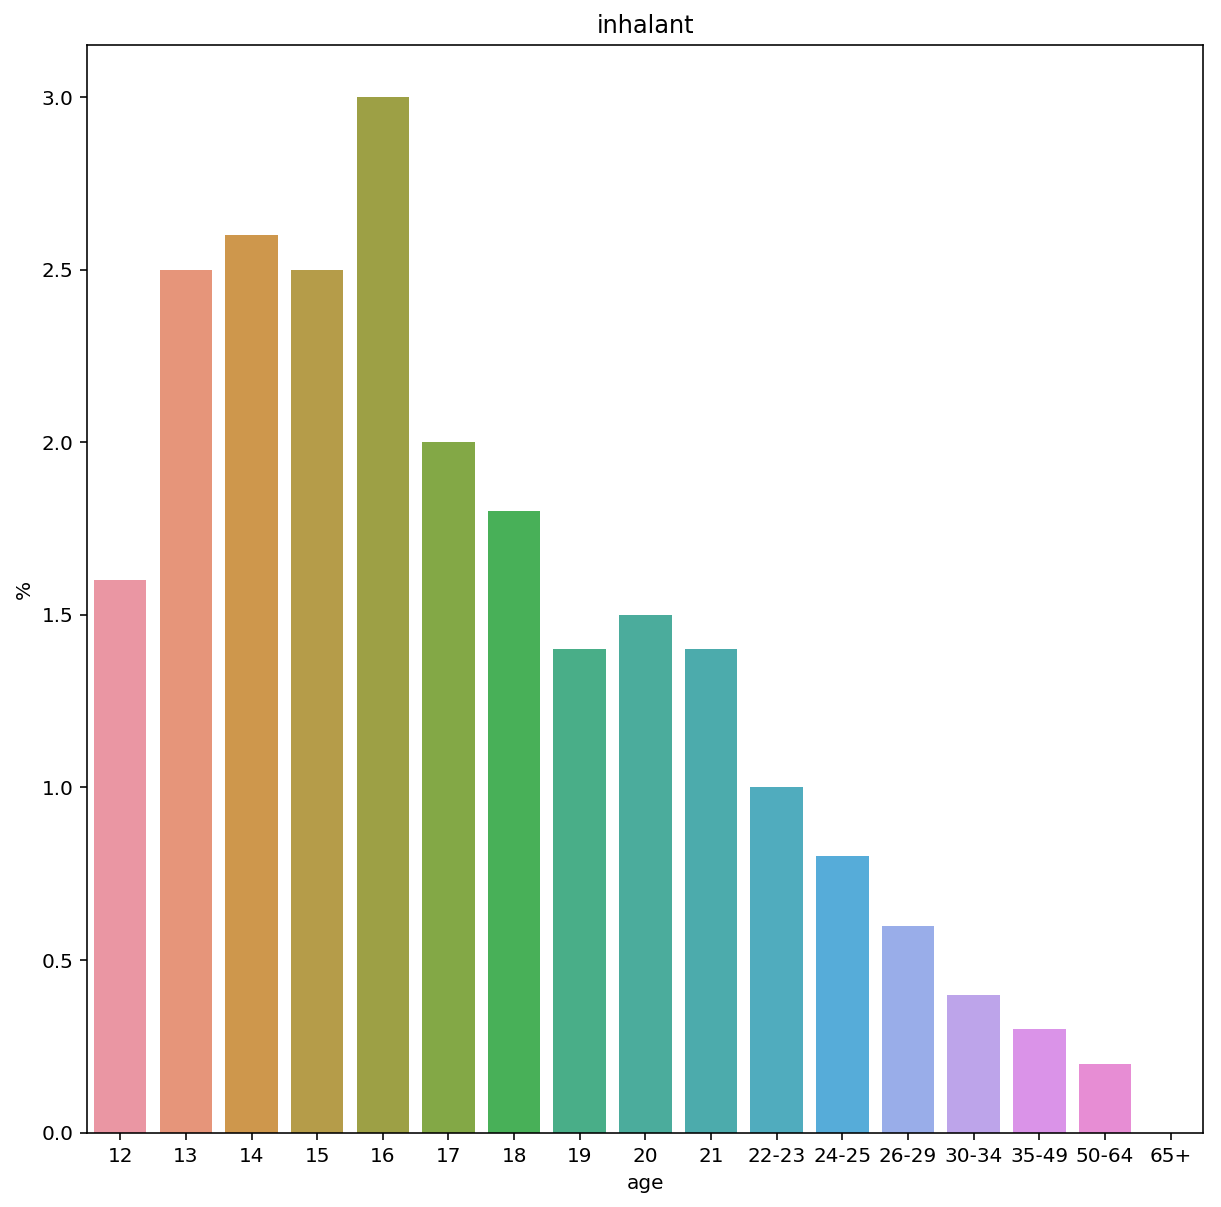

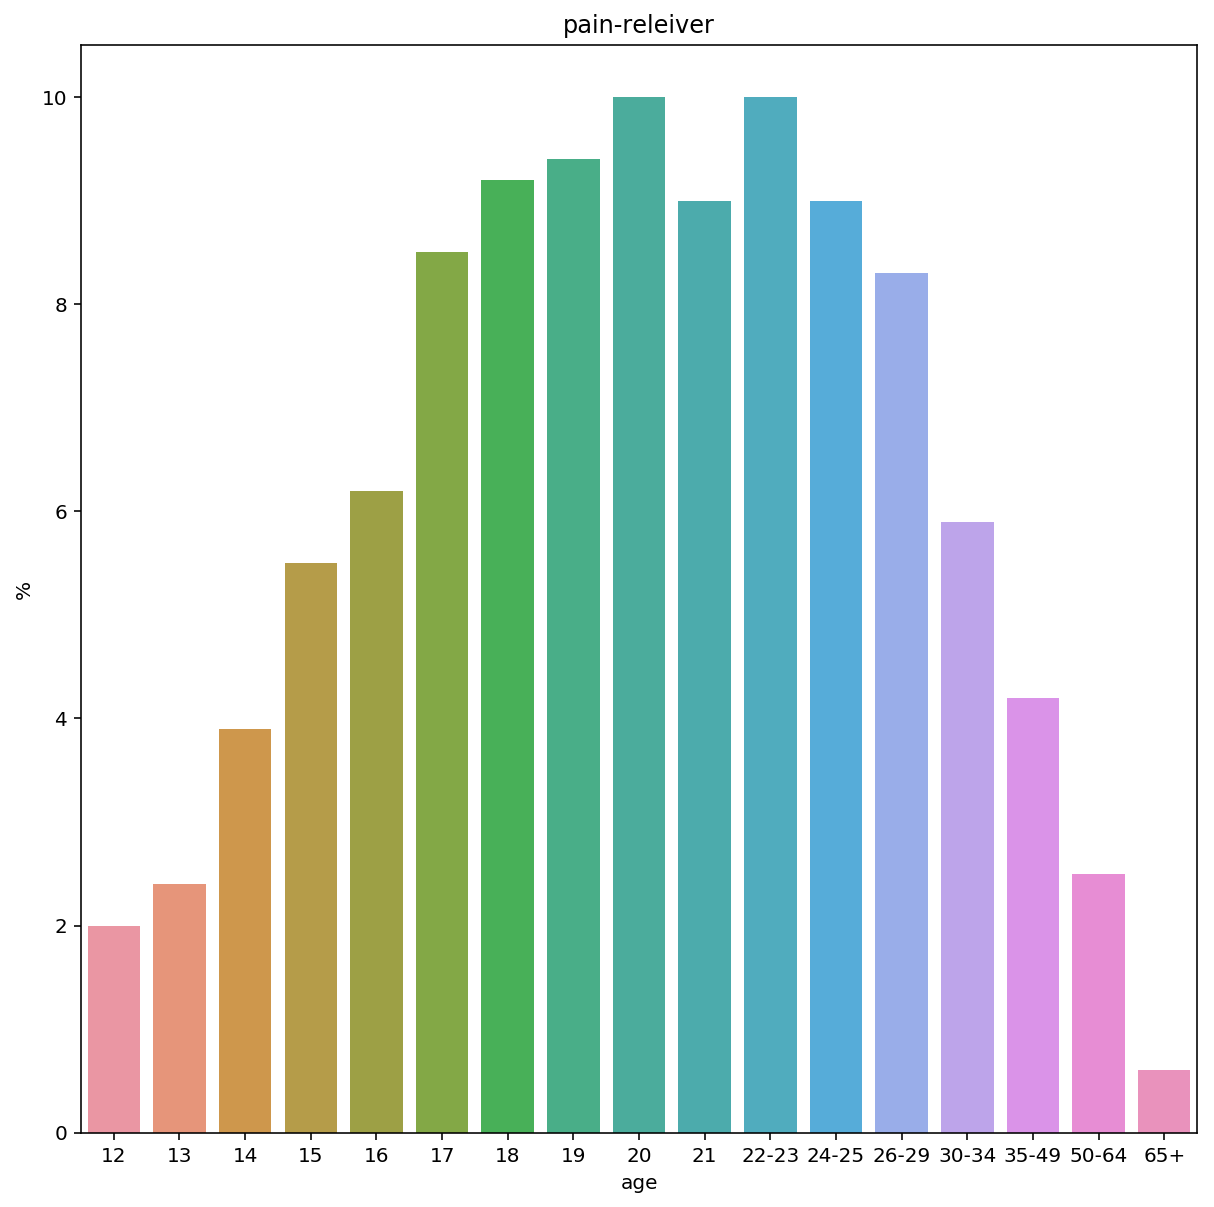

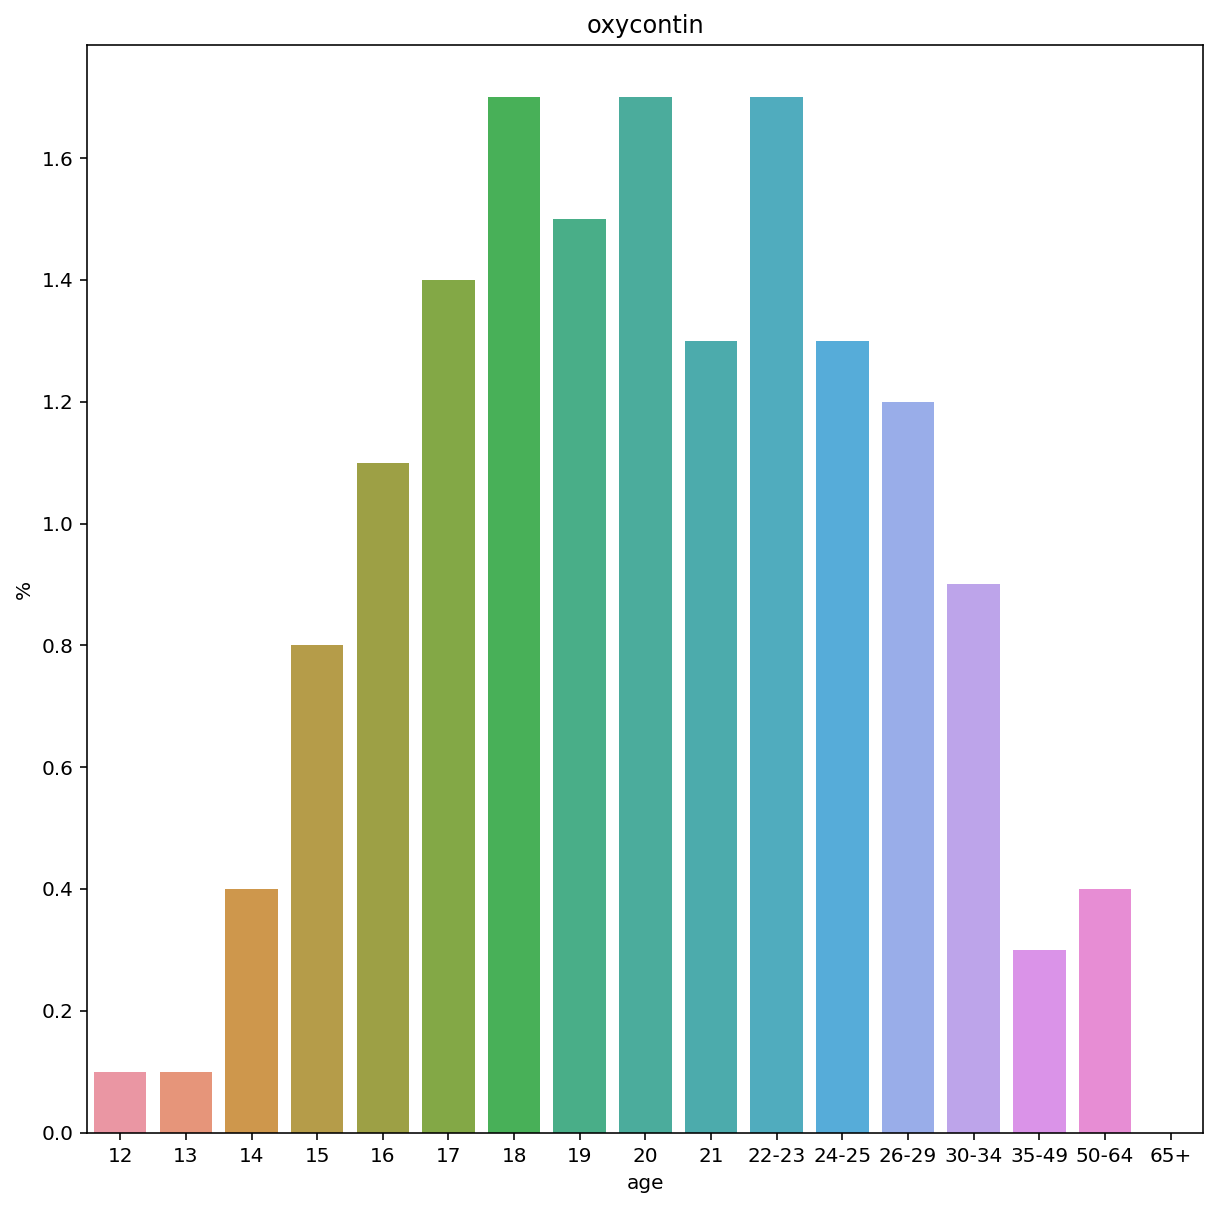

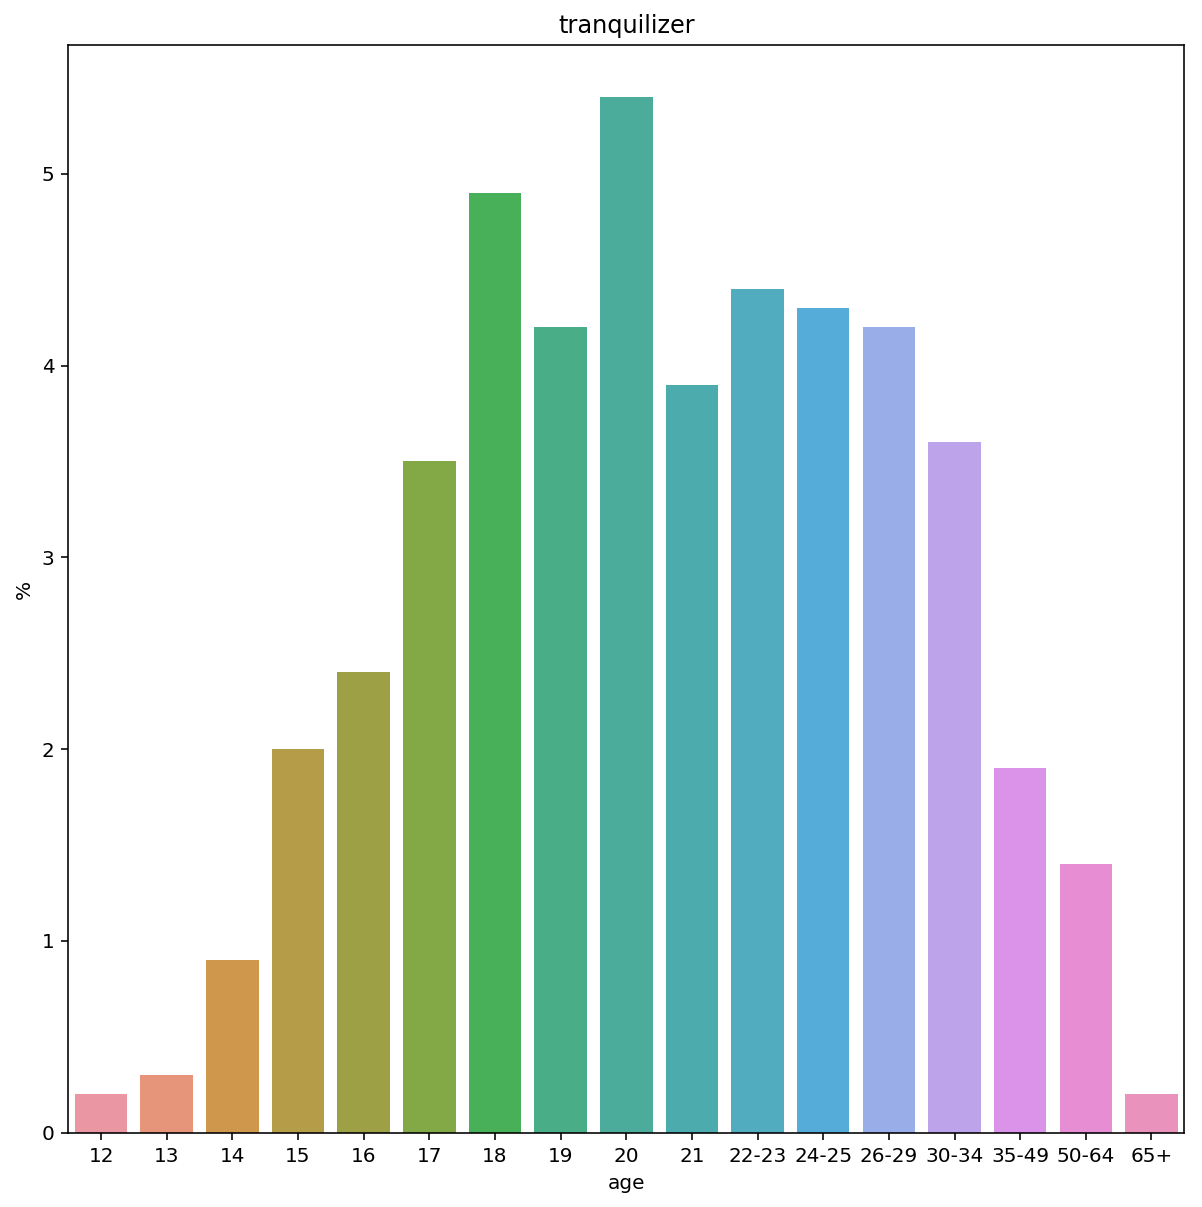

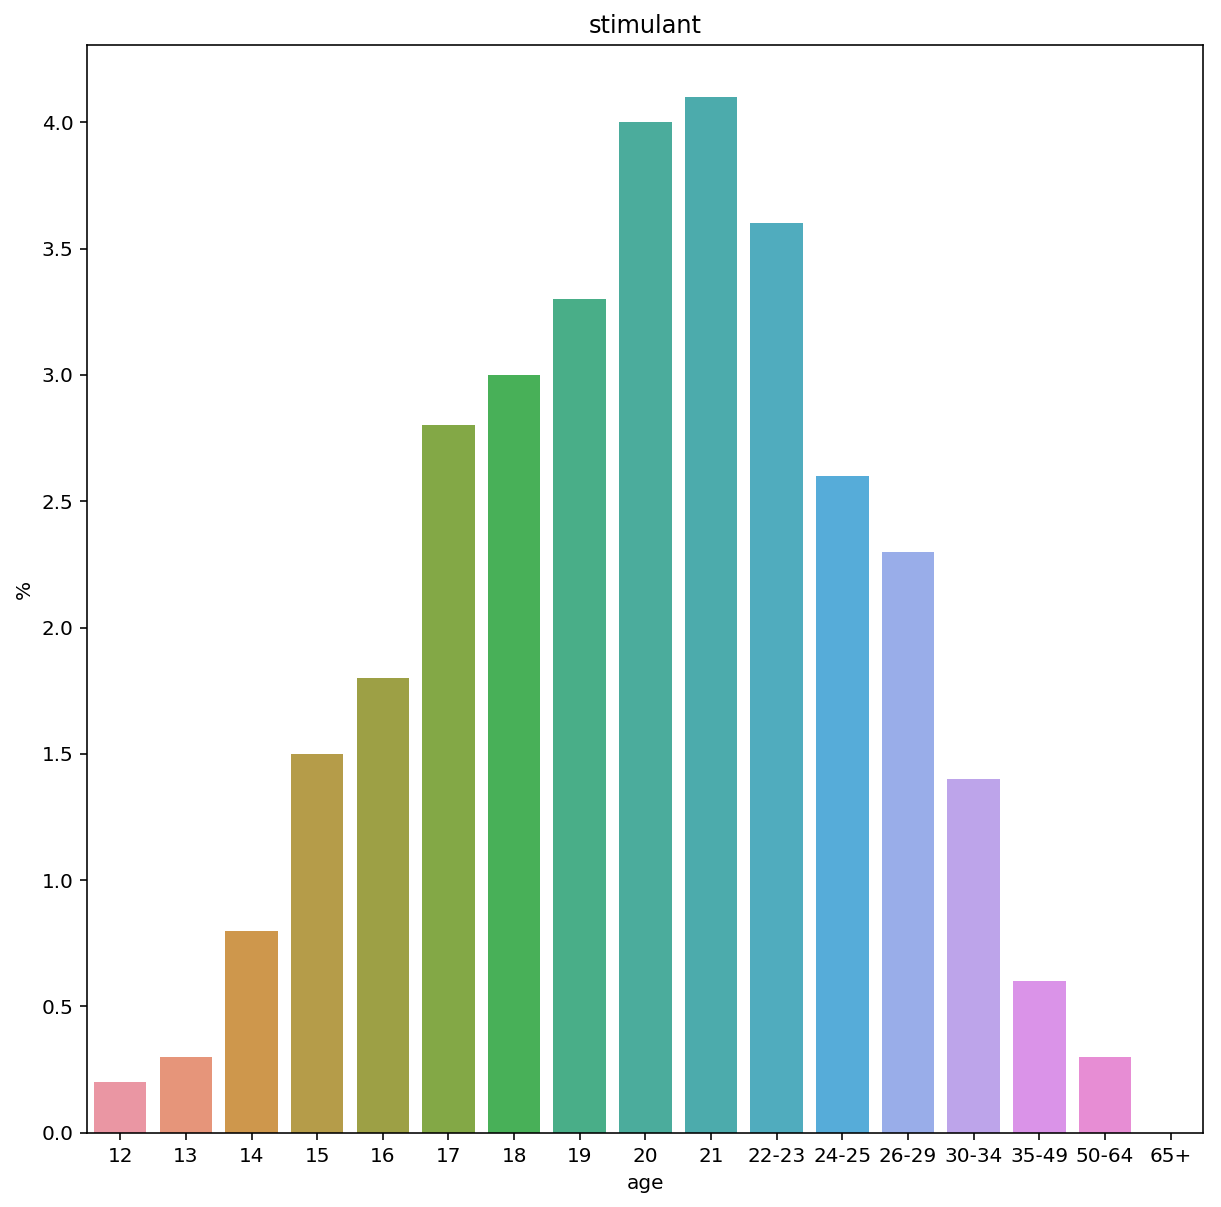

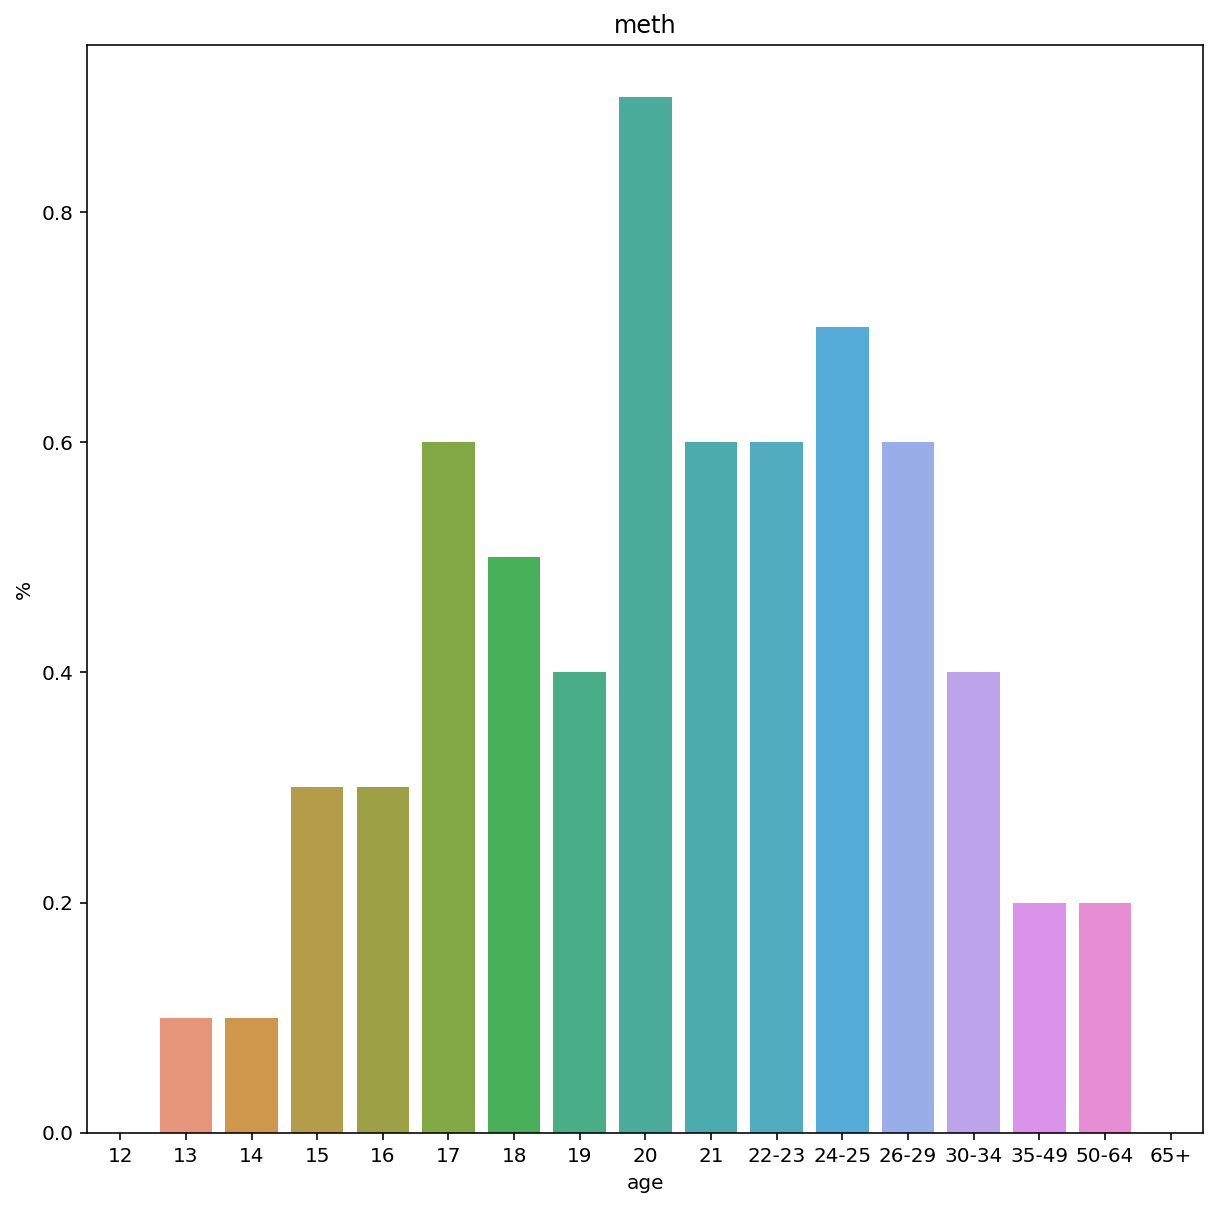

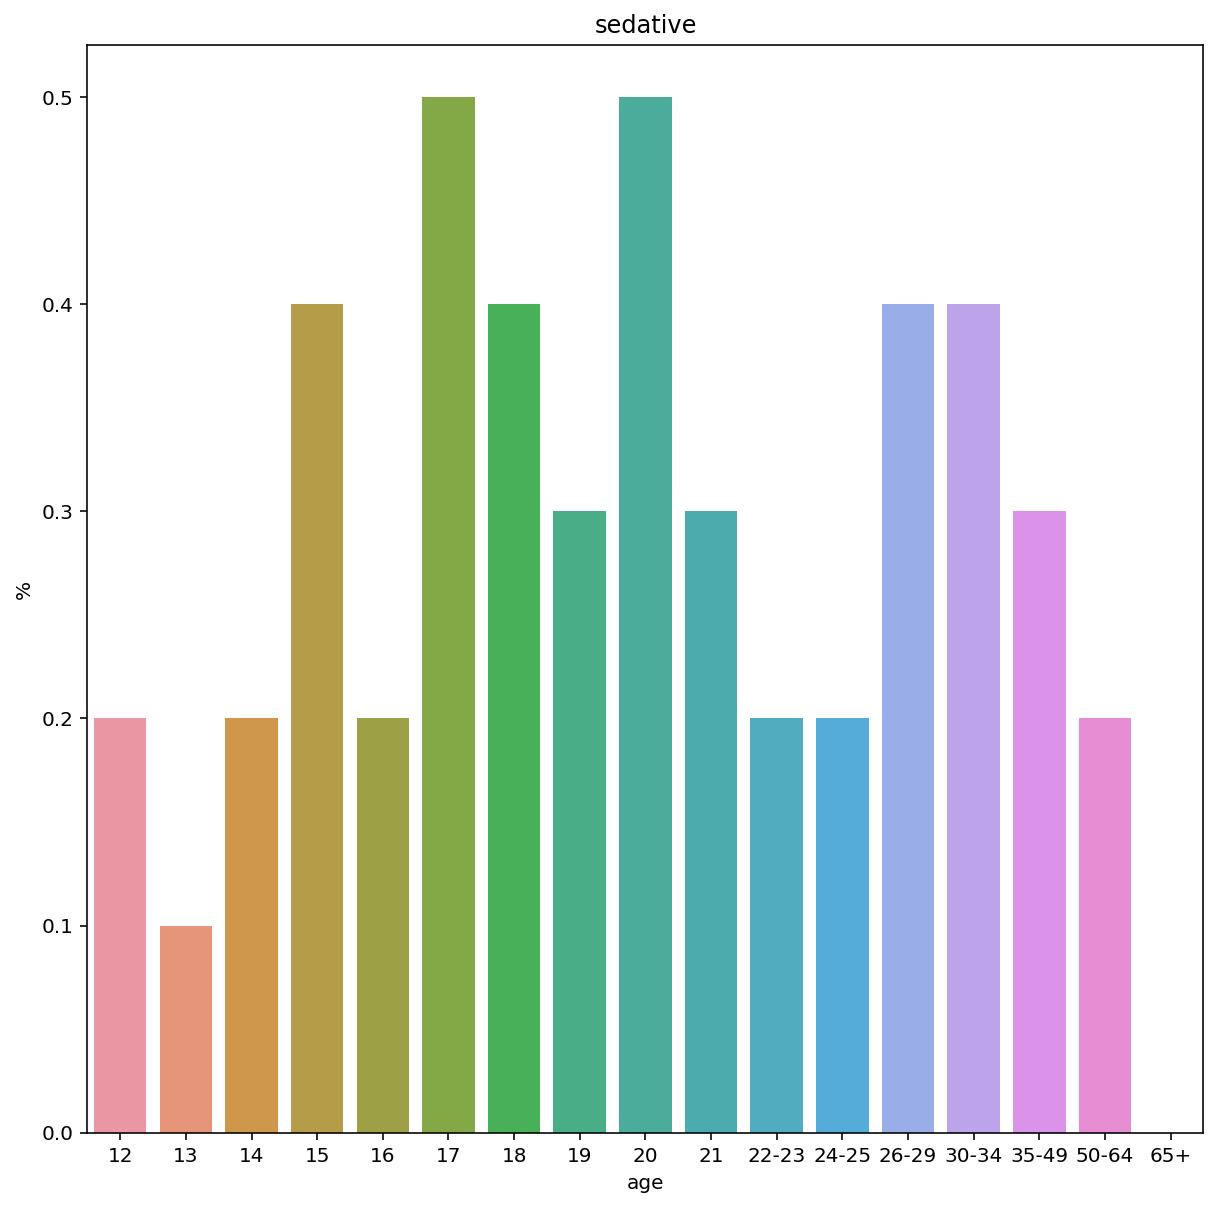

In [56]:
for drug in drugs:
    plt.figure(figsize = (10, 10))
    ax_drug_pct_plt = sns.barplot(x=df_drug_use['age'], y=df_drug_use[drug+'_%'])
    ax_drug_pct_plt.set_ylabel('%')
    ax_drug_pct_plt.set_title(drug)
    plt.show()

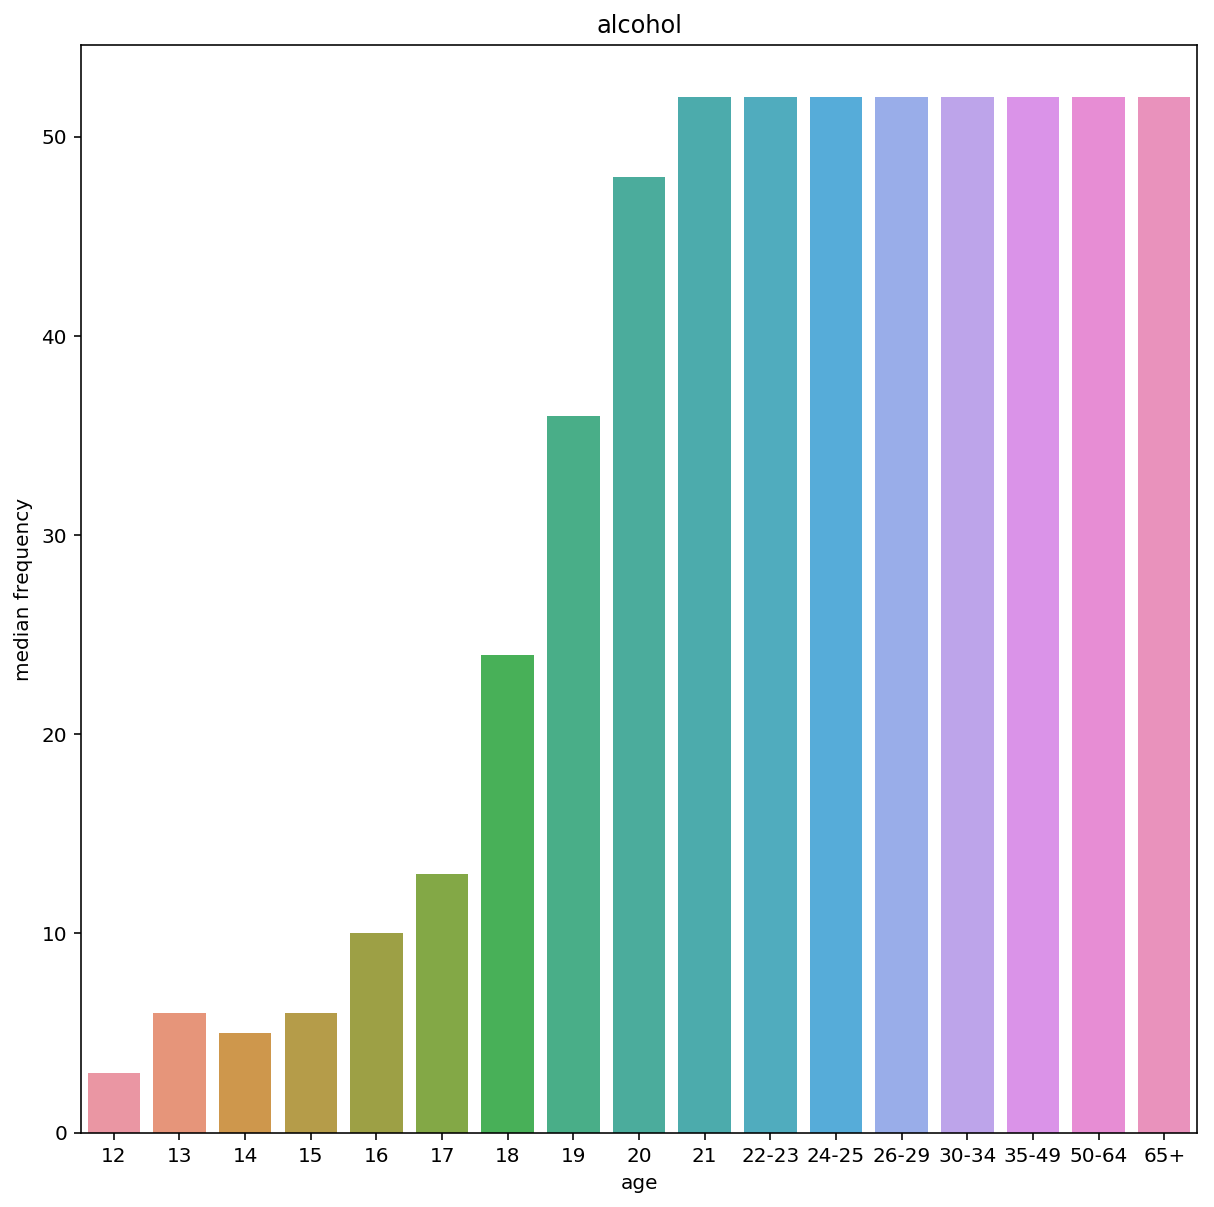

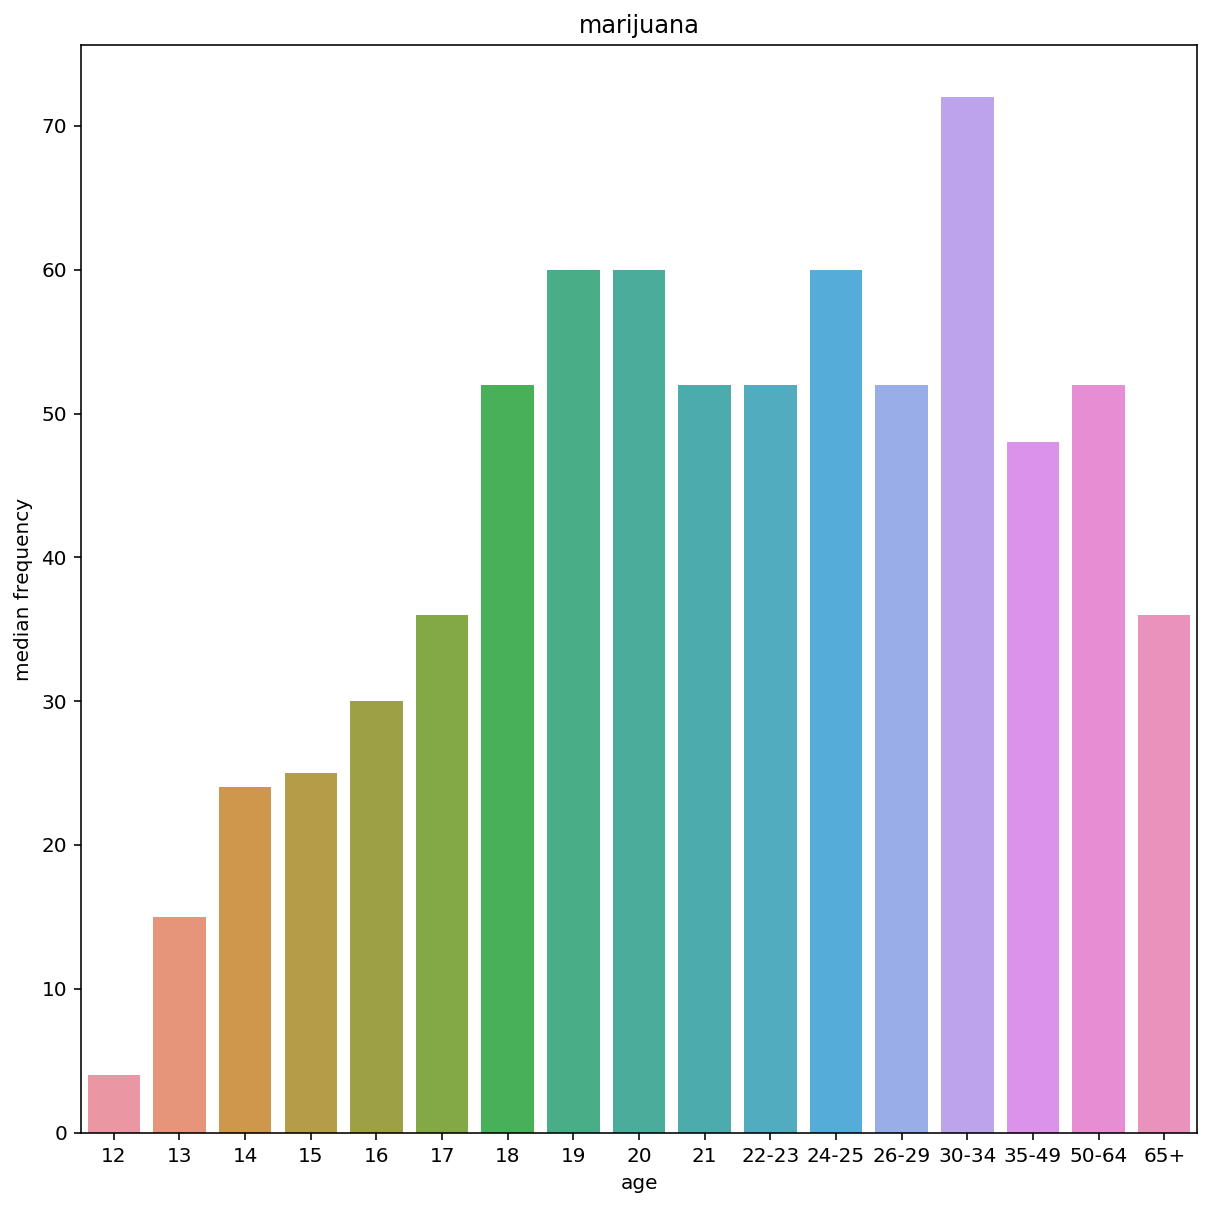

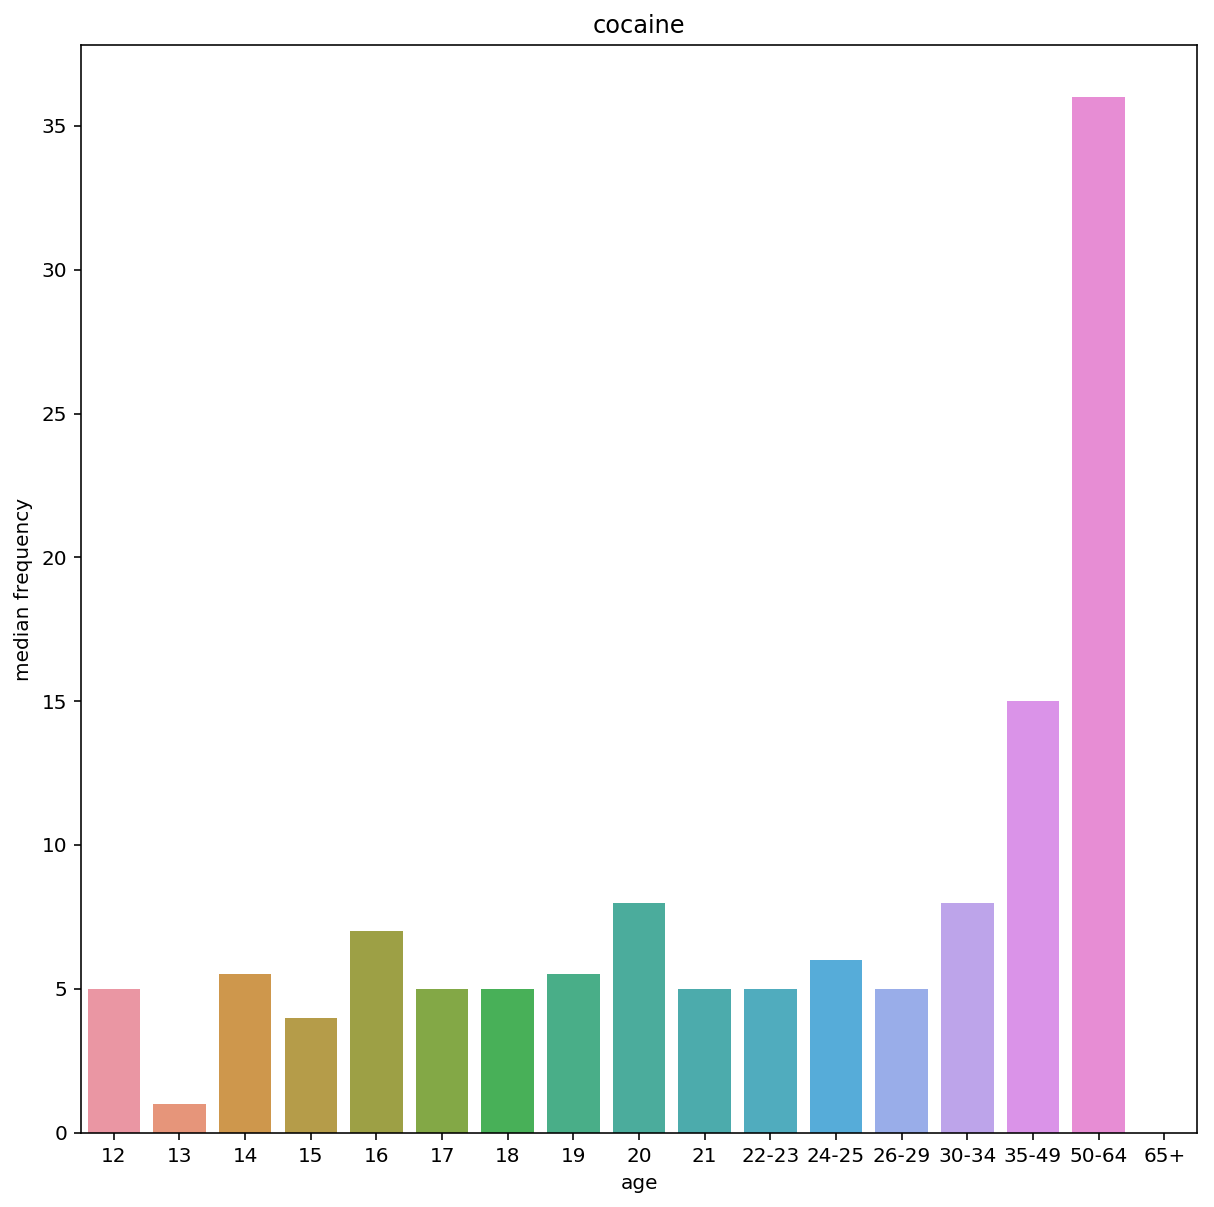

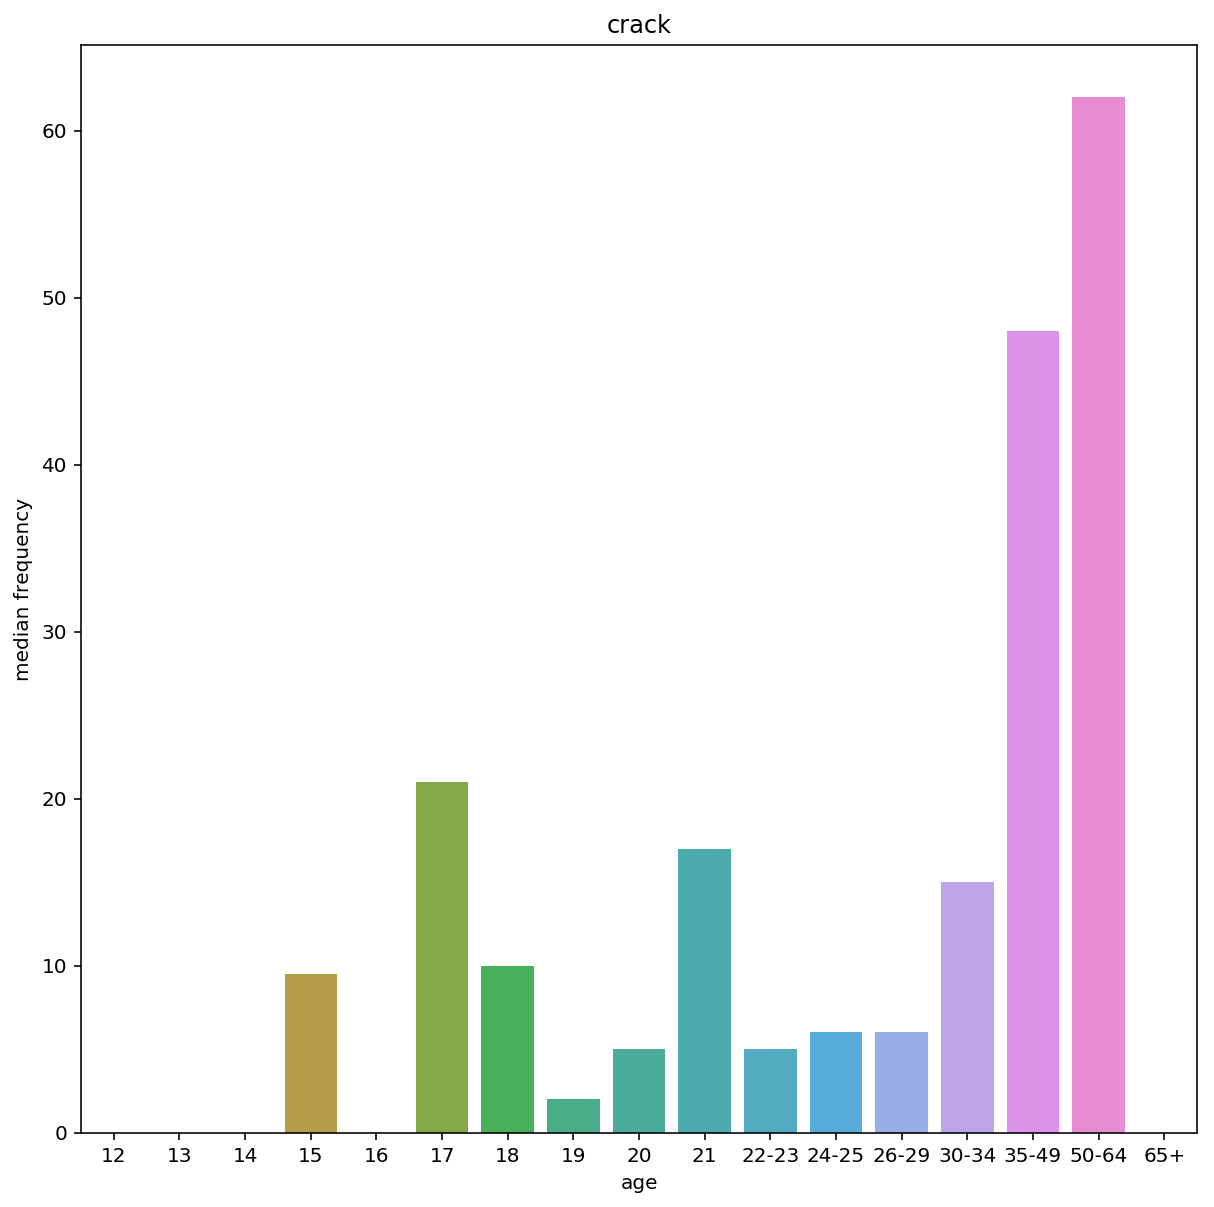

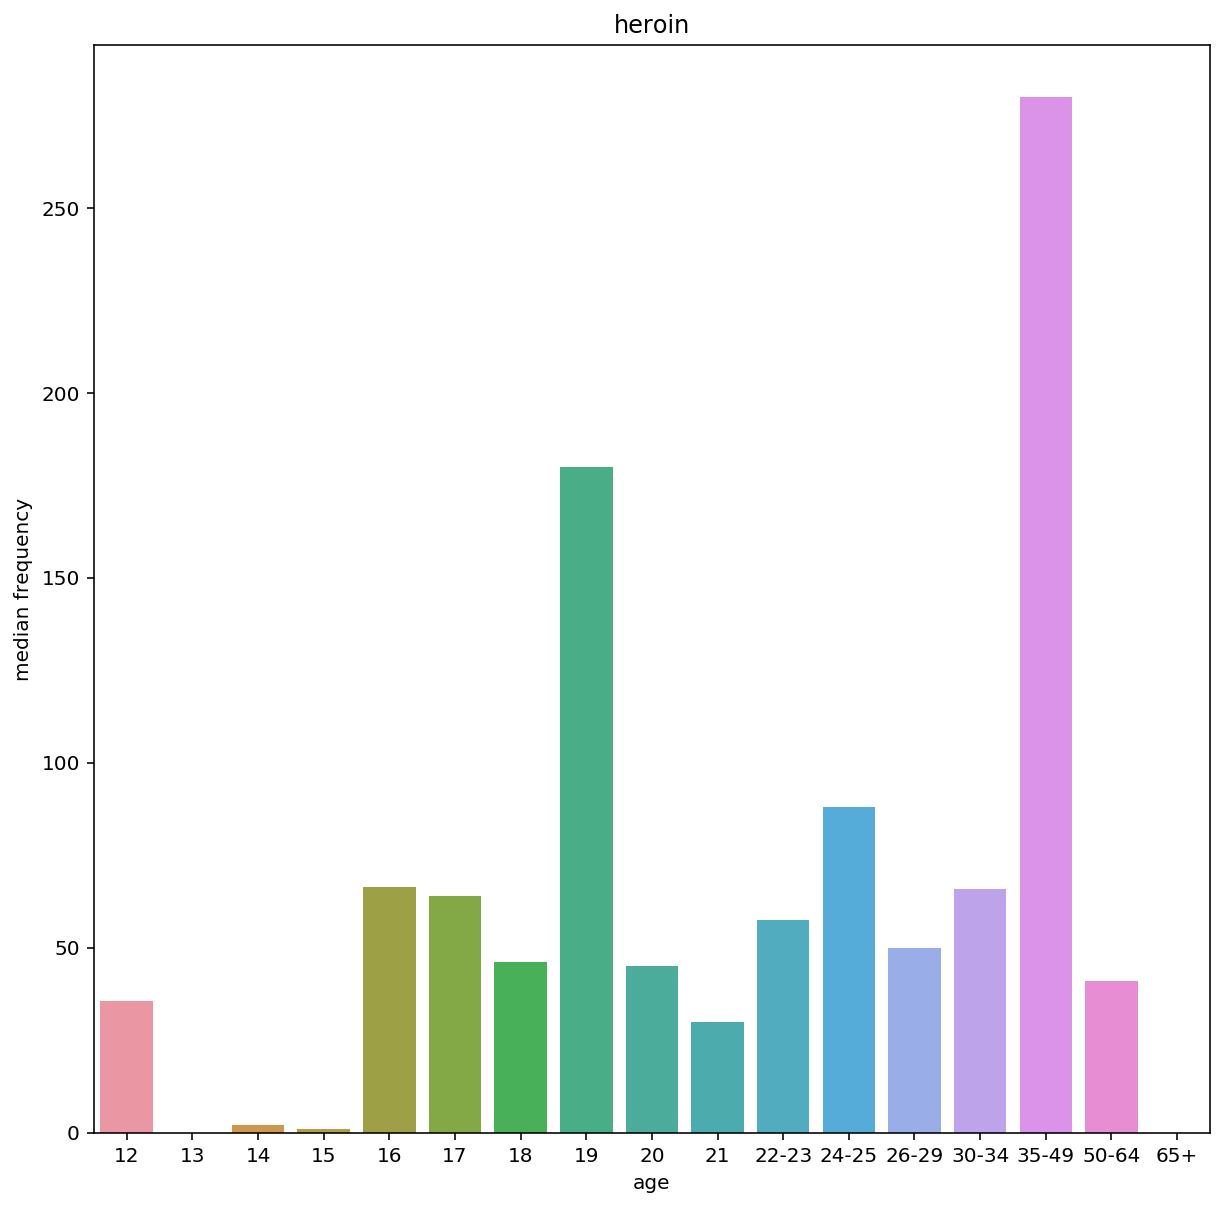

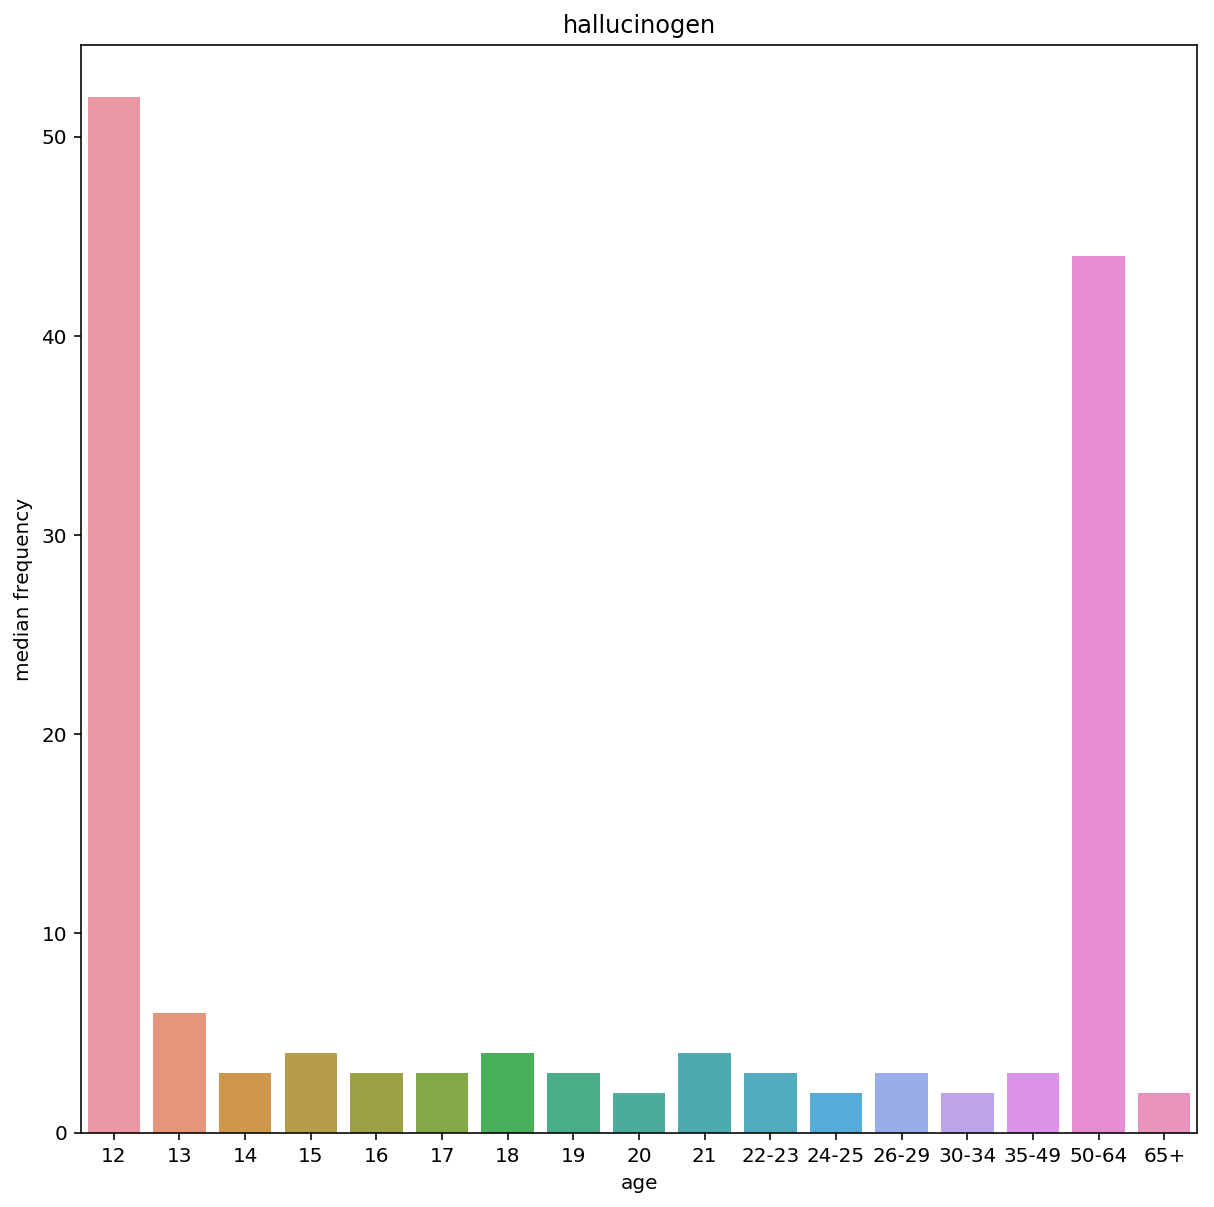

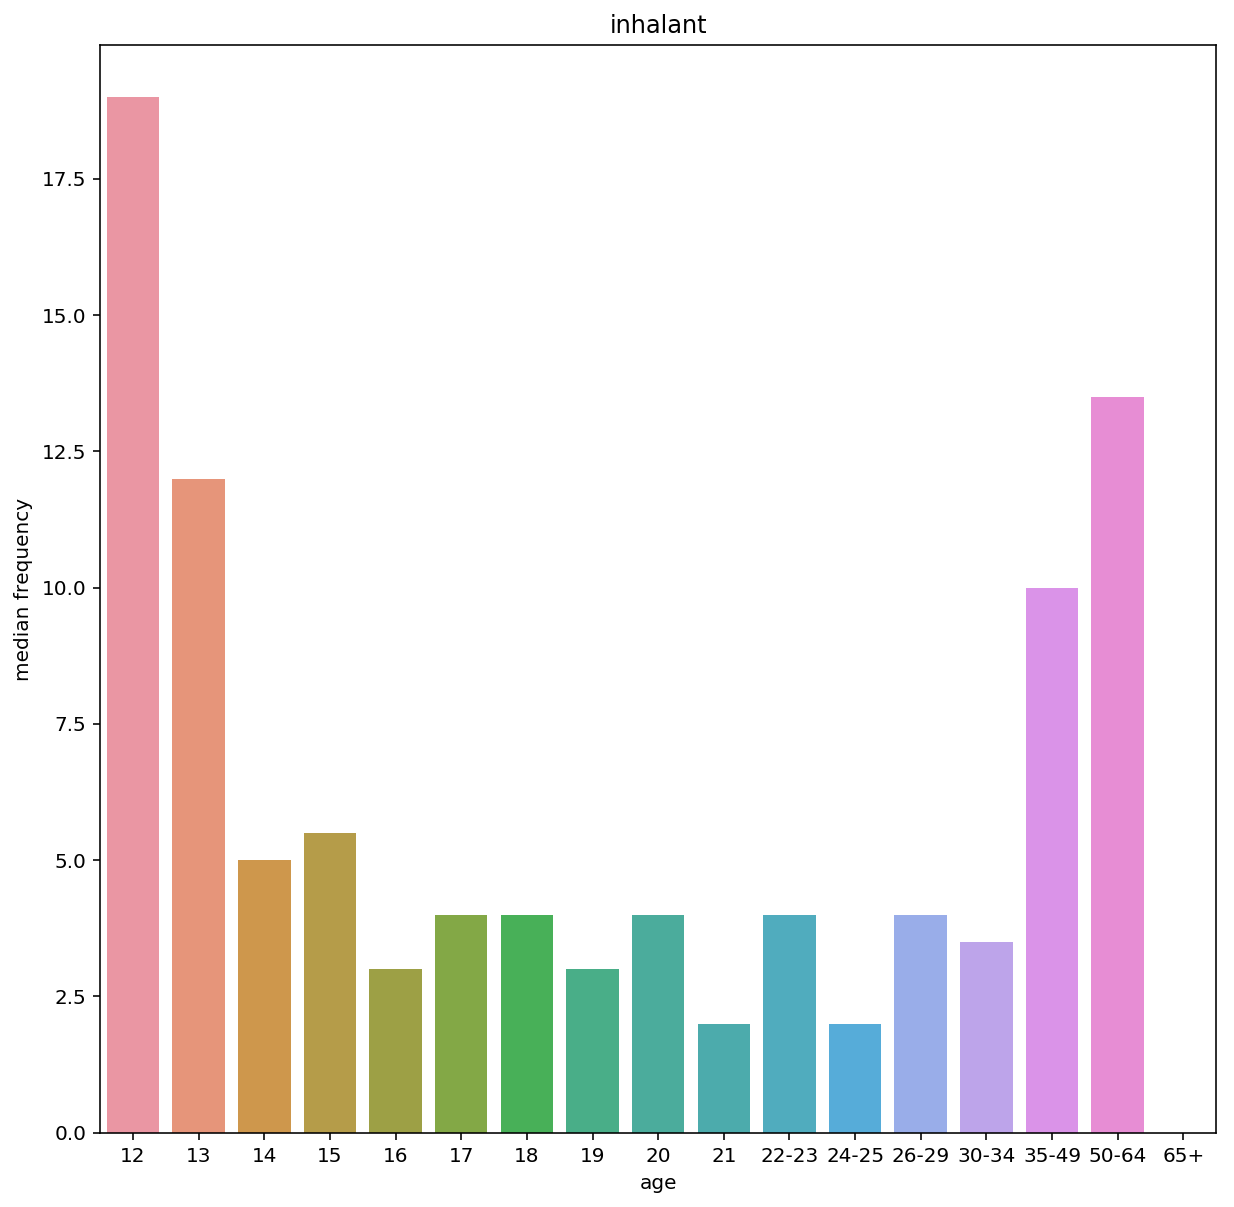

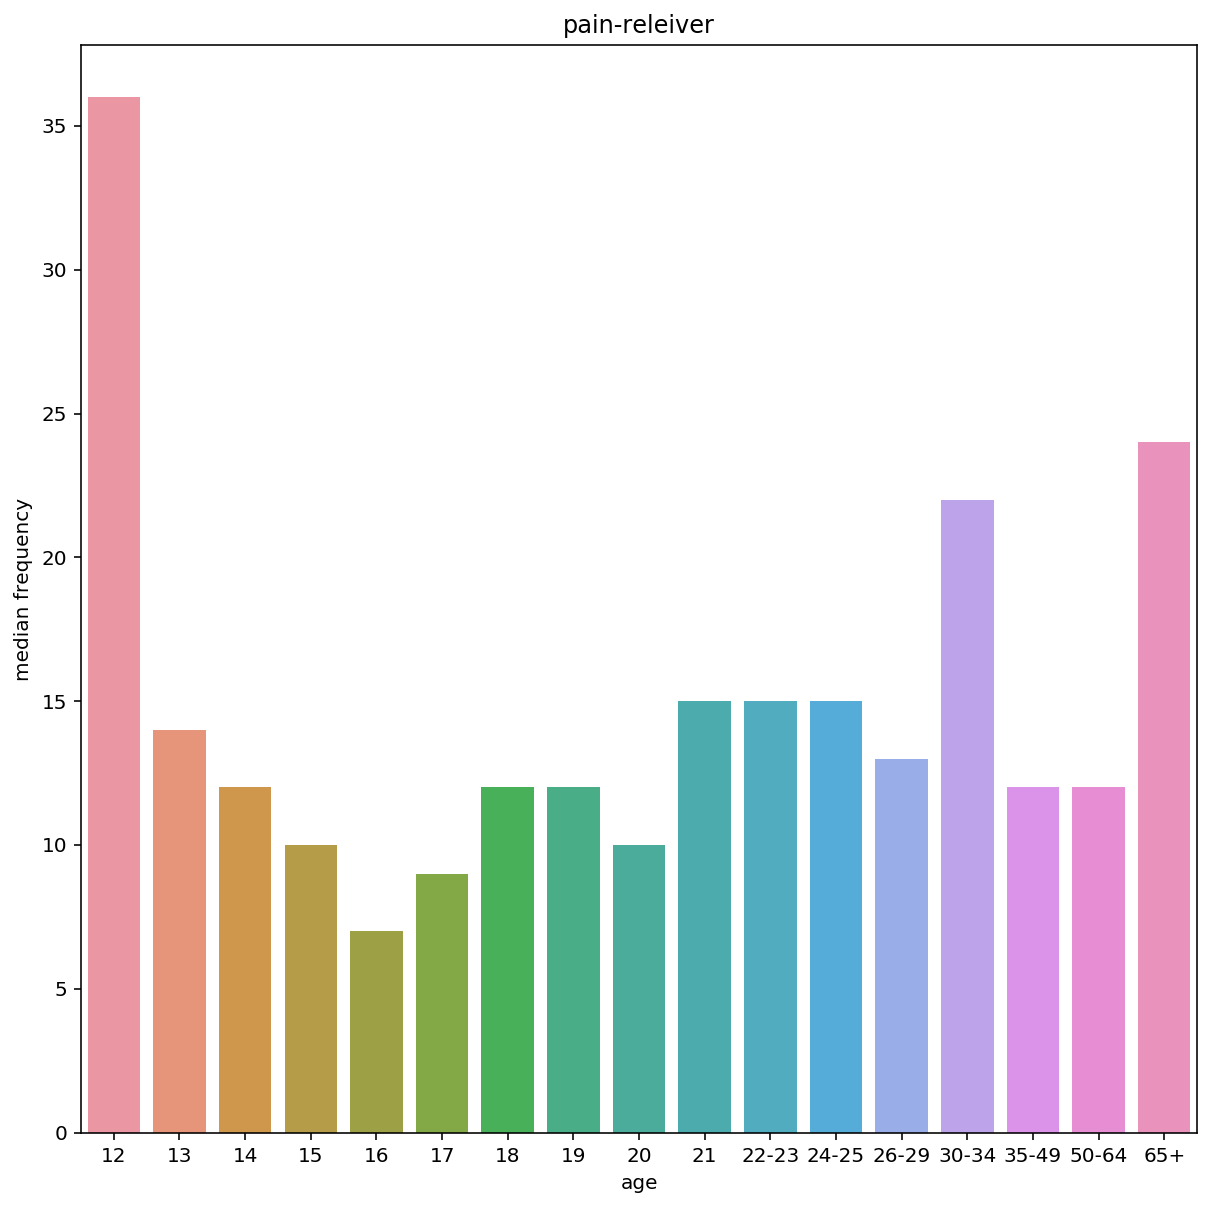

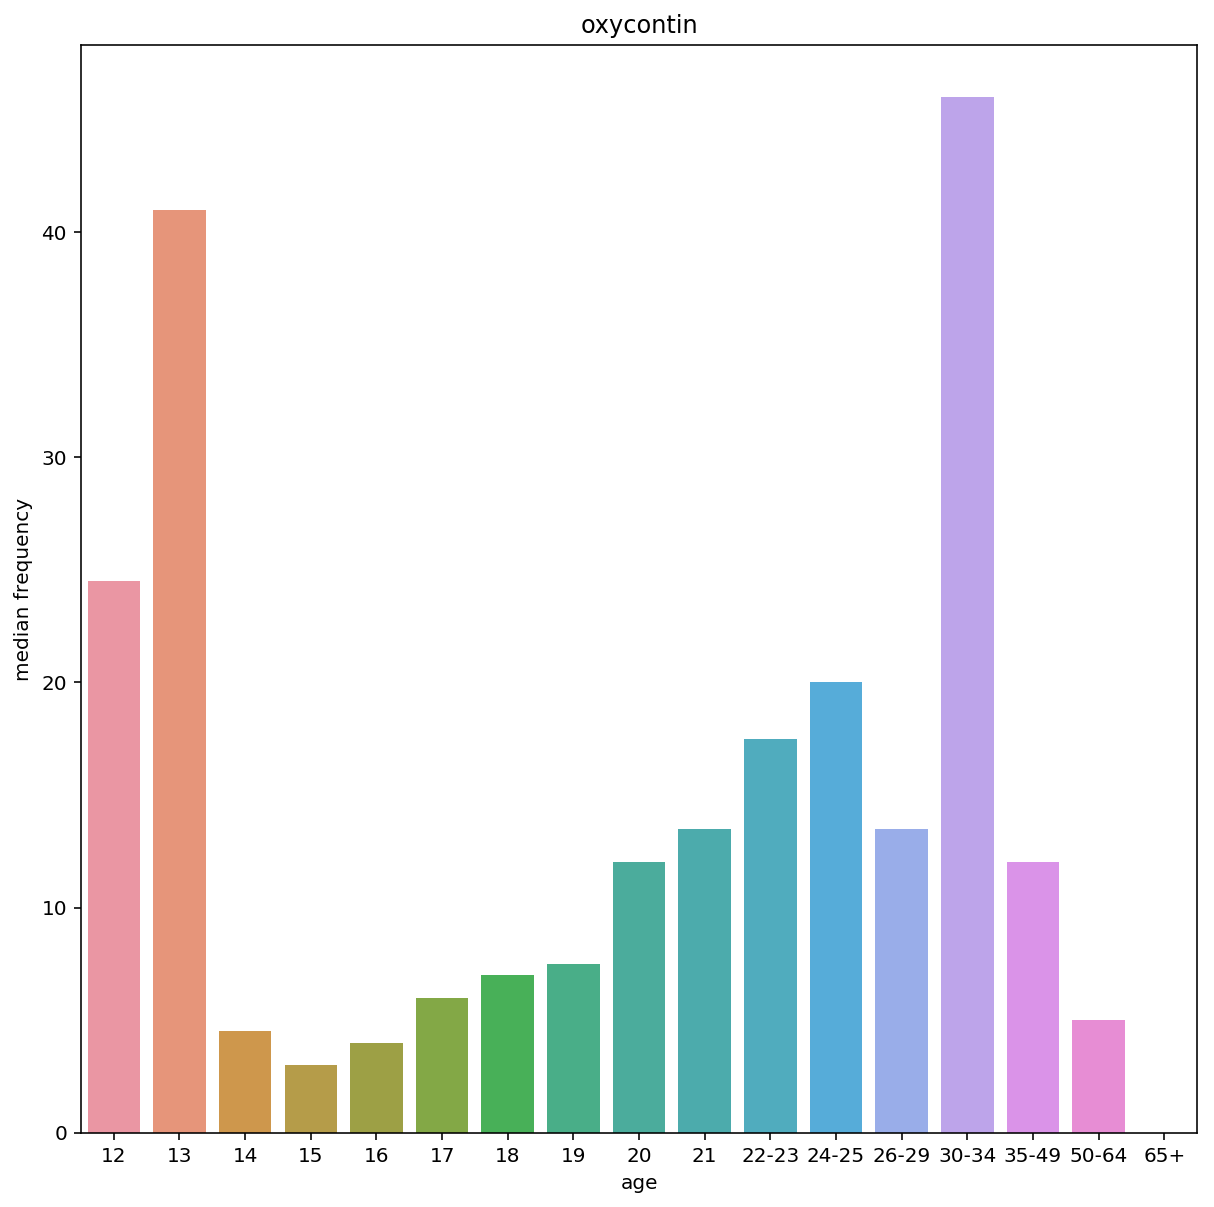

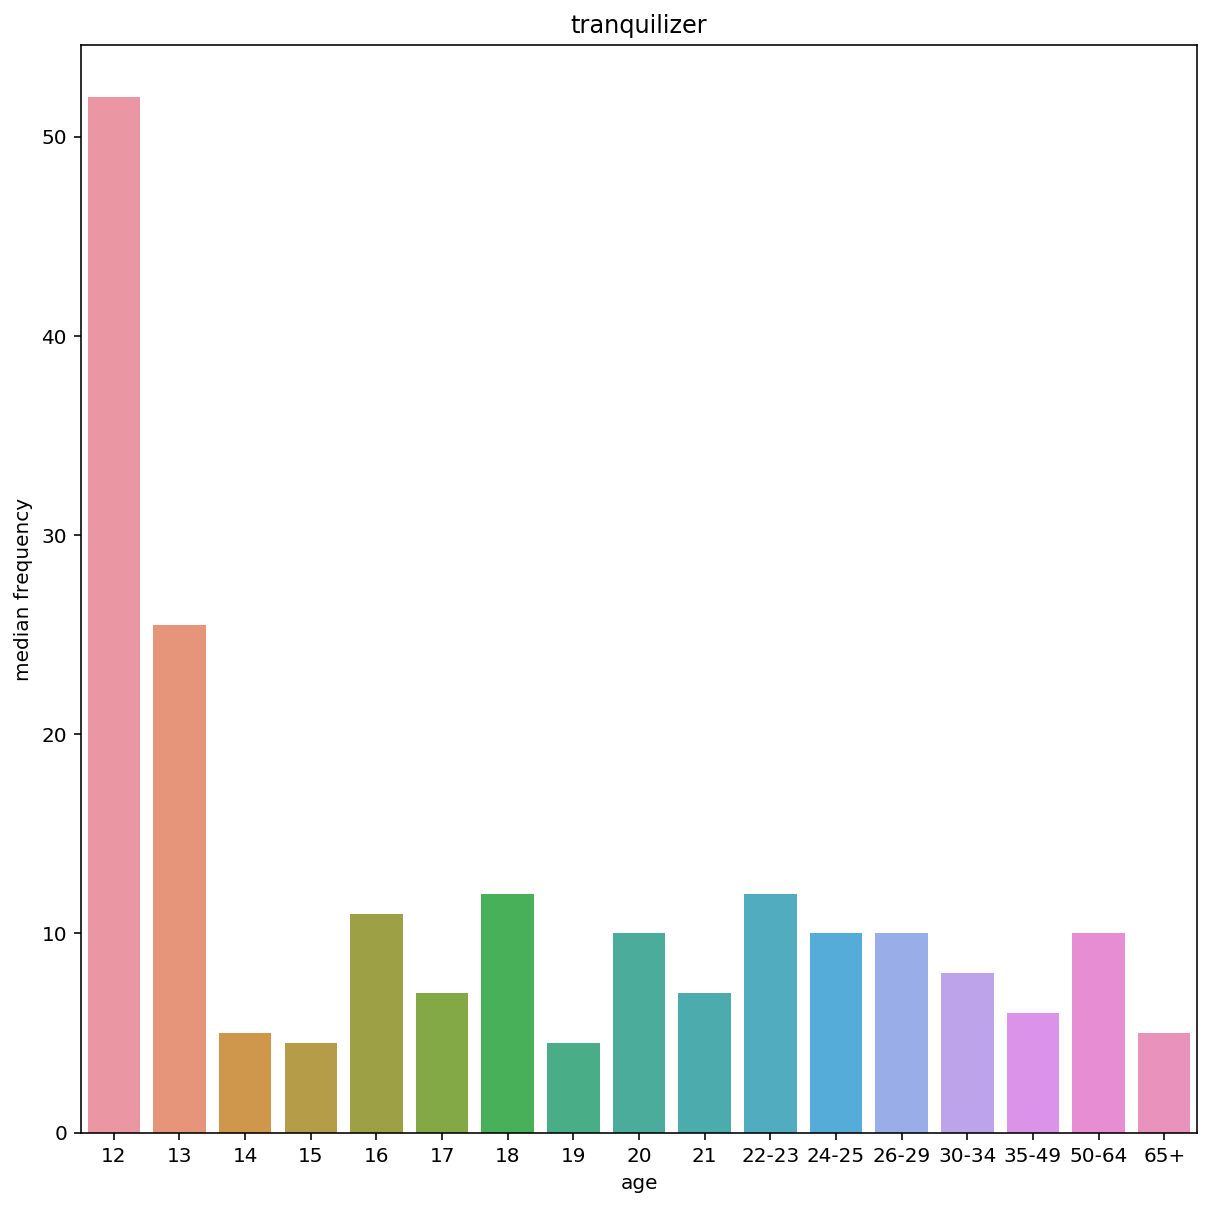

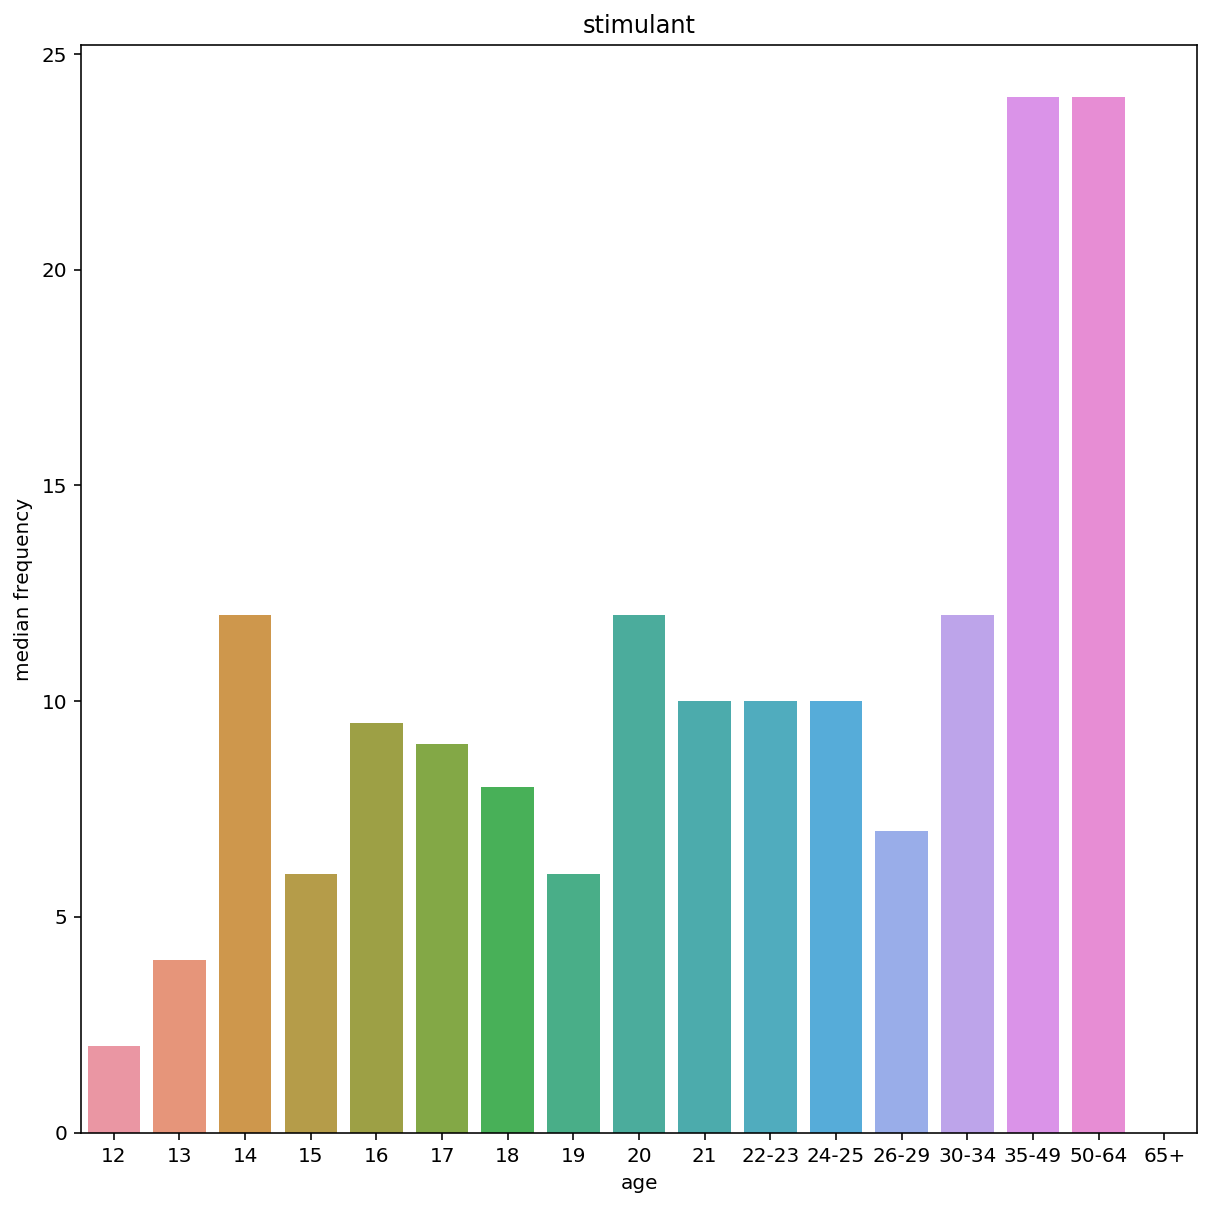

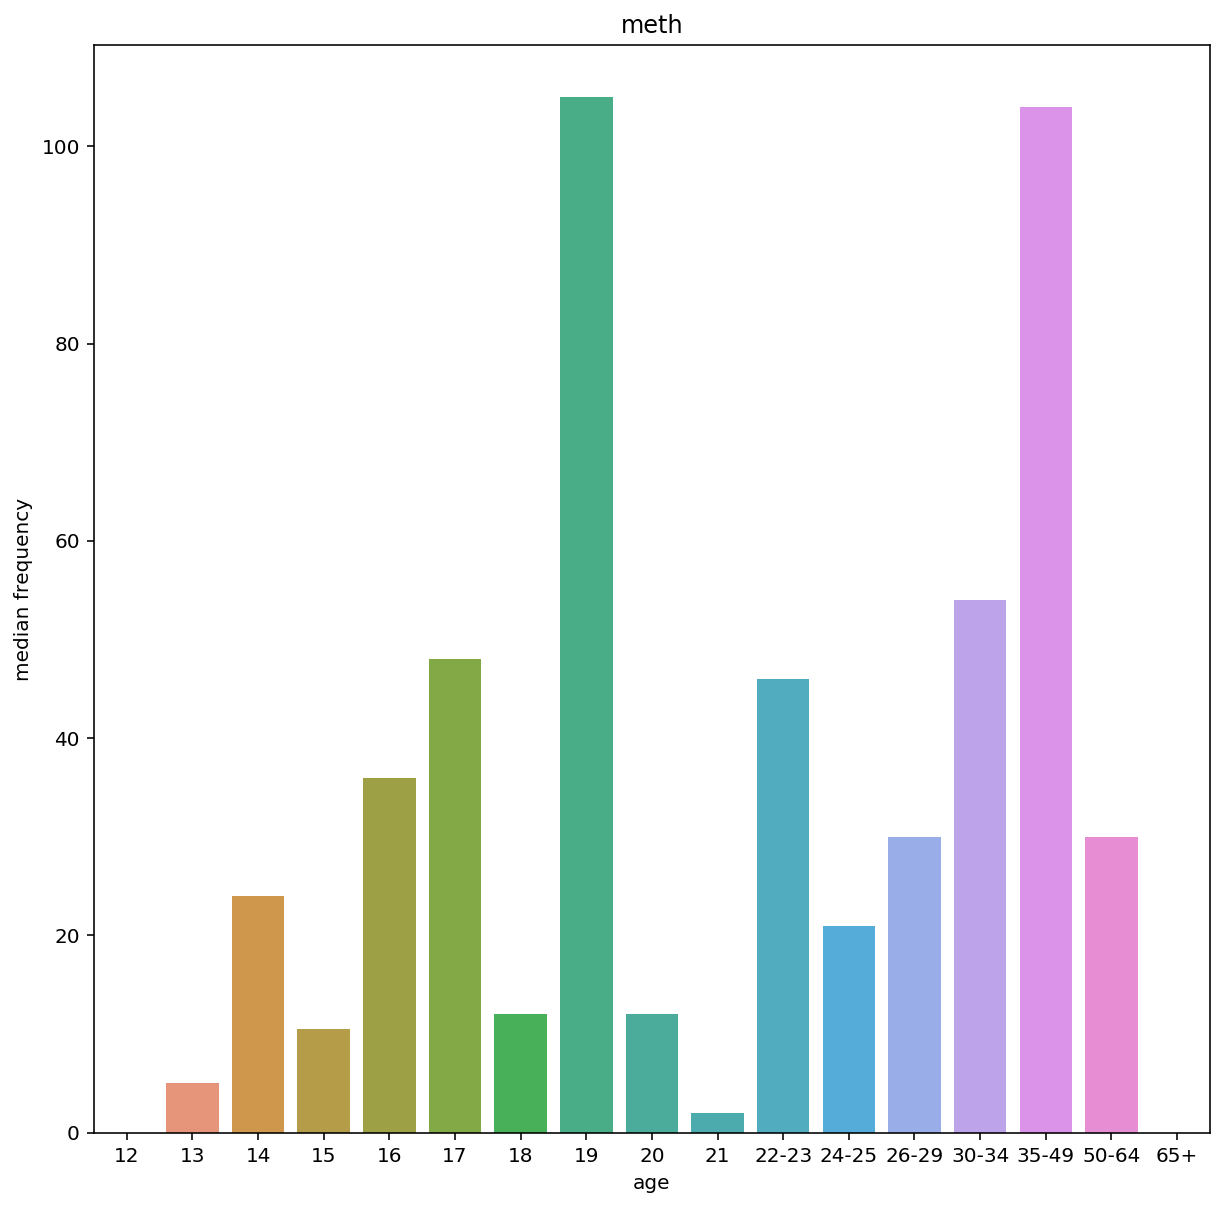

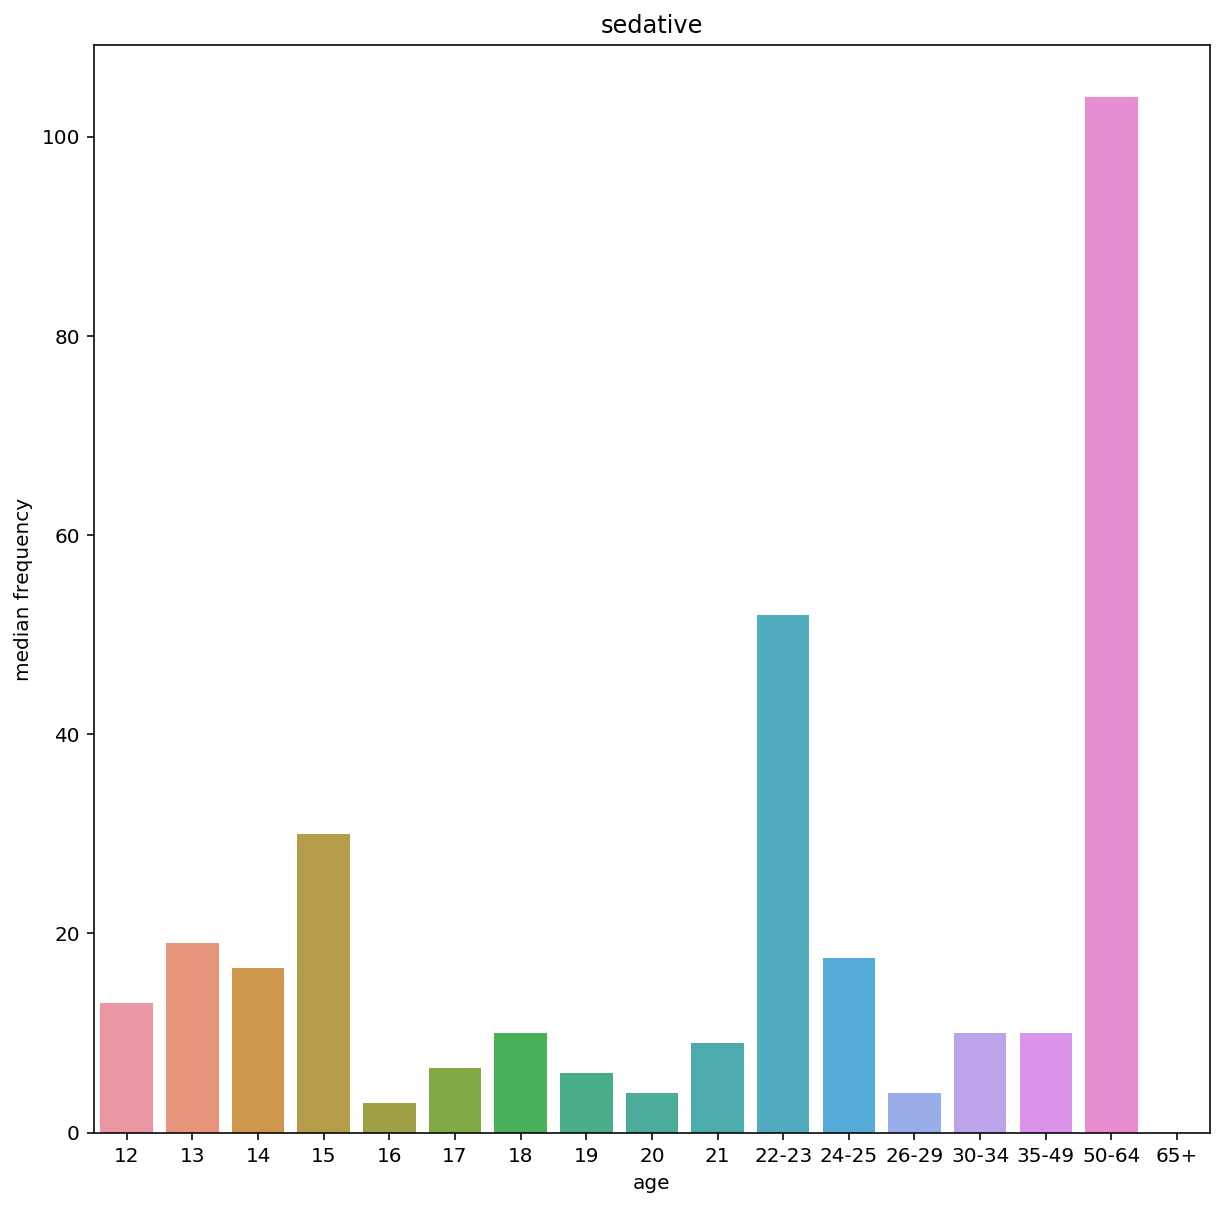

In [57]:
for drug in drugs:
    plt.figure(figsize = (10, 10))
    ax_drug_freq_plt = sns.barplot(x=df_drug_use['age'], y=df_drug_use['med_freq_'+drug])
    ax_drug_freq_plt.set_ylabel('median frequency')
    ax_drug_freq_plt.set_title(drug)
    plt.show()

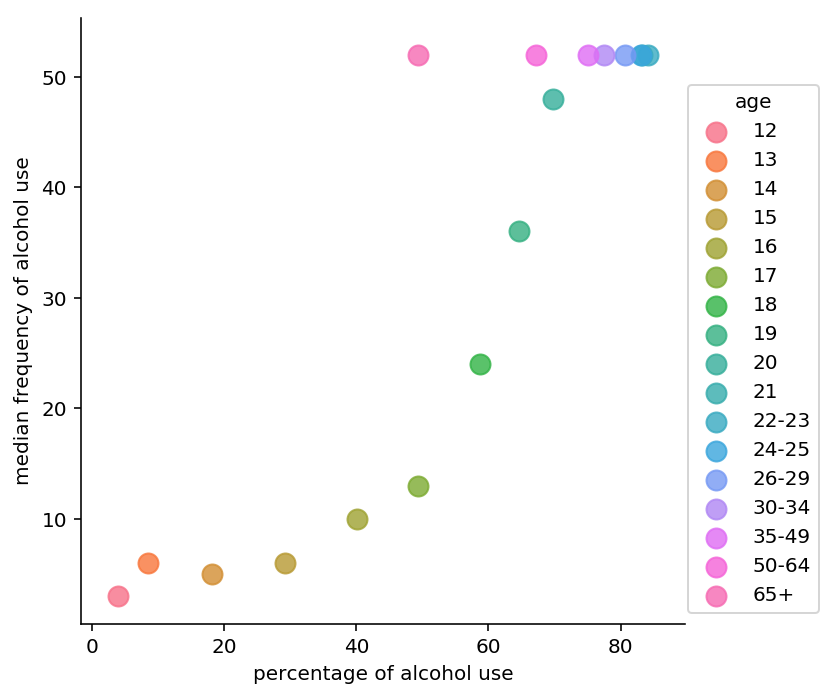

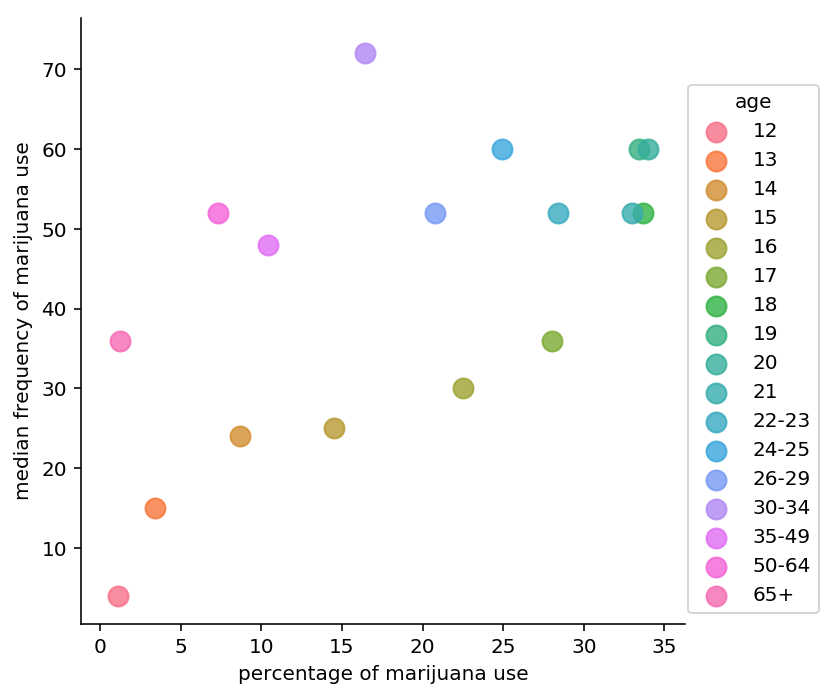

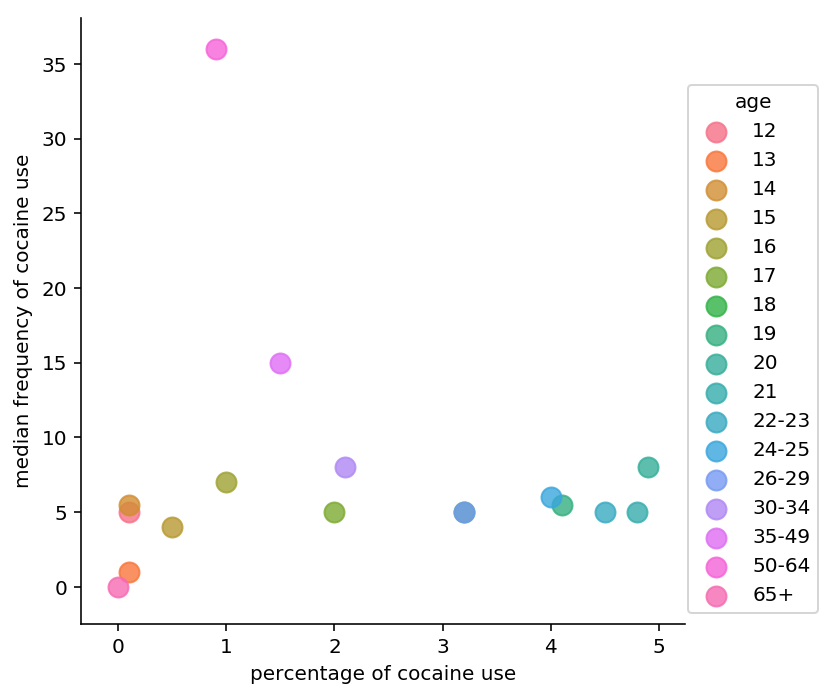

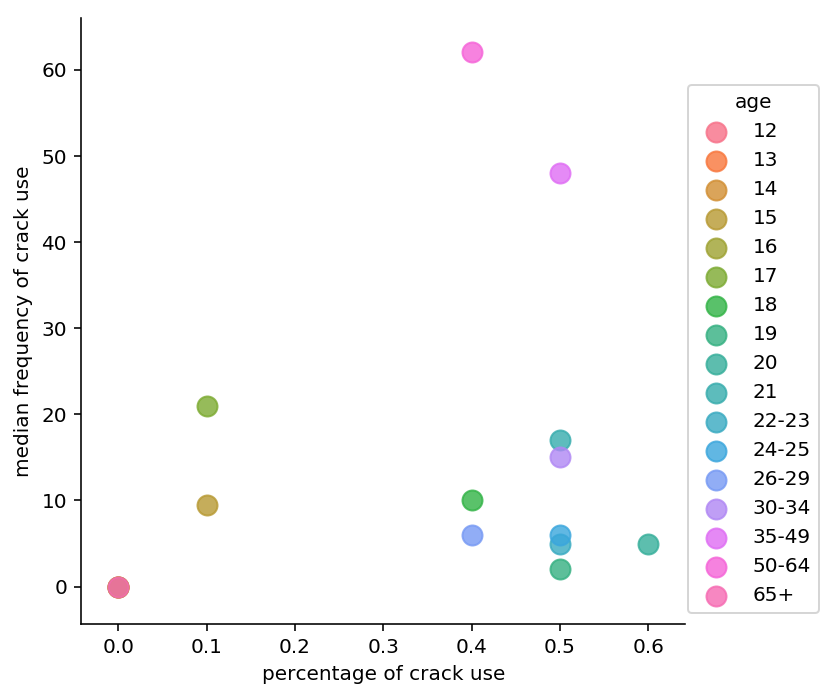

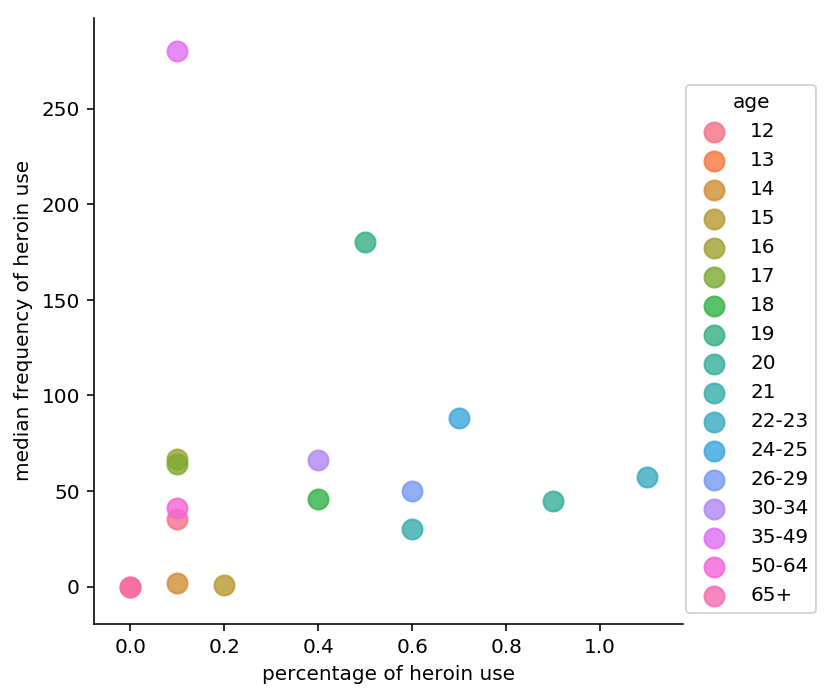

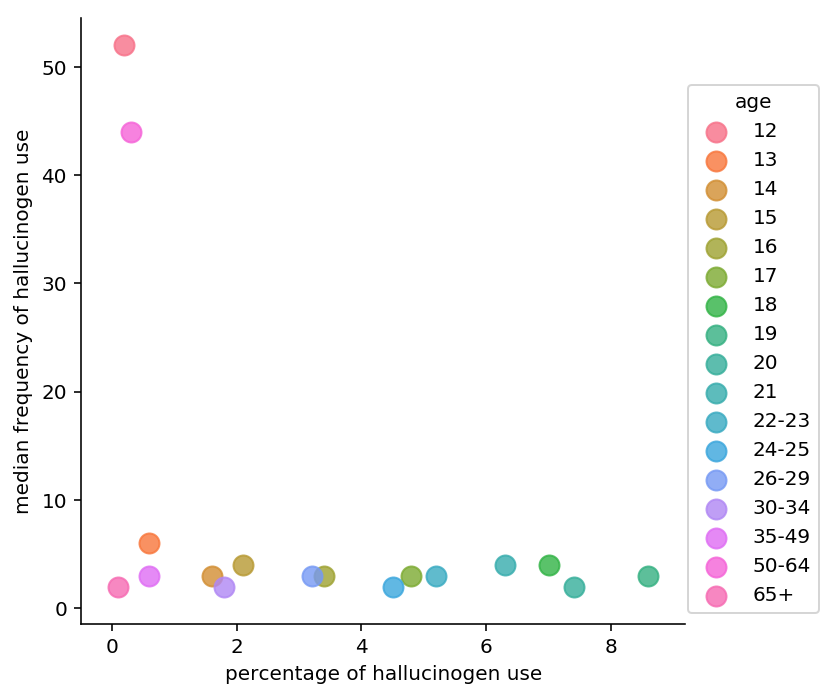

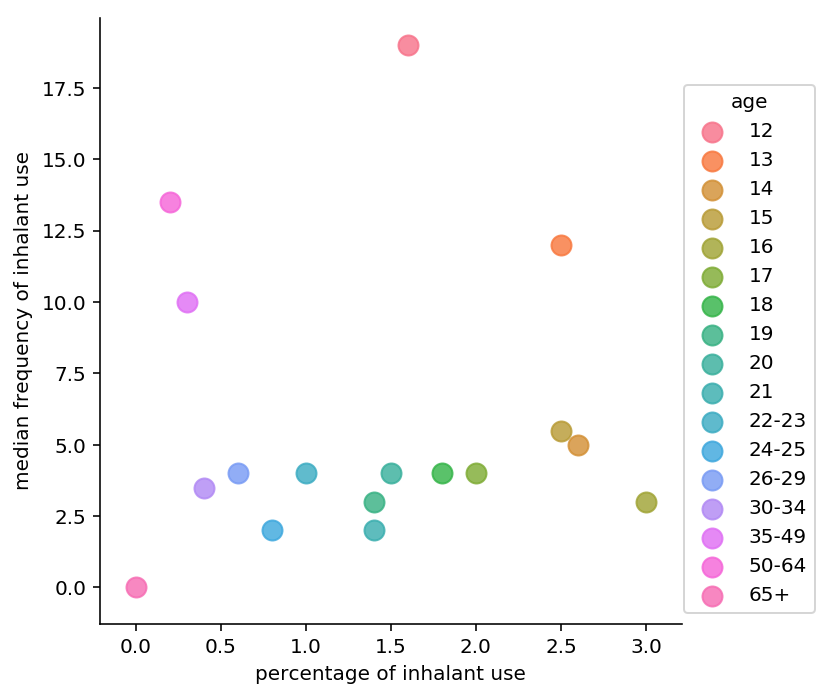

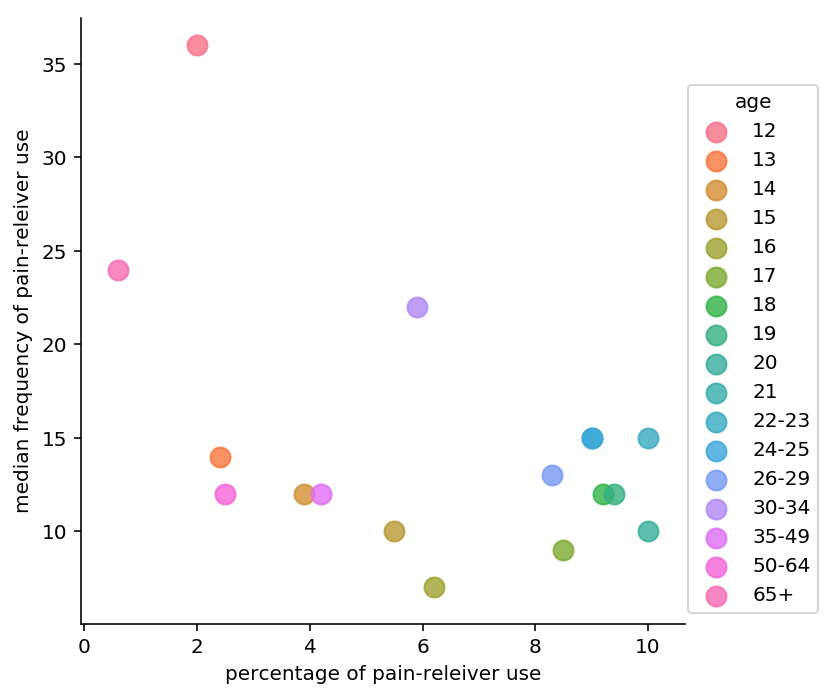

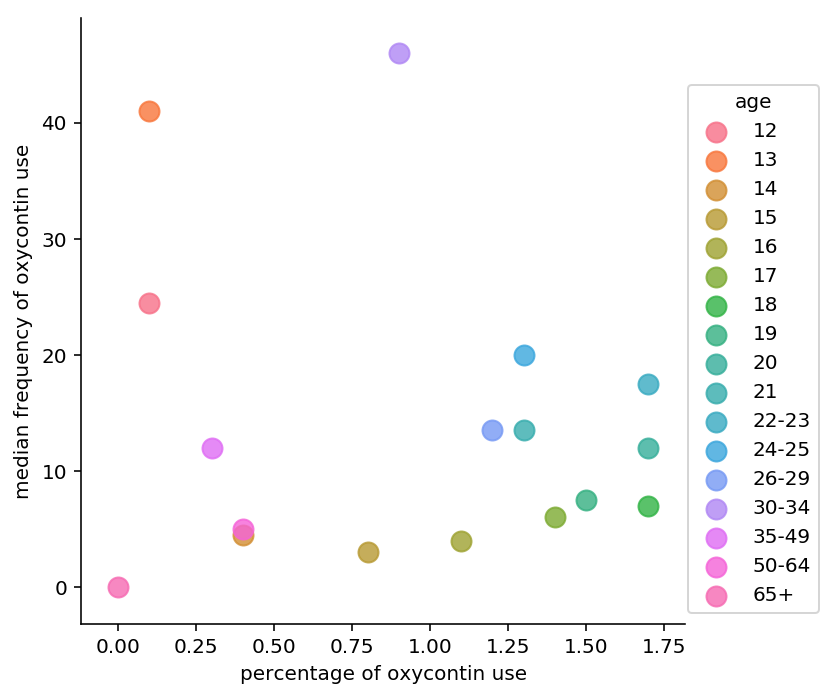

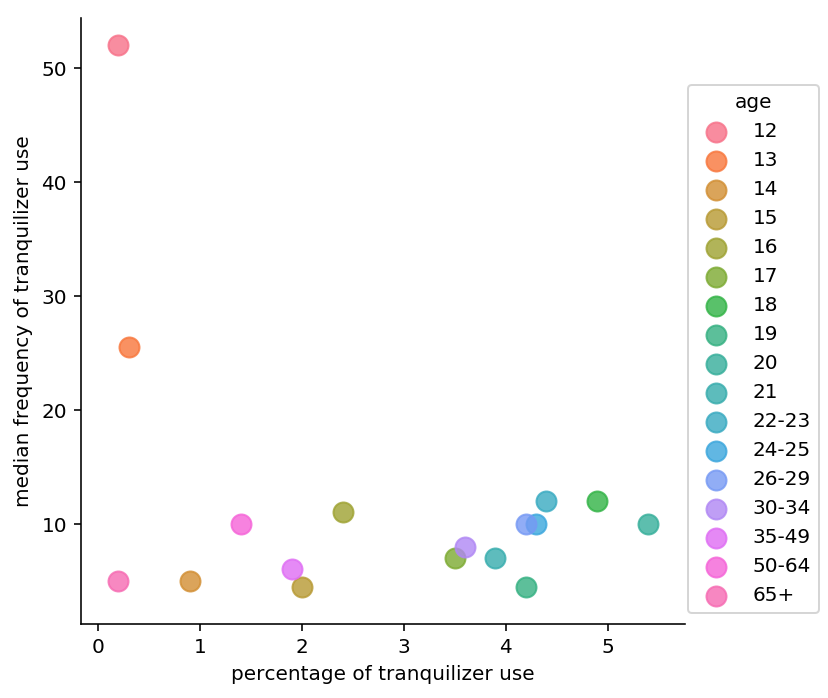

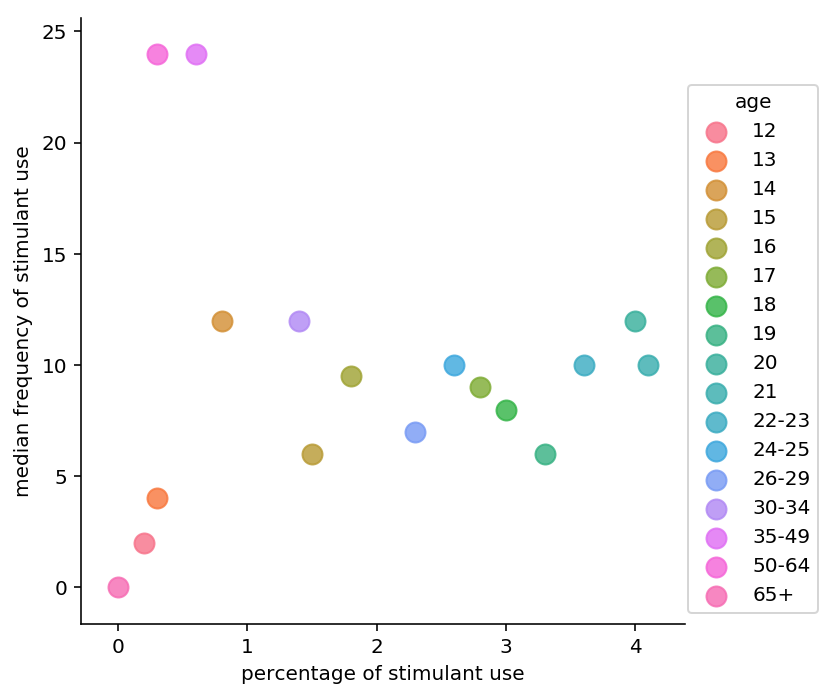

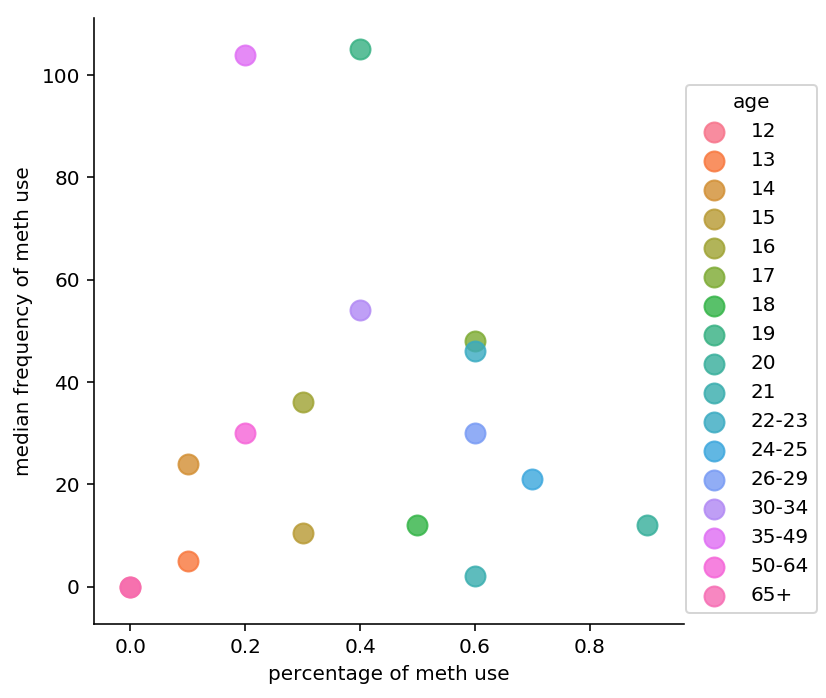

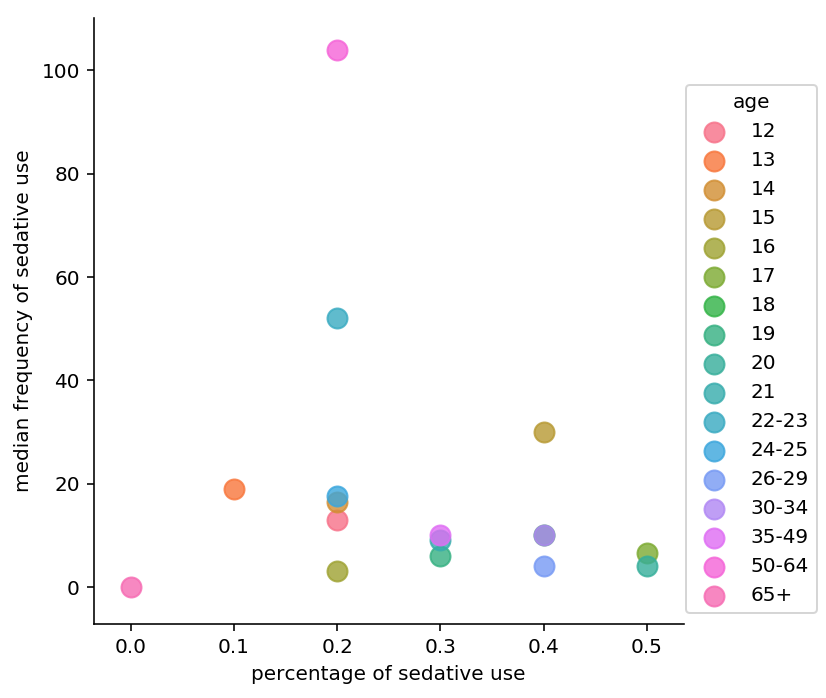

In [62]:
for drug in drugs:
    ax_drug_lmplot = sns.lmplot(x=drug +'_%', y='med_freq_'+drug, data=df_drug_use, hue='age', fit_reg=False, scatter_kws={'s': 100})
    ax_drug_lmplot.set_xlabels('percentage of ' + drug + ' use')
    ax_drug_lmplot.set_ylabels('median frequency of ' + drug + ' use')
    plt.show()

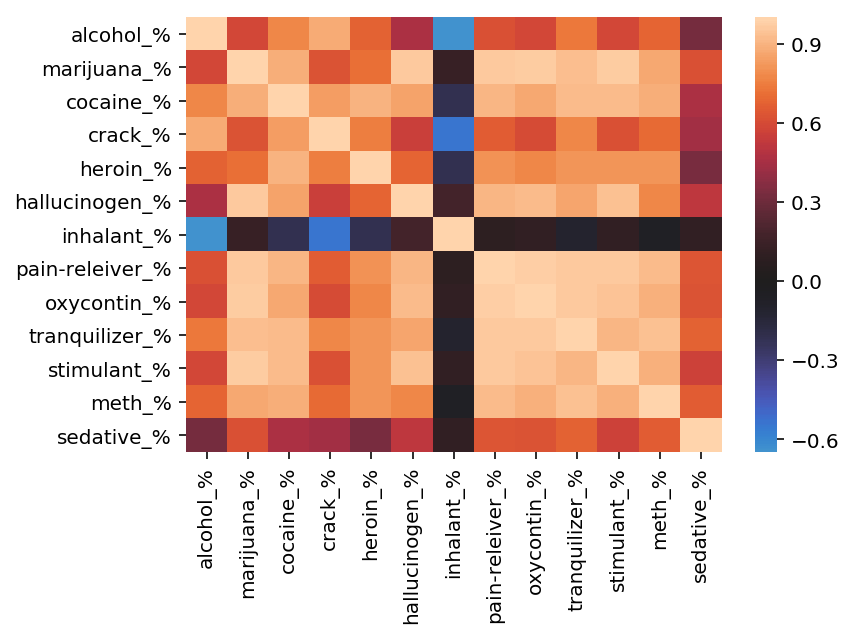

In [41]:
df_drug_use_percent_subset = df_drug_use[list_column_percent]
df_drug_use_percent_corr = df_drug_use_percent_subset.corr()
sns.heatmap(df_drug_use_percent_corr, center=0)
plt.show()

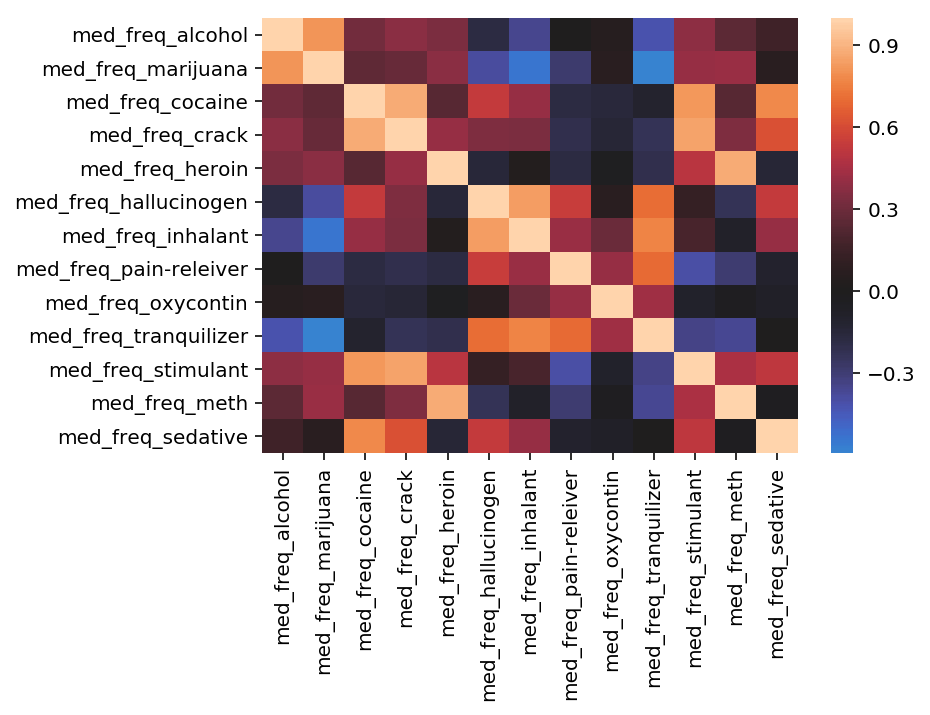

In [42]:
df_drug_use_freq_subset = df_drug_use[list_column_freq]

df_drug_use_freq_corr = df_drug_use_freq_subset.corr()
sns.heatmap(df_drug_use_freq_corr, center=0)
plt.show()

***
_Only distribution of percentage of Inhalant users in an age group is close to normal distribution._

_The age group which has the highest percentage of drug users across all drugs is 20._

_The most commonly used drug in the sample is alcohol. There is also an indication that higher percentage of the age group that used alcohol will mean higher frequency of alcohol usage in the past 12 months._

_There are no potential outliers in median usage frequency for the following drug:_
1. Alcohol
2. Marijuana

_In median usage frequency in all other drugs, there are potential outliers._

_Among the group who used the following drug, the median use frequency is fairly the same across all age groups:_
1. Hallucinogen
2. Tranquilizer
3. Sedative

_The percentage of age group that used inhalant is independent from that of the following drugs:_
1. Pain Releiver
2. Oxycontin
3. Tranquilizer
4. Stimulant
5. Meth
6. Sedative

_In the following drugs, the percentage of age group that used one drug is highly dependent among each other:_
1. Pain Releiver
2. Oxycontin
3. Tranquilizer
4. Stimulant
5. Meth

_There's evidence in the following pair of drugs that the usage frequency of one drug is dependent on that of another:_
1. Alcohol & Marijuana
2. Cocaine & Crack
3. Hallucinogen & Inhalant

_This indicates that the group who used alcohol very frequently are also heavy users of Marijuana and similarly for Cocaine and Crack and Hallucinogen and Inhalant._

_The drug users are likely to use only one of the two drugs, but not both, in the following pairs of drugs:_
1. Marijuana & Inhalant
2. Marijuana & Tranquilizer

***

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

***
_**Qn: What drug is likely being used the most within an age group?**_

_**Deliverable: Provide a table of the age group and the drug(s) that are being used the most such that the drug(s) used make up to at least 50% of all the drug usage in the age group.**_

_The relative total usage of the drug can be determined by the following formula:_
$$Relative\space total\space usage = Percentage \times {Median\space Frequency}$$
***

In [43]:
# Code
df_drug_total_usage = df_drug_use.loc[:,['age']]
for drug in drugs:
    df_drug_total_usage['use_'+drug] = df_drug_use[drug+'_%']*df_drug_use['med_freq_'+drug]
for drug in drugs:
    df_drug_total_usage['use_'+drug+'_%'] = df_drug_total_usage['use_'+drug]/df_drug_total_usage.sum(1)*100
df_drug_total_usage

,age,use_alcohol,use_marijuana,use_cocaine,use_crack,use_heroin,use_hallucinogen,use_inhalant,use_pain-releiver,use_oxycontin,...,use_crack_%,use_heroin_%,use_hallucinogen_%,use_inhalant_%,use_pain-releiver_%,use_oxycontin_%,use_tranquilizer_%,use_stimulant_%,use_meth_%,use_sedative_%
0,12,11.7,4.4,0.50,0.00,3.55,10.4,30.40,72.0,2.45,...,0.000000,2.221735,6.419486,18.049444,38.610933,1.088470,4.598208,0.173330,0.000000,1.125801
1,13,51.0,51.0,0.10,0.00,0.00,3.6,30.00,33.6,4.10,...,0.000000,0.000000,1.523241,12.612387,13.414577,1.553687,2.881985,0.447220,0.186032,0.706432
2,14,90.5,208.8,0.55,0.00,0.20,4.8,13.00,46.8,1.80,...,0.000000,0.043406,1.041645,2.814758,10.071747,0.379157,0.947135,2.016535,0.502007,0.689536
3,15,175.2,362.5,2.00,0.95,0.20,8.4,13.75,55.0,2.40,...,0.129444,0.027246,1.144309,1.870209,7.461856,0.322345,1.208271,1.206314,0.421528,1.604917
4,16,401.0,675.0,7.00,0.00,6.65,10.2,9.00,43.4,4.40,...,0.000000,0.511767,0.784657,0.691927,3.334851,0.337231,2.022865,1.308237,0.825429,0.045828
5,17,640.9,1008.0,10.00,2.10,6.40,14.4,8.00,76.5,8.40,...,0.107981,0.329066,0.740272,0.411106,3.930370,0.430700,1.255932,1.290985,1.474436,0.166260
6,18,1408.8,1752.4,16.00,4.00,18.40,28.0,7.20,110.4,11.90,...,0.112950,0.519554,0.790509,0.203228,3.115990,0.335577,1.657988,0.676414,0.169071,0.112709
7,19,2325.6,2004.0,22.55,1.00,90.00,25.8,4.20,112.8,11.25,...,0.020955,1.885898,0.540411,0.087964,2.362414,0.235497,0.395615,0.414419,0.878995,0.037664
8,20,3345.6,2040.0,39.20,3.00,40.50,14.8,6.00,100.0,20.40,...,0.051558,0.696026,0.254320,0.103098,1.718272,0.350424,0.927537,0.824346,0.185452,0.034342
9,21,4326.4,1716.0,24.00,8.50,18.00,25.2,2.80,135.0,17.55,...,0.131968,0.279456,0.391221,0.043466,2.095687,0.272351,0.423639,0.636192,0.018618,0.041891


In [45]:
list_drug_total_use_percent = ['use_'+drug+'_%' for drug in drugs]
list_column_drug_total_use_percent = ['age']
list_column_drug_total_use_percent += list_drug_total_use_percent
df_drug_total_usage_plot = df_drug_total_usage[list_column_drug_total_use_percent]
df_drug_total_usage_plot

,age,use_alcohol_%,use_marijuana_%,use_cocaine_%,use_crack_%,use_heroin_%,use_hallucinogen_%,use_inhalant_%,use_pain-releiver_%,use_oxycontin_%,use_tranquilizer_%,use_stimulant_%,use_meth_%,use_sedative_%
0,12,7.862903,2.808578,0.313536,0.000000,2.221735,6.419486,18.049444,38.610933,1.088470,4.598208,0.173330,0.000000,1.125801
1,13,27.619821,24.026025,0.042320,0.000000,0.000000,1.523241,12.612387,13.414577,1.553687,2.881985,0.447220,0.186032,0.706432
2,14,23.430421,50.966556,0.119397,0.000000,0.043406,1.041645,2.814758,10.071747,0.379157,0.947135,2.016535,0.502007,0.689536
3,15,26.807436,53.280817,0.272614,0.129444,0.027246,1.144309,1.870209,7.461856,0.322345,1.208271,1.206314,0.421528,1.604917
4,16,33.098097,54.232196,0.538926,0.000000,0.511767,0.784657,0.691927,3.334851,0.337231,2.022865,1.308237,0.825429,0.045828
5,17,34.522880,53.305894,0.514330,0.107981,0.329066,0.740272,0.411106,3.930370,0.430700,1.255932,1.290985,1.474436,0.166260
6,18,40.835966,50.201448,0.451858,0.112950,0.519554,0.790509,0.203228,3.115990,0.335577,1.657988,0.676414,0.169071,0.112709
7,19,49.695493,42.373280,0.472571,0.020955,1.885898,0.540411,0.087964,2.362414,0.235497,0.395615,0.414419,0.878995,0.037664
8,20,58.445574,35.277360,0.673768,0.051558,0.696026,0.254320,0.103098,1.718272,0.350424,0.927537,0.824346,0.185452,0.034342
9,21,68.178989,26.754689,0.372637,0.131968,0.279456,0.391221,0.043466,2.095687,0.272351,0.423639,0.636192,0.018618,0.041891


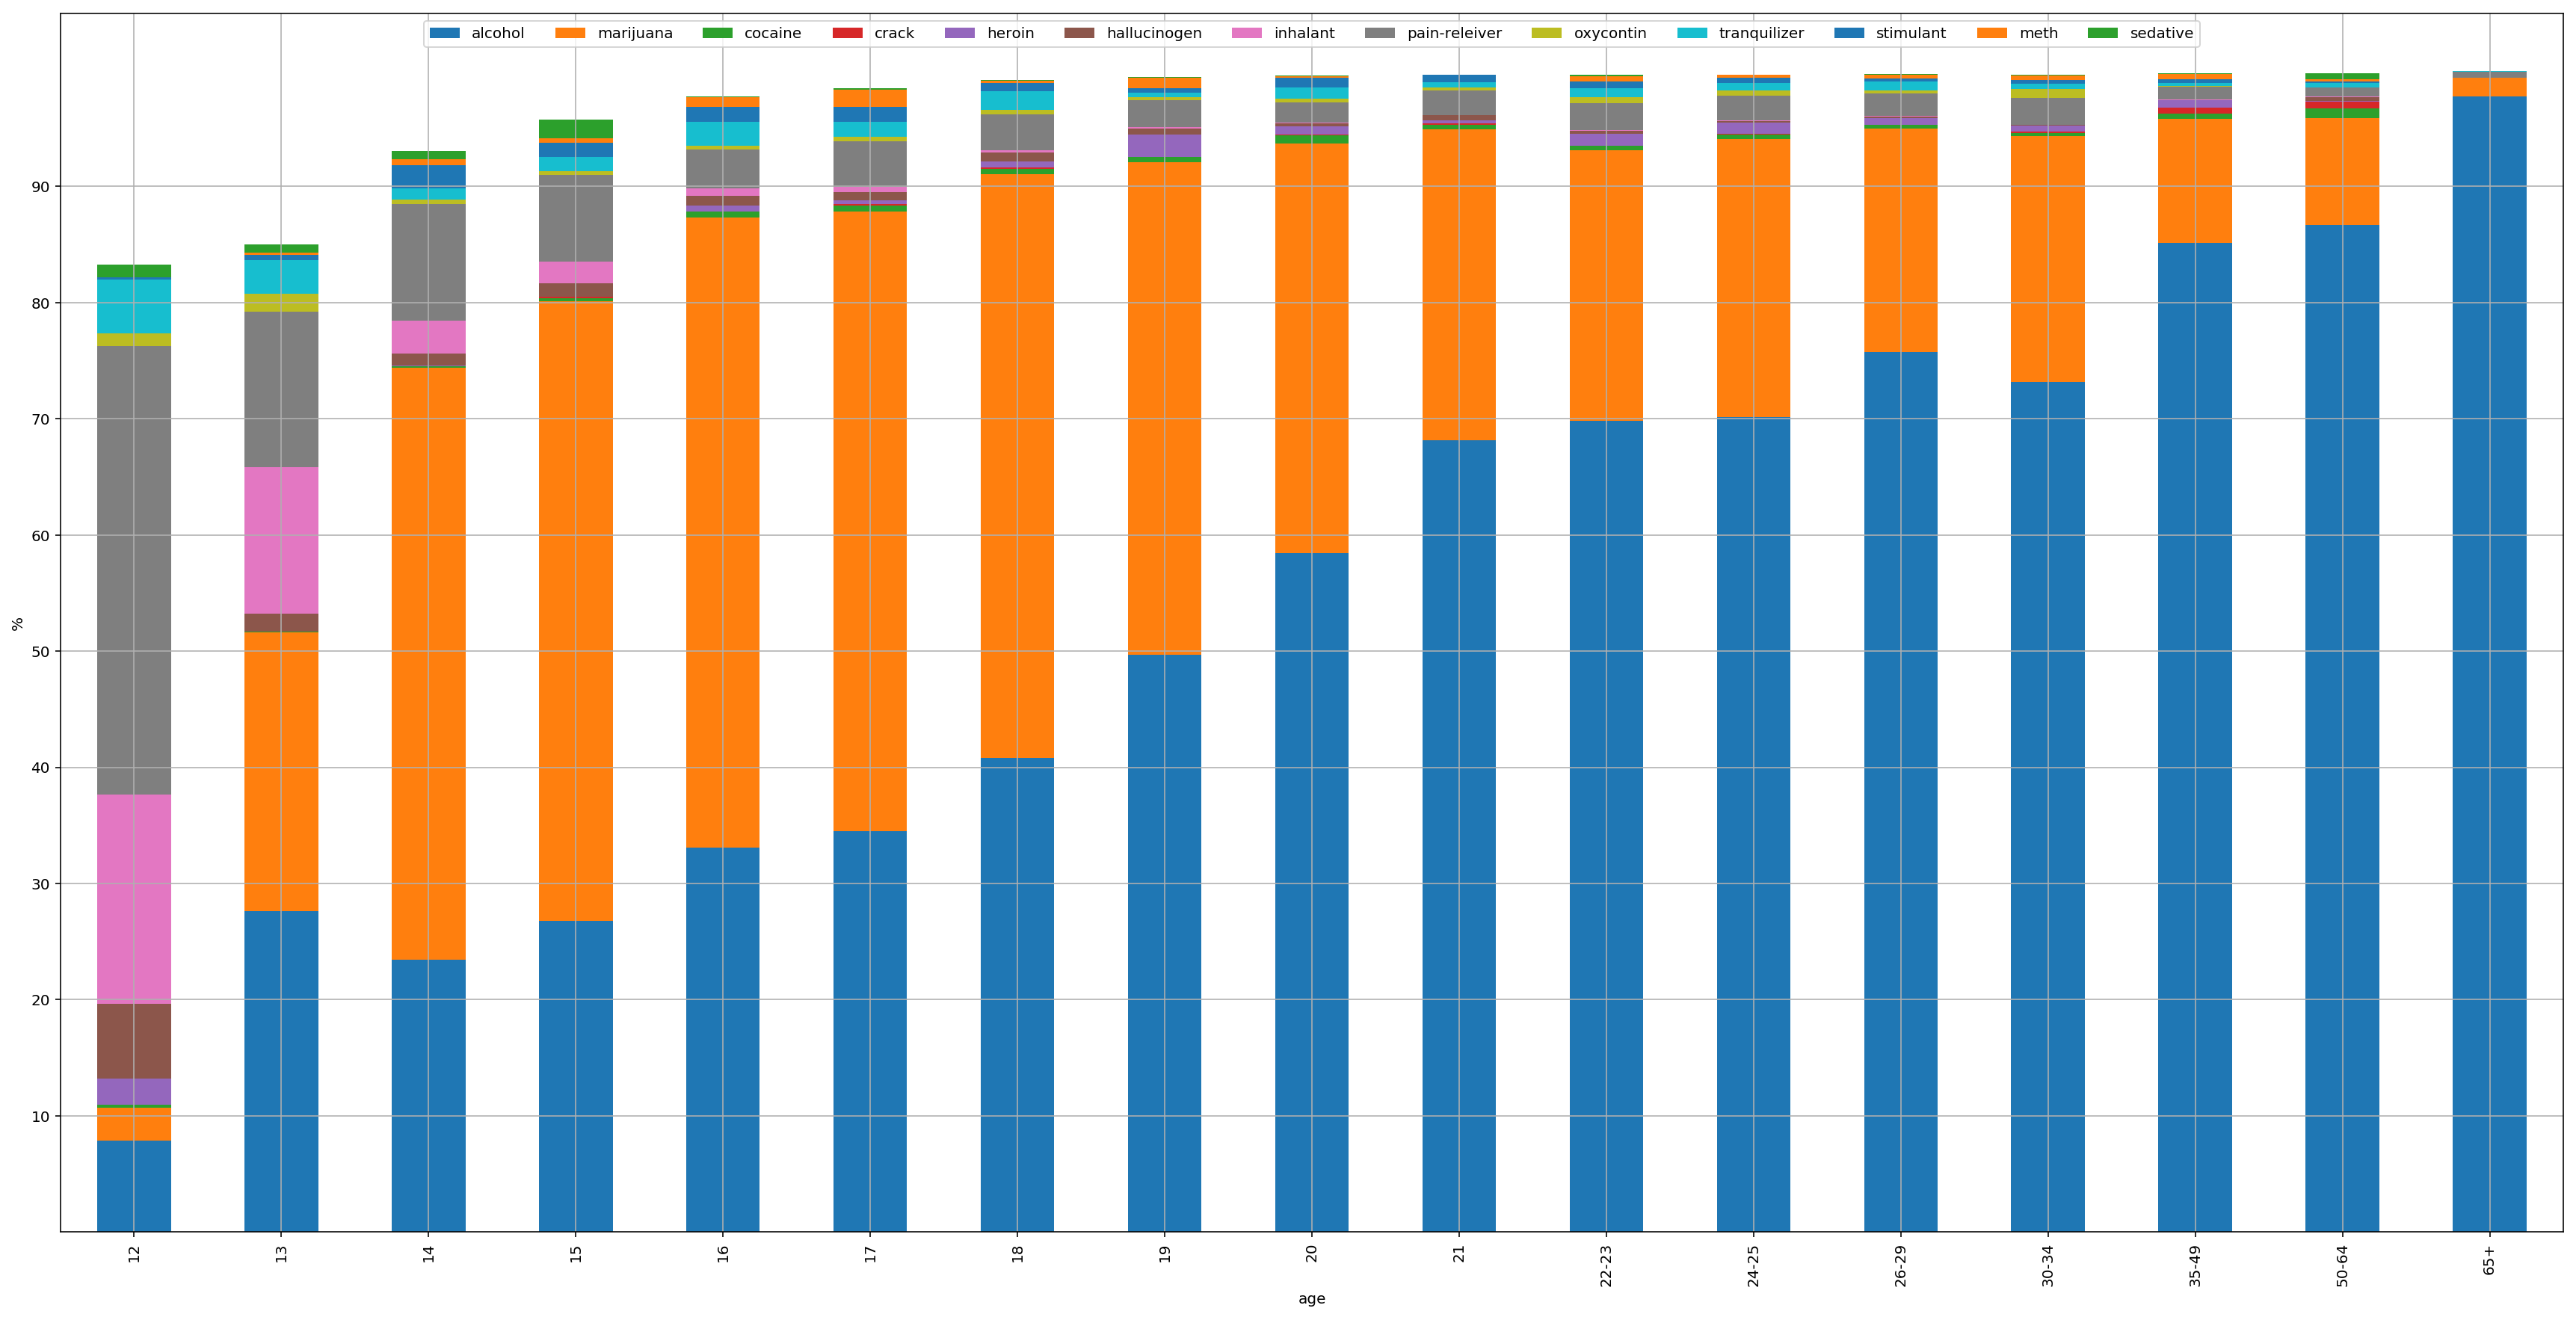

In [63]:
ax_use_percent_plot = df_drug_total_usage_plot.plot.bar(stacked=True, x='age', yticks = [n*10 for n in range(1, 10)], grid=True, figsize=(30, 15))
ax_use_percent_plot.legend(labels = drugs, ncol=len(list_drug_total_use_percent), loc='upper center')
ax_use_percent_plot.set_ylabel('%')
plt.show()

**Report**

_Based on the percentage of the total usage of drugs in each age group, the drug(s) that are used the most in each age group are the following:_

| Age Group | Drug(s) |
| ---: | :--- |
| 12 | Inhalant & Pain Releiver |
| 13 | Alcohol & Marijuana |
| 14 | Marijuana |
| 15 | Marijuana |
| 16 | Marijuana |
| 17 | Marijuana |
| 18 | Marijuana |
| 19 | Alcohol & Marijuana |
| 20 | Alcohol |
| 21 | Alcohol |
| 22 - 23 | Alcohol |
| 24 - 25 | Alcohol |
| 26 - 29 | Alcohol |
| 30 - 34 | Alcohol |
| 35 - 49 | Alcohol |
| 50 - 64 | Alcohol |
| 65+ | Alcohol |

_ From the table, Inhalant and Pain Releiver are the most used drugs in age group of 12, marijuana are the most used drug in age groups of 13 to 18 and alcohol are the most used drugs in age groups of 19 and above._

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [59]:
ds_sat_rate = df_sat_scores[['Rate']]
ds_sat_rate.describe()

,Rate
count,51.000000
mean,37.000000
std,27.550681
min,4.000000
25%,9.000000
50%,33.000000
75%,64.000000
max,82.000000


In [60]:
interquantile_range = ds_sat_rate.quantile(0.75) - ds_sat_rate.quantile(0.25)
[(ds_sat_rate.quantile(0.25) - 1.5*interquantile_range)[0], 
 (ds_sat_rate.quantile(0.75) + 1.5*interquantile_range)[0]]

[-73.5, 146.5]

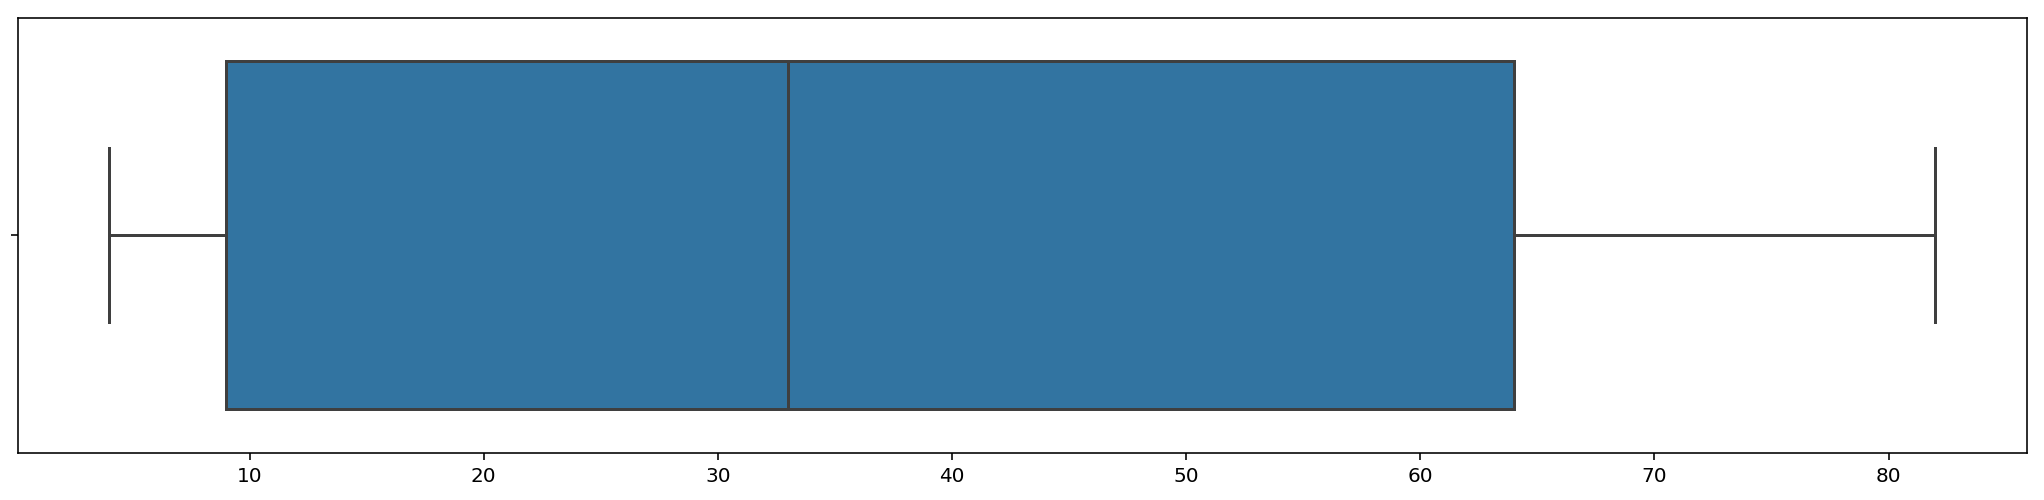

In [61]:
plt.figure(figsize=(18, 4))
sns.boxplot(ds_sat_rate, orient='h')
plt.show()

In [62]:
all_entry

,State,Rate,Verbal,Math
51,All,45,506,514


In [63]:
# On observation of the mean of the rate shows that it is far lower than the value of 45. It is possible that there
# are outliers.
# As such, some entries have to be removed until the mean is close to 45.

In [64]:
# Determine the entries that might be outliers
ds_sat_rate[ds_sat_rate['Rate'] < 8]

,Rate
43,7
44,6
45,6
46,5
47,5
48,4
49,4
50,4


In [65]:
# Remove entries where rate is less than 8
ds_sat_rate_cleaned = ds_sat_rate[ds_sat_rate > 8]
ds_sat_rate_cleaned.describe()

,Rate
count,40.000000
mean,45.550000
std,24.996359
min,9.000000
25%,17.750000
50%,53.000000
75%,67.250000
max,82.000000


In [66]:
interquantile_range = ds_sat_rate_cleaned.quantile(0.75) - ds_sat_rate_cleaned.quantile(0.25)
[(ds_sat_rate_cleaned.quantile(0.25) - 1.5*interquantile_range)[0], 
 (ds_sat_rate_cleaned.quantile(0.75) + 1.5*interquantile_range)[0]]

[-56.5, 141.5]

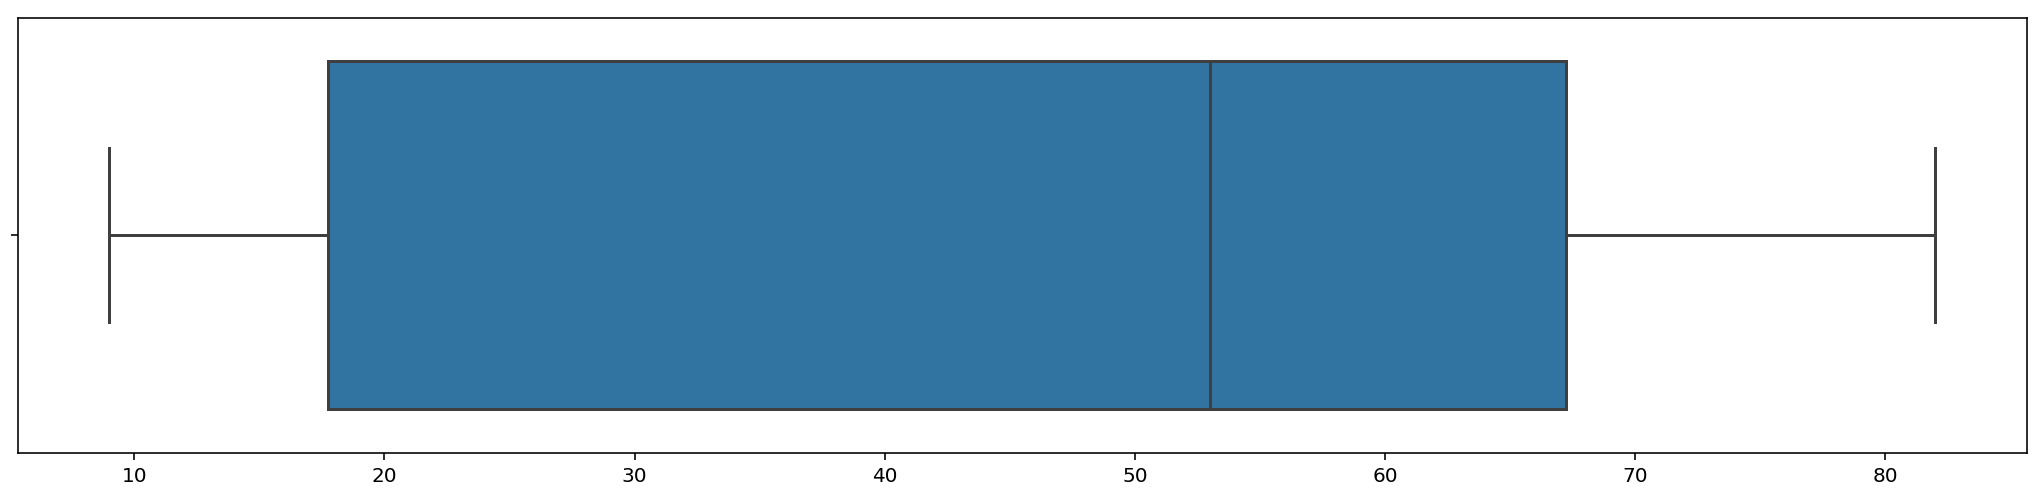

In [67]:
plt.figure(figsize=(18, 4))
sns.boxplot(ds_sat_rate_cleaned, orient='h')
plt.show()

***
_The mean and median of the dataset is increased while the standard deviation of the dataset is decreased when the outliers at the 1st to the 25th percentile are removed. This is because outliers have high variability in the values from the correct mean and median of the dataset._
***

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [68]:
df_sat_scores[['Verbal', 'Math']].corr(method='spearman')['Verbal']['Math']

0.9094125143903471

_The spearman correlation is a measure of dependence between the rankings of two variables while pearson correlation is a measure of linear dependence between two variables (no ranking is needed)._

_The process of calculating the spearman rank correlation are as follows:_

_1. In each column, assign a rank to each observation by sorting the values in the column and determining the location of the value in the sorted column. Let the two columns be $A$ and $B$ and the rank of the two columns be $rg_A$ and $rg_B$ respectively._

_2. Obtain the covariance of the rank of $A$ and $B$. Let the value be $cov(rg_A, rg_B)$_

_3. Find the standard deviation of the rank of $A$ and $B$. Let the values be $\sigma_{rg_A}$ and $\sigma_{rg_B}$ respectively._

_3. The spearman correlation, $r_s$ is given by the following formula:_

$$ r_s = \frac{cov(rg_A, rg_B)}{\sigma_{rg_A}\sigma_{rg_B}} $$

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [69]:
df_sat_scores_2 = df_sat_scores.copy()
df_sat_scores_2['Percentile'] = df_sat_scores_2['Rate'].apply(lambda r: stats.percentileofscore(df_sat_scores['Rate'], r))
df_sat_scores_2.loc[df_sat_scores_2['State'] == 'CA', 'Percentile']

23    55.882353
Name: Percentile, dtype: float64

***
_The percentile is related to a ranked variable of the spearman rank correlation by the formula: $rank = 100 - percentile$._
***

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

***
_Percentile scoring can be useful for dealing with outliers on the fact that the outliers usually have percentile score of between 0 and 25 or between 75 and 100 and are more than 1.5 interquartile ranges below the first quartile or above the third quartile. Hence there is no need to determine the mean and standard deviation of the data set in order to find outliers as they are affected by outliers._
***

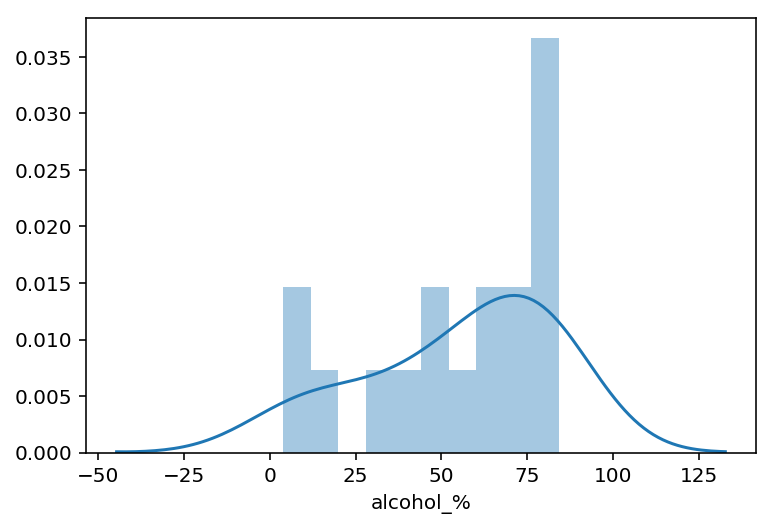

In [70]:
sns.distplot(df_drug_use['alcohol_%'], bins=10)
plt.show()

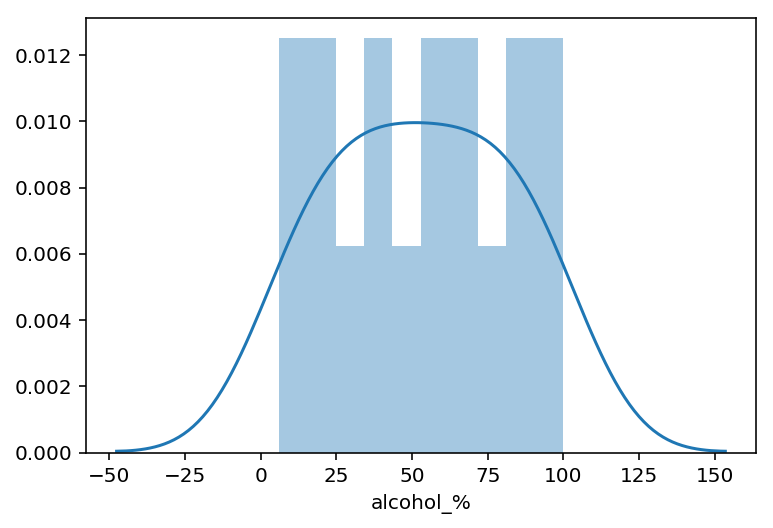

In [71]:
sns.distplot(df_drug_use['alcohol_%'].apply(lambda r: stats.percentileofscore(df_drug_use['alcohol_%'], r)), bins=10)
plt.show()

***
_Converting raw scores to percentiles changes the distribution to a normal distribution with mean 50._
***